# Assigment 1
## Vdovenko Anton

### Q1 Data Exploration

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotnine as p9
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.regression import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [201]:
df = pd.read_csv("C:/Users/User/OneDrive - Singapore Management University/Учеба Развитие Хобби/SMU/MITB/Term 3/AML/Assigment 1/pek-sha.csv")

In [202]:
df.head(10)

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
0,14393,HO1252,320,PEK,NaN,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,2019-01-03 14:26:15,1
1,14409,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,2019-01-03 14:26:15,1
2,14415,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1
3,14429,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,2019-01-03 14:26:15,1
4,14431,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,2019-01-03 14:26:15,1
5,14433,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,C,5660,1.00,2019-01-03 14:26:15,1
6,14445,CA1831,773,PEK,NaN,SHA,2019-01-04 07:30:00,2019-01-04 09:35:00,C,R,1860,0.34,2019-01-03 14:26:15,1
7,14451,CA1831,773,PEK,NaN,SHA,2019-01-04 07:30:00,2019-01-04 09:35:00,C,J,5530,1.00,2019-01-03 14:26:15,1
8,14488,MU5102,333,PEK,NaN,SHA,2019-01-04 08:00:00,2019-01-04 10:15:00,C,I,1800,0.34,2019-01-03 14:26:15,1
9,14491,MU5102,333,PEK,NaN,SHA,2019-01-04 08:00:00,2019-01-04 10:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1


In [203]:
# Lets check if all column data types is in right format
df.dtypes

ID                  int64
flightNumber       object
craftTypeCode      object
depAirport         object
traAirport         object
arrAirport         object
departureDate      object
arrivalDate        object
cabinClass         object
priceClass         object
price               int64
rate              float64
createDate         object
dateDifference      int64
dtype: object

In [204]:
# Change coulmns with wrong format to a right one
df = df.astype({"departureDate":"datetime64",
                "arrivalDate":"datetime64",
                "createDate":"datetime64"})

In [205]:
df.dtypes

ID                         int64
flightNumber              object
craftTypeCode             object
depAirport                object
traAirport                object
arrAirport                object
departureDate     datetime64[ns]
arrivalDate       datetime64[ns]
cabinClass                object
priceClass                object
price                      int64
rate                     float64
createDate        datetime64[ns]
dateDifference             int64
dtype: object

In [206]:
# Lets see dimension of our data
df.shape

(300336, 14)

In [207]:
print("Unique craftTypeCode:", df.craftTypeCode.unique().shape[0])
print("Unique ID:", df.ID.unique().shape[0])
print("Unique createDate:", df.createDate.unique().shape[0])
print("Unique dateDifferecnce:", df.dateDifference.unique().shape[0])
print("Unique cabinClass:", df.cabinClass.unique().shape[0])
print("Unique priceClass:", df.priceClass.unique().shape[0])
print("Unique price:", df.price.unique().shape[0])
print("Unique rate:", df.rate.unique().shape[0])
print("Unique flightNumber:", df.flightNumber.unique().shape[0])
print("Unique traAirport:", df.traAirport.unique().shape[0])


Unique craftTypeCode: 44
Unique ID: 300336
Unique createDate: 637
Unique dateDifferecnce: 9
Unique cabinClass: 3
Unique priceClass: 32
Unique price: 535
Unique rate: 87
Unique flightNumber: 51
Unique traAirport: 2


In [208]:
#Create a function to check missing values
def num_missing(x):
  return sum(x.isnull())

In [209]:
#check missing values per column
print("Missing values per column:")
df.apply(num_missing, axis=0) 

Missing values per column:


ID                     0
flightNumber           0
craftTypeCode          0
depAirport             0
traAirport        294587
arrAirport             0
departureDate          0
arrivalDate            0
cabinClass             0
priceClass             0
price                  0
rate                   0
createDate             0
dateDifference         0
dtype: int64

In [210]:
# There is only missing values in transit airport columnin our data, which makes perfect sense
# not all flights have transit.
print("Number of records of flights with transit aiport:",df[pd.isna(df["traAirport"]) == False].shape[0])
df[pd.isna(df["traAirport"]) == False].head()

Number of records of flights with transit aiport: 5749


,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
751,5264322,MU5693,325,PEK,LYA,SHA,2019-01-13 07:55:00,2019-01-13 12:30:00,C,I,2240,0.42,2019-01-12 13:09:24,1
752,5264342,MU5693,325,PEK,LYA,SHA,2019-01-13 07:55:00,2019-01-13 12:30:00,C,J,5360,1.00,2019-01-12 13:09:24,1
833,5779946,MU5693,325,PEK,LYA,SHA,2019-01-14 07:55:00,2019-01-14 12:30:00,C,I,2240,0.42,2019-01-13 13:27:06,1
834,5779967,MU5693,325,PEK,LYA,SHA,2019-01-14 07:55:00,2019-01-14 12:30:00,C,J,5360,1.00,2019-01-13 13:27:06,1
1056,7000619,MU5693,325,PEK,LYA,SHA,2019-01-16 07:50:00,2019-01-16 12:30:00,C,I,2240,0.42,2019-01-15 09:59:18,1


### Q1.1
#### What is the minimum time interval between createDate and departureDate for valid records?
####  Does it make sense?


In [211]:
# Check is there any discrepancy in data in terms of date conflicts.
df[df["createDate"] < df["departureDate"]].shape[0]
# All rows clear the check.

300336

In [212]:
# If we answer question exactly as it stated we use following formula: 
min(df["createDate"] - df["departureDate"])
# Which will give us the biggest time difference between time of buying ticket
# and departure date. It is 31 day 2 hours 48 minutes and 56 seconds. 
# So at most customer book in advence for approx. 31 day.
# It makes sense.

Timedelta('-31 days +02:48:56')

In [213]:
# We also can asnwer question differently using following formaula:
min(df["departureDate"] - df["createDate"])
# That will show us the least time difference between time of buying ticket
# and departure date. It is 7 hours and 11 second.
# So at least customer book in advance for approx. 7 hours before the flight.
# It makes sense.

Timedelta('0 days 07:00:11')

### Q 1.2
#### Is the column price the original price or the discounted price? Column rate stands are the discount rates, the lower the cheaper. 

In [214]:
# Lets check price/rate correlation
df.loc[:,["price","rate"]].corr()
# We have intermediate correlation of 0.43

,price,rate
price,1.000000,0.434121
rate,0.434121,1.000000


In [215]:
# Make a list of distinct cabin class
list_cabinClass = df["cabinClass"].unique()
list_cabinClass

array(['C', 'F', 'Y'], dtype=object)

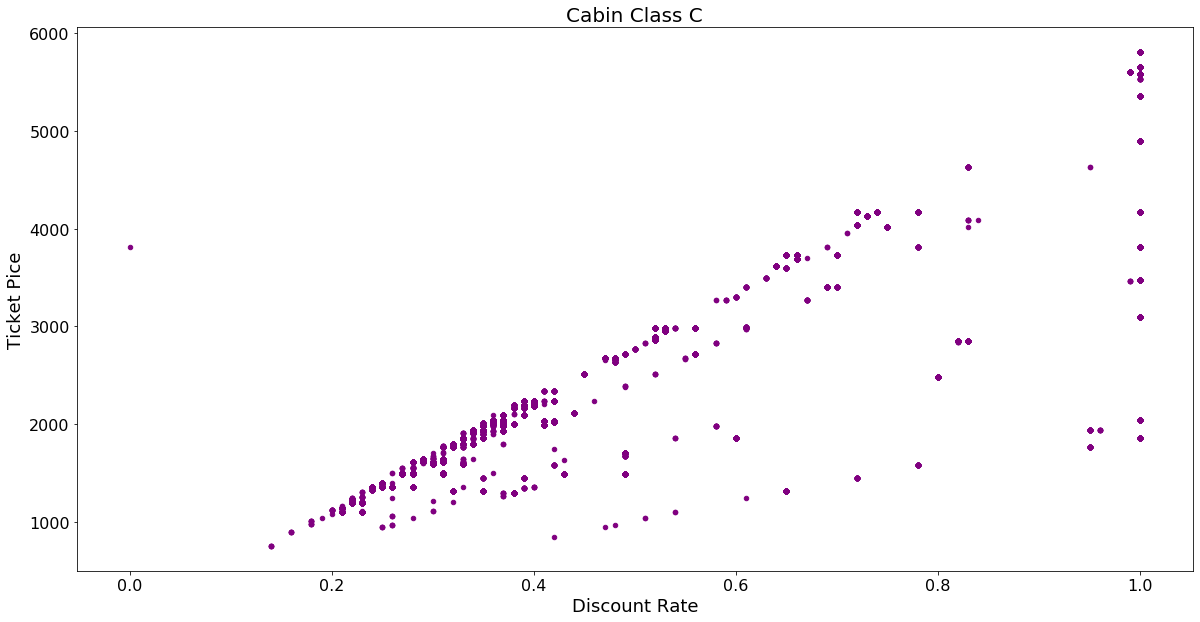

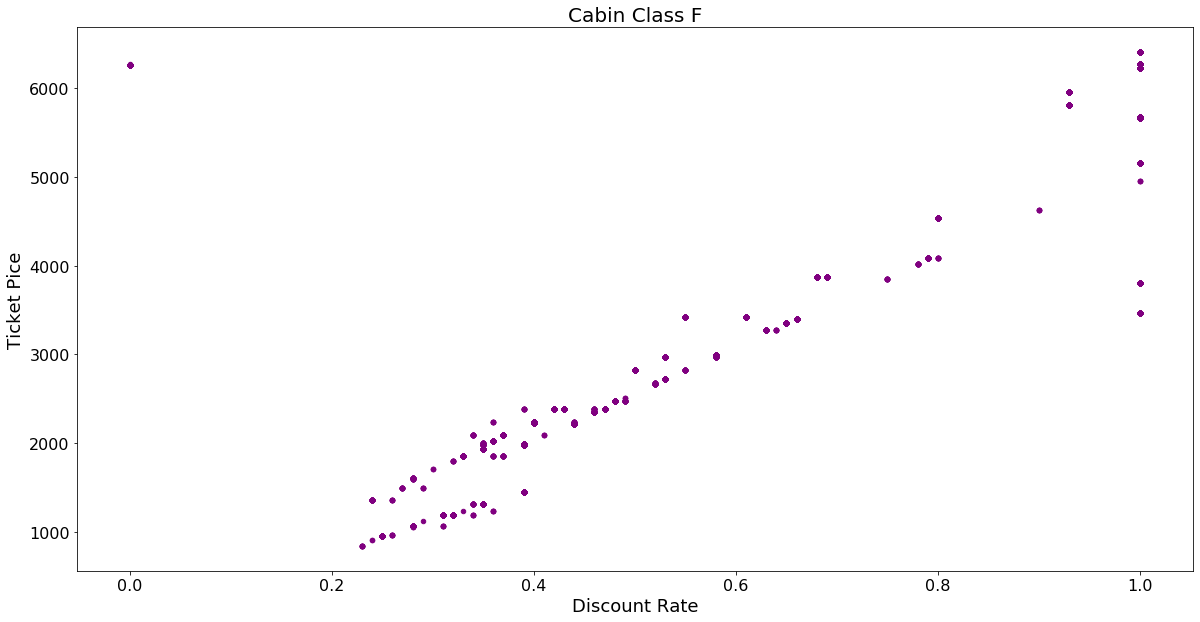

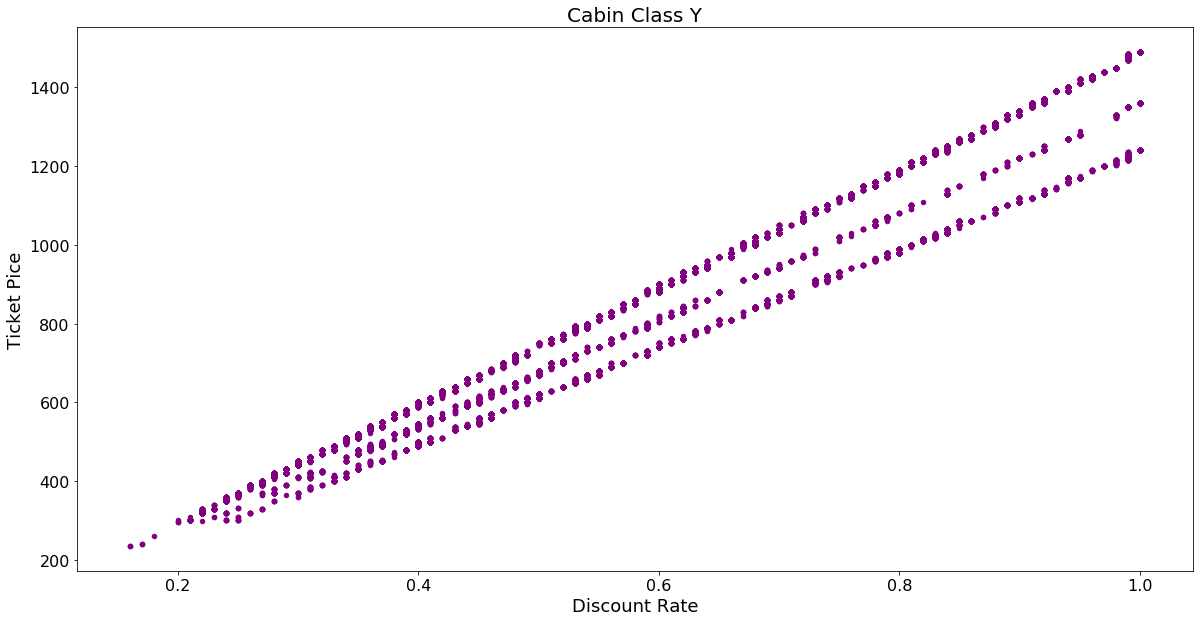

In [216]:
# Make a visual representation of data to explore price and discount rate behavior by Cabin Class
for cabinClass in list_cabinClass:
    plt.figure(figsize=(20,10))
    plt.scatter(df[df["cabinClass"] == "{}".format(cabinClass)]["rate"],
                df[df["cabinClass"] == "{}".format(cabinClass)]["price"],
               s=20, color = "purple")
    plt.xlabel("Discount Rate", fontsize=18)
    plt.ylabel("Ticket Pice", fontsize=18)
    plt.title("Cabin Class {}".format(cabinClass), fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

In [217]:
print("Number of entetites with price/discout rate discrepency:",df[(df["rate"] == 0) & (df["price"] > 0)].shape[0])
df[(df["rate"] == 0) & (df["price"] > 0)].head()

Number of entetites with price/discout rate discrepency: 46


,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
40558,47997064,HO1252,321,PEK,NaN,SHA,2019-05-14 06:50:00,2019-05-14 09:05:00,C,J,3810,0.0,2019-04-14 18:18:53,30
74905,14627,MU5110,773,PEK,NaN,SHA,2019-01-04 12:00:00,2019-01-04 14:20:00,F,U,6260,0.0,2019-01-03 14:26:15,1
74908,14636,MU5112,359,PEK,NaN,SHA,2019-01-04 13:00:00,2019-01-04 15:15:00,F,U,6260,0.0,2019-01-03 14:26:15,1
74937,14796,MU5126,773,PEK,NaN,SHA,2019-01-04 20:00:00,2019-01-04 22:15:00,F,U,6260,0.0,2019-01-03 14:26:15,1
74945,14858,MU5128,359,PEK,NaN,SHA,2019-01-04 21:00:00,2019-01-04 23:15:00,F,U,6260,0.0,2019-01-03 14:26:15,1


In [218]:
# It seems from the graphs we have above like that we have set of lines graphs with correlation near 1 for price and discount rate.
# So most likely the price column is discounted price, having that as our main theory we have 46 cases of discrepancy,
# when having discount rate 0 we still have price to pay, most likely its an input mistake. As for now lets keep all rows.
# For further exploration lets create data frame with fixed set of features to check either or not we can get the series 
# of line graphs with correlation near 1. That would give our theory even more evidence to be right.

In [219]:
# Lets make data frame with fixed set of features to check our assumption
df2 = df[(df["flightNumber"] == "HO1252") & (df["craftTypeCode"] == "321") & (df["cabinClass"] == "Y") & (df["priceClass"] == "T") ]

In [220]:
# Make a list of unique departure dates for df2
df2_list_departureDate = df2["departureDate"].unique()

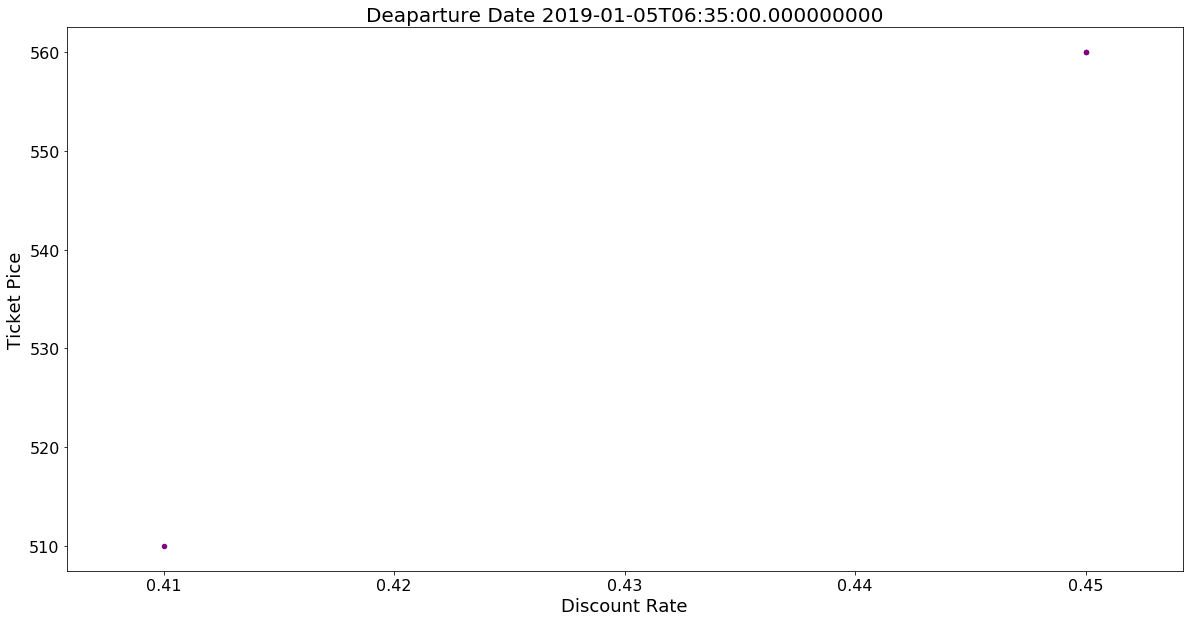

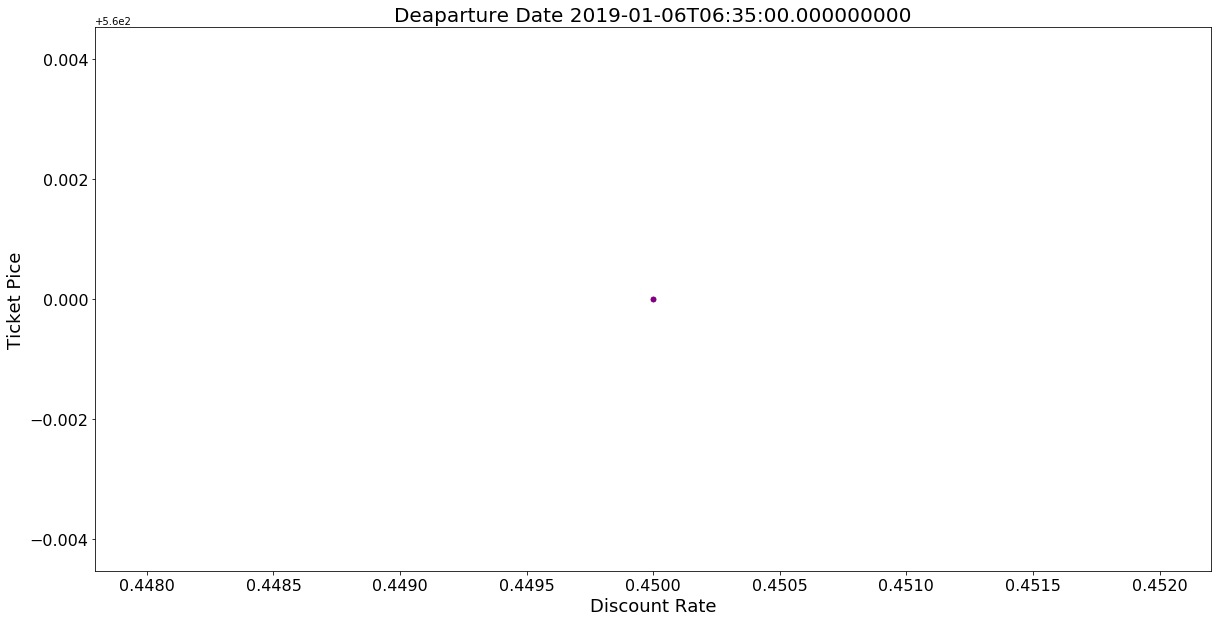

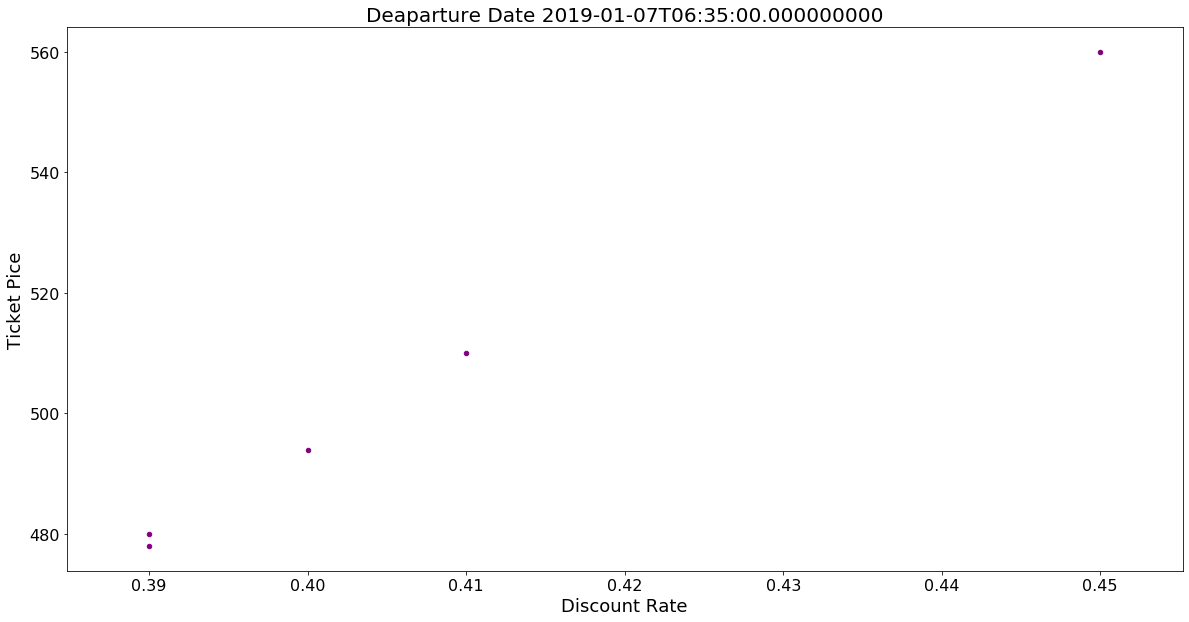

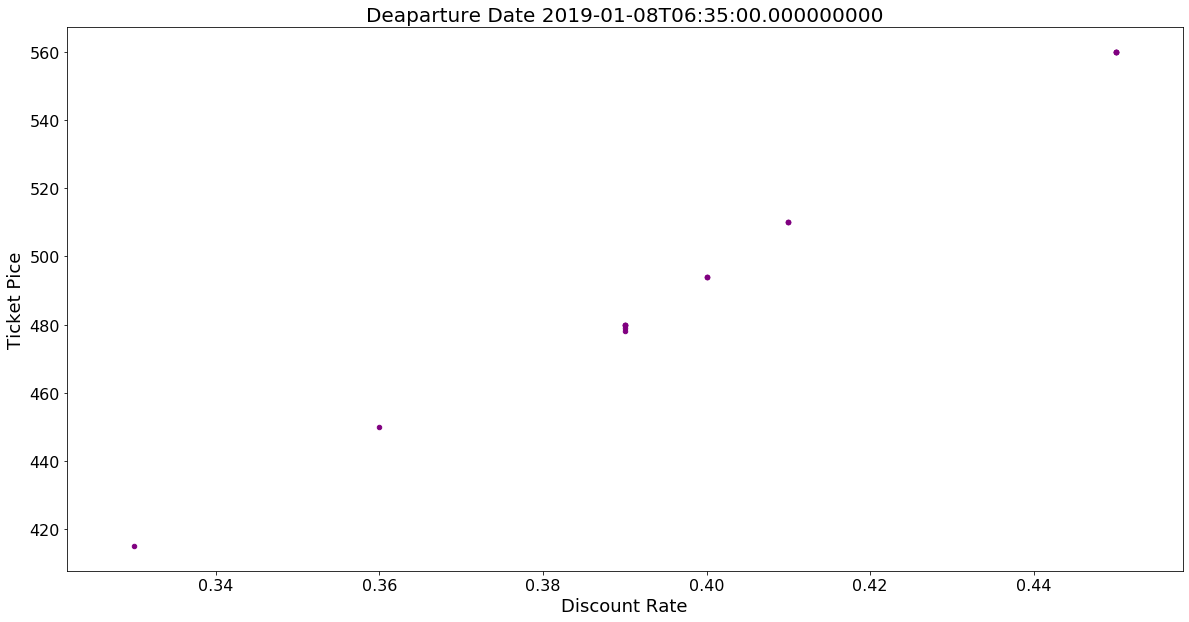

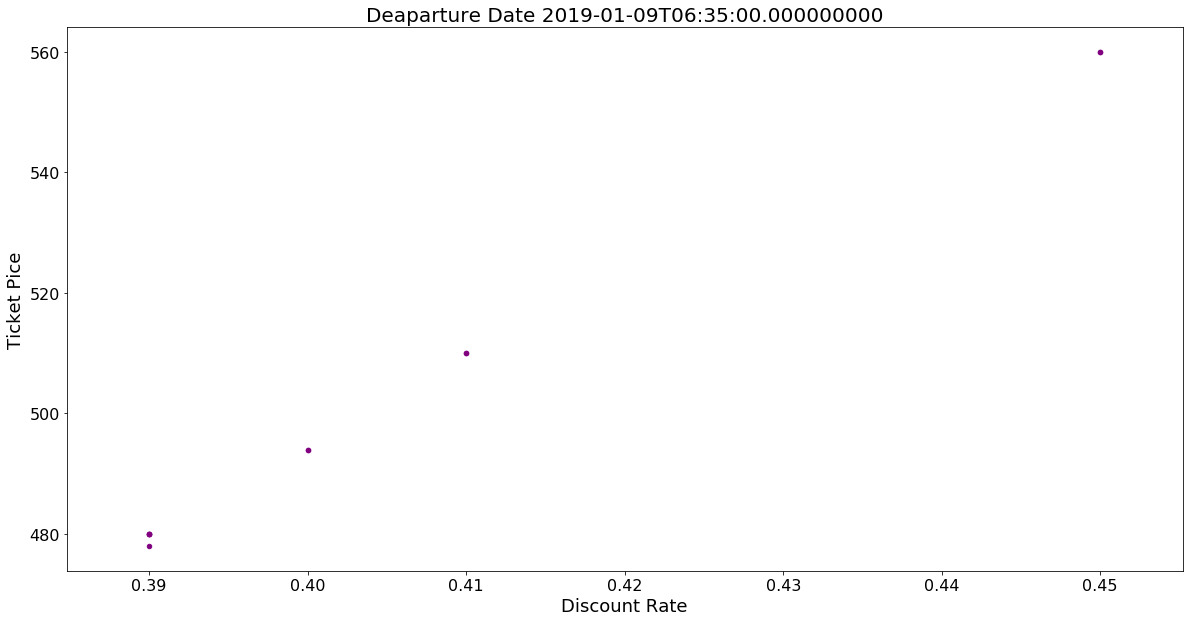

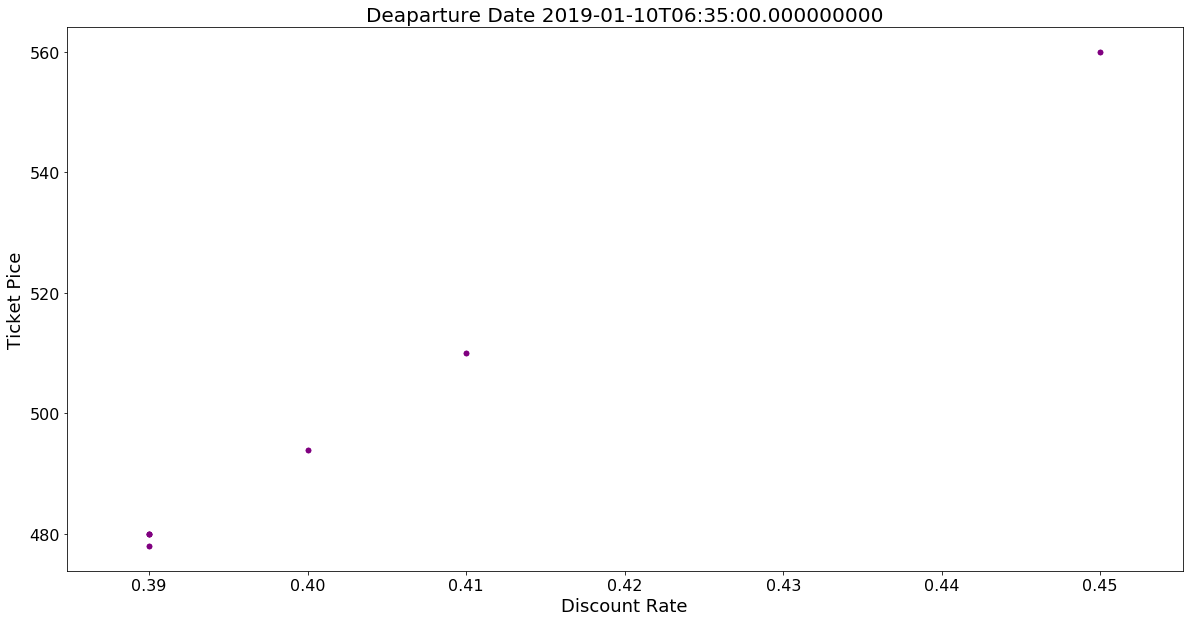

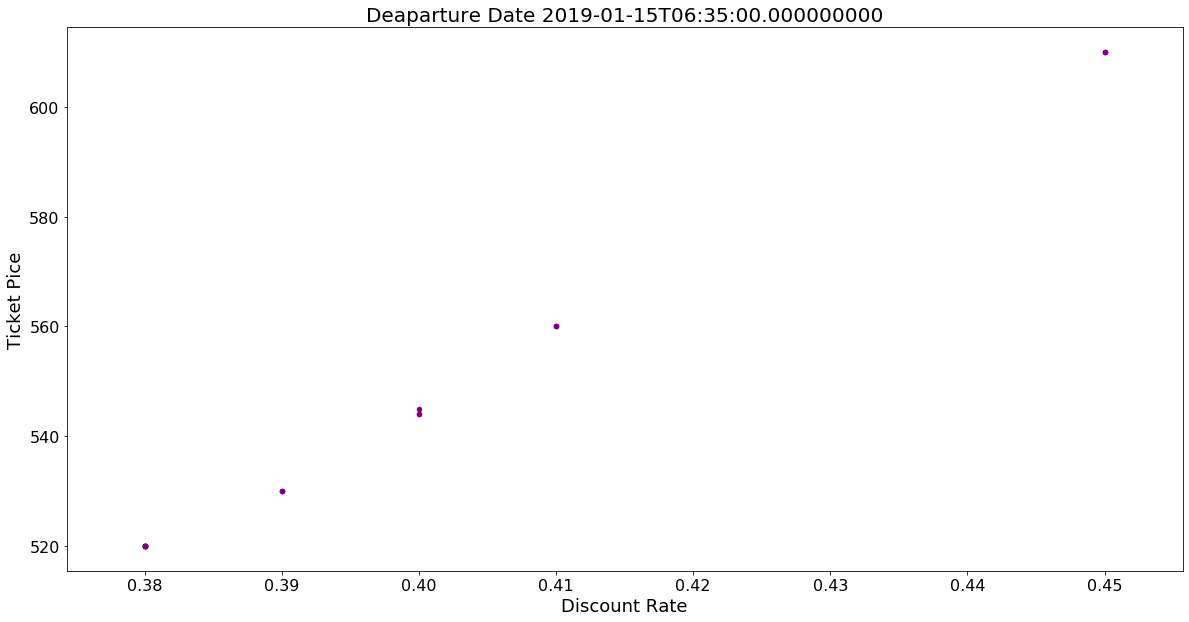

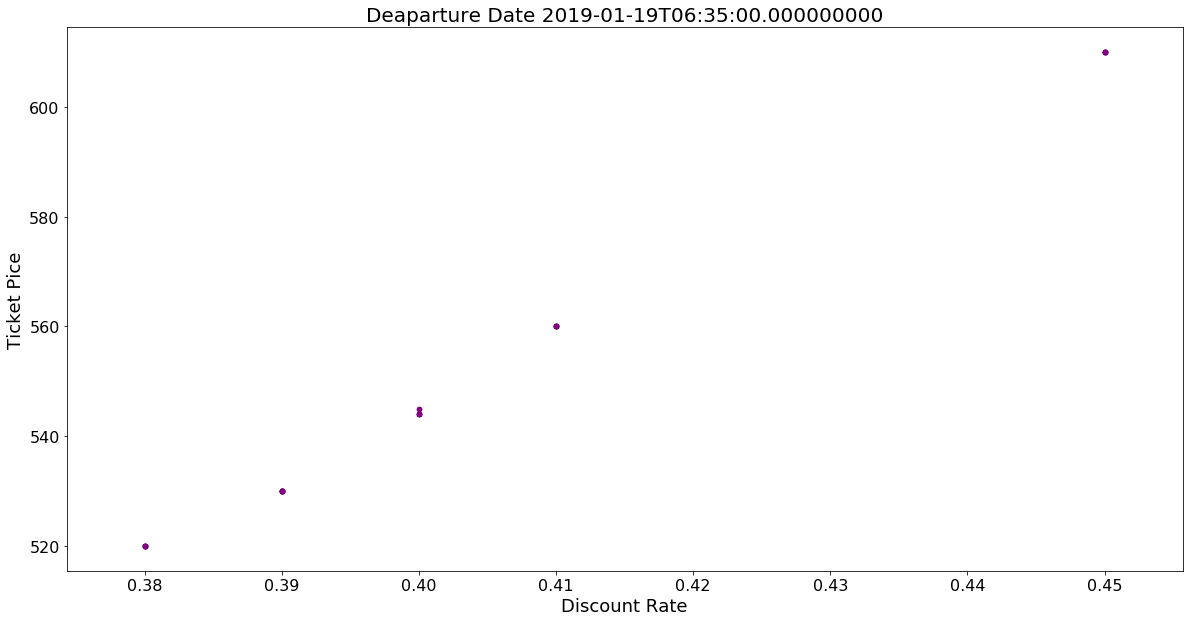

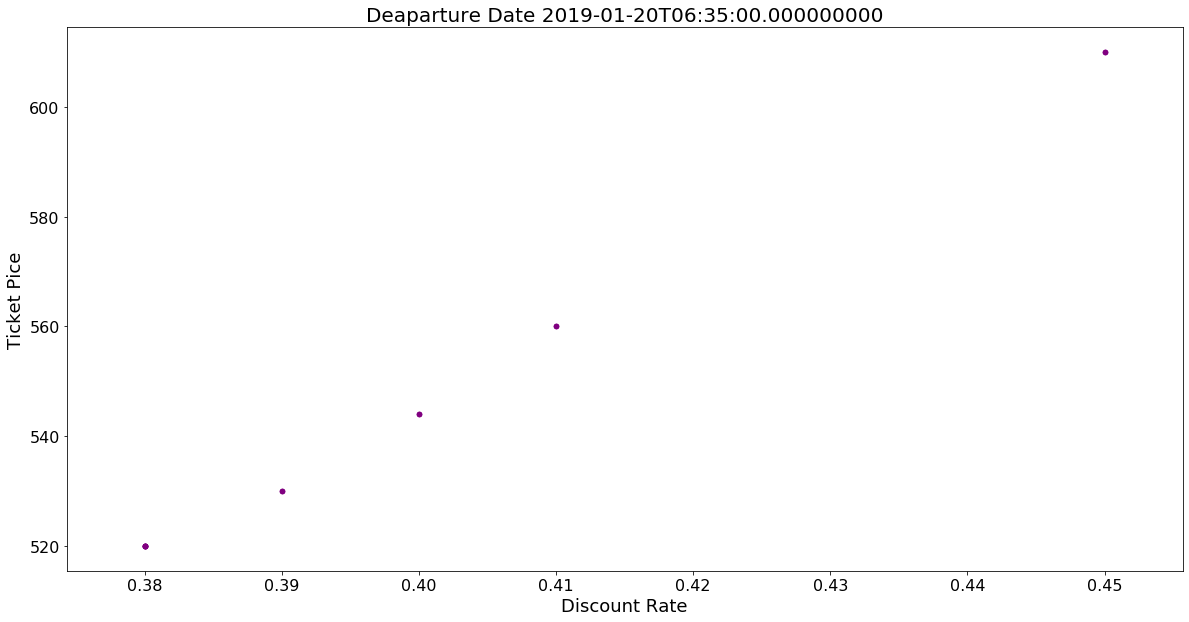

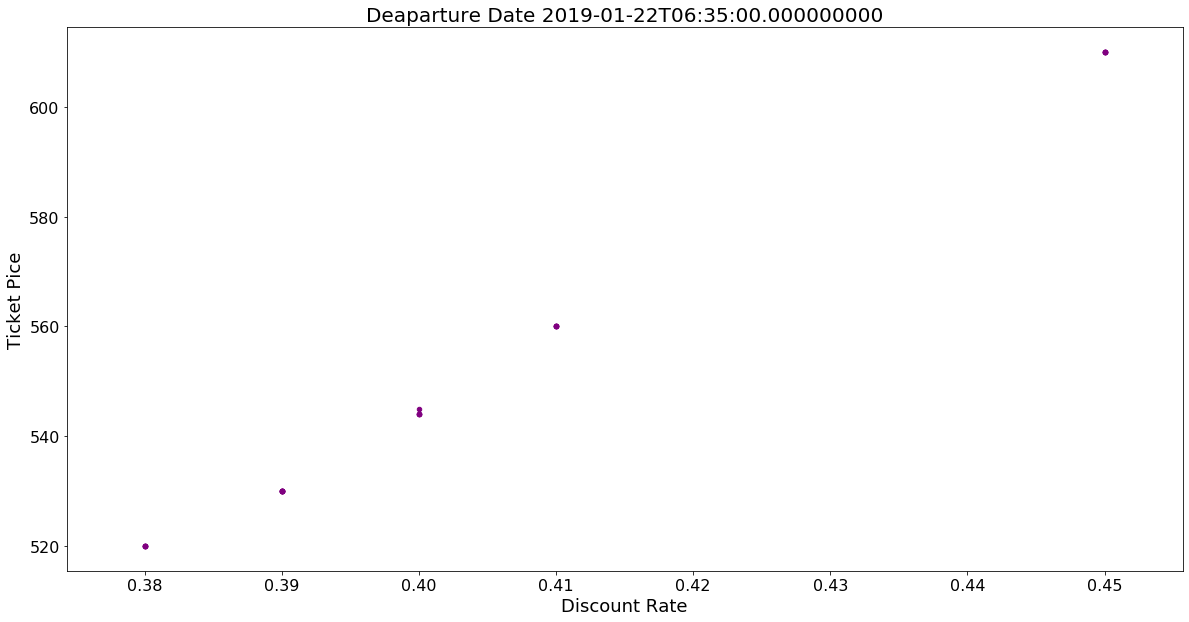

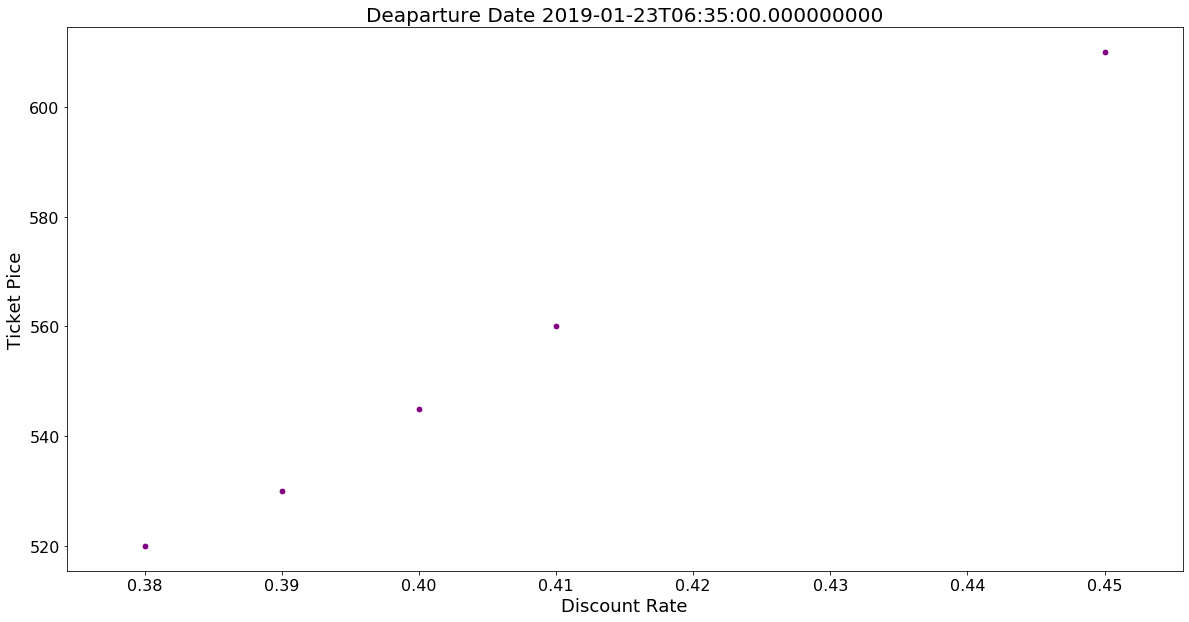

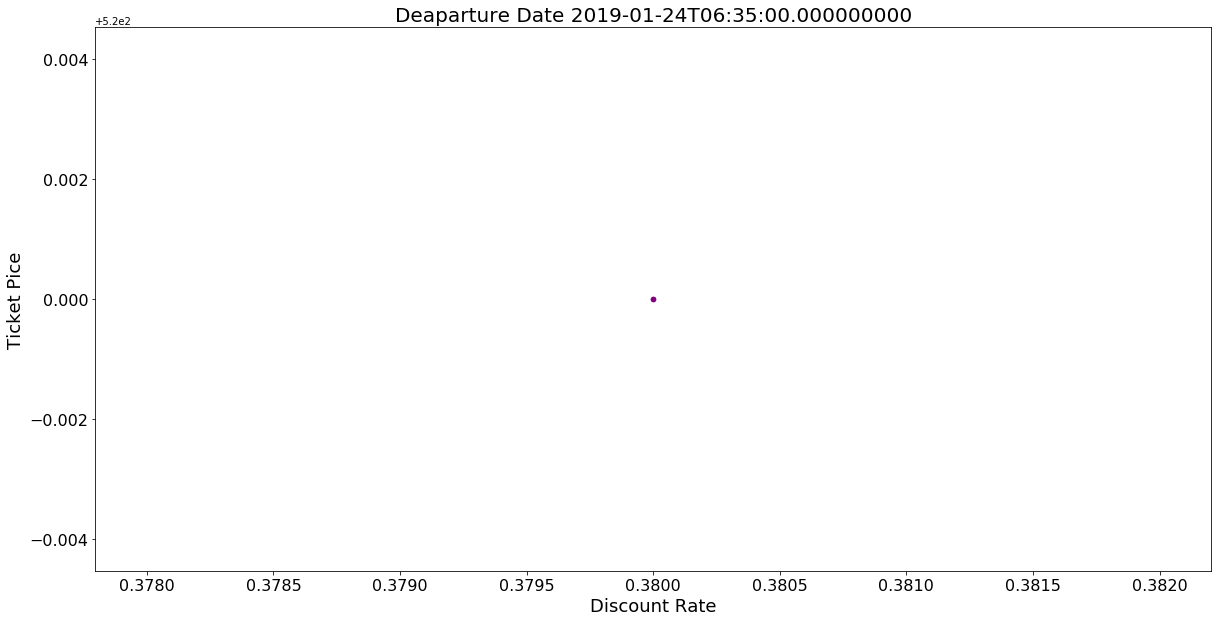

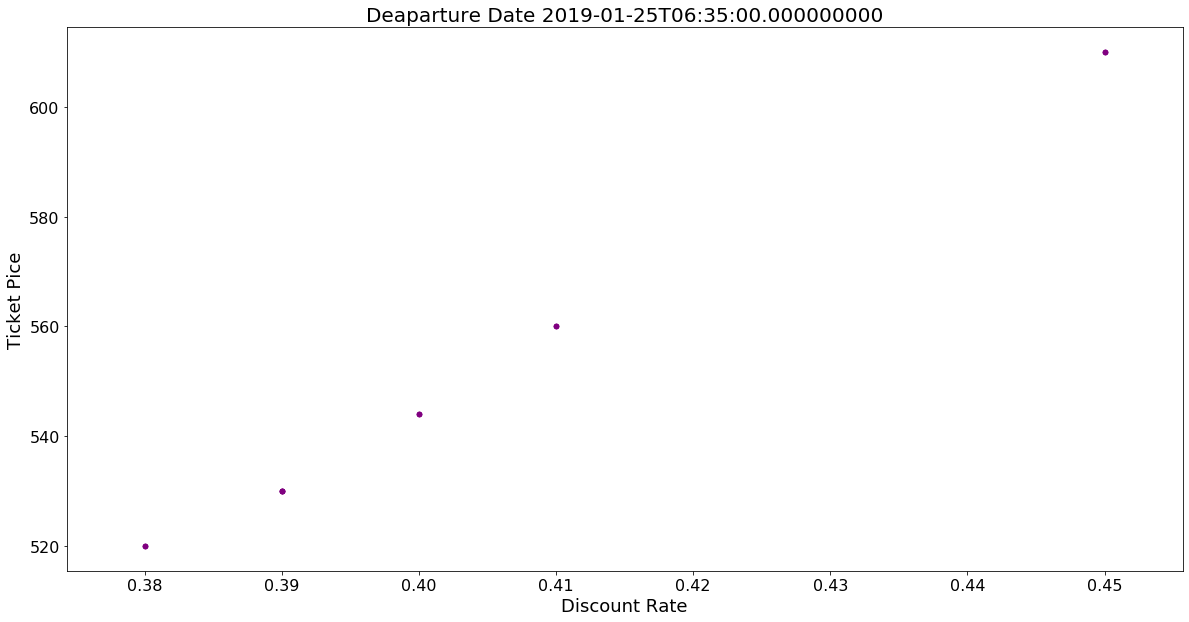

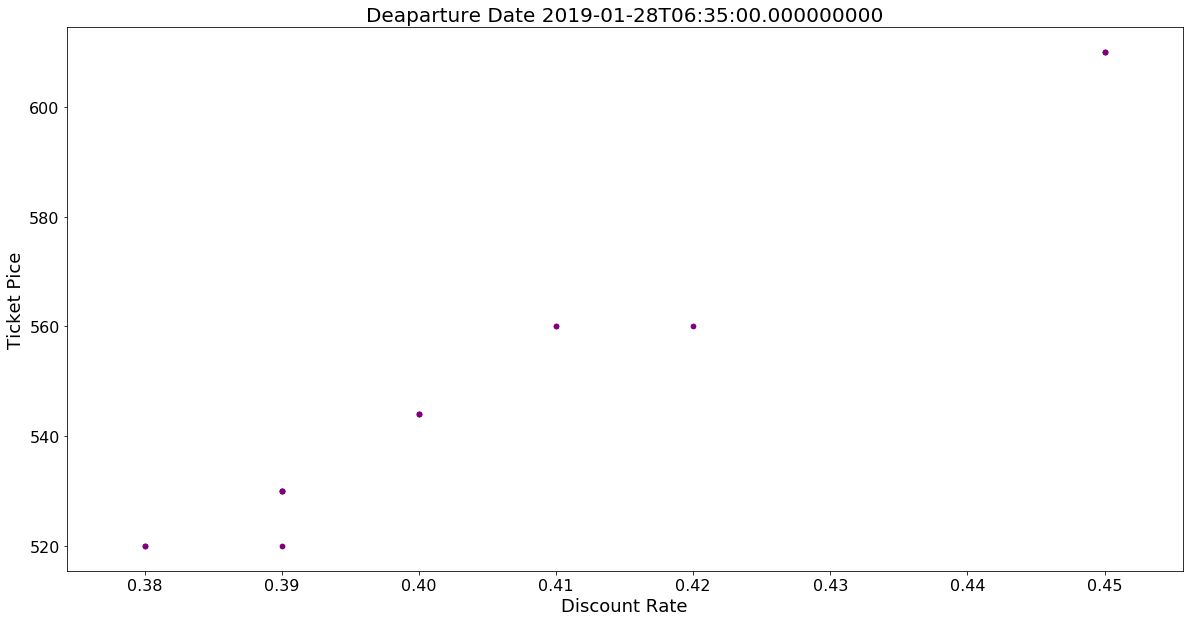

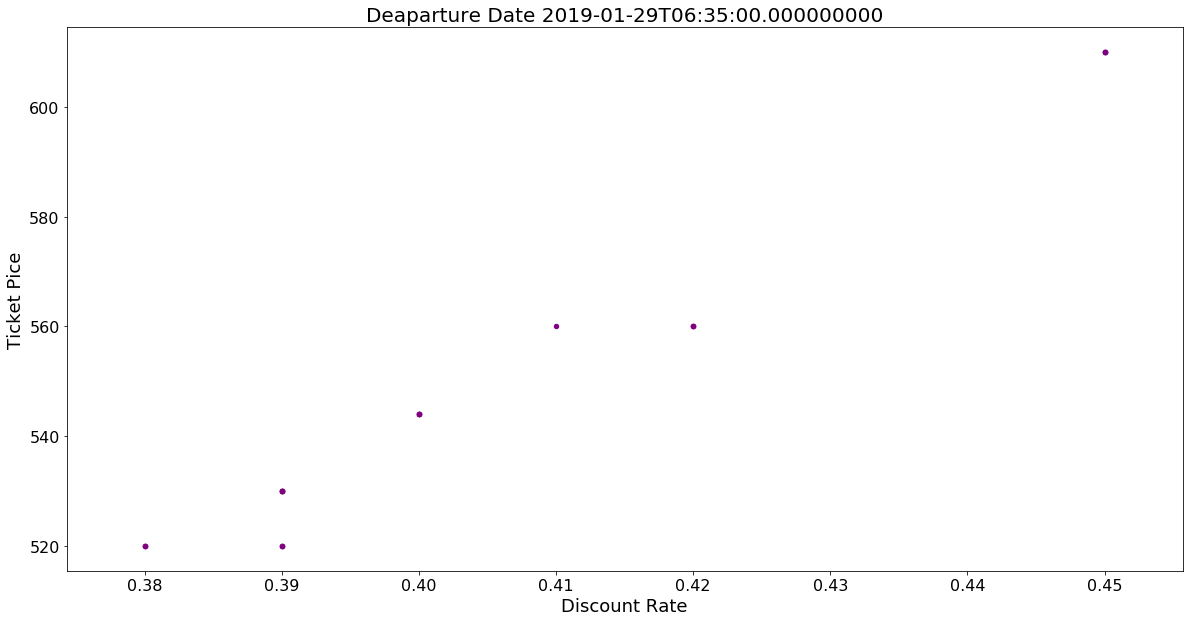

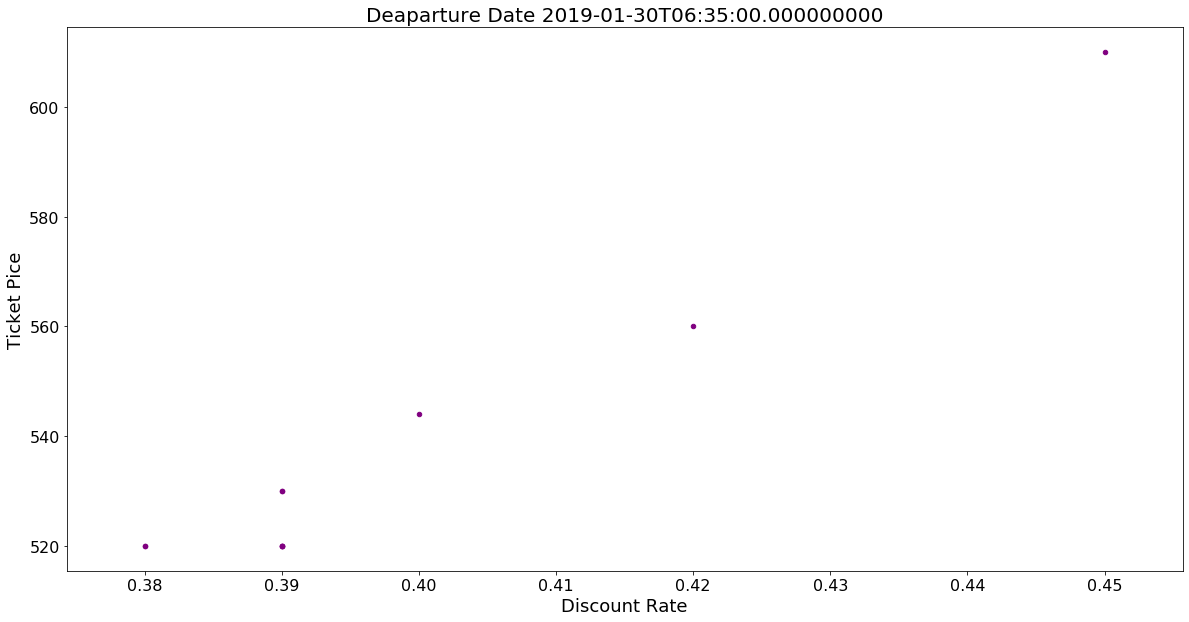

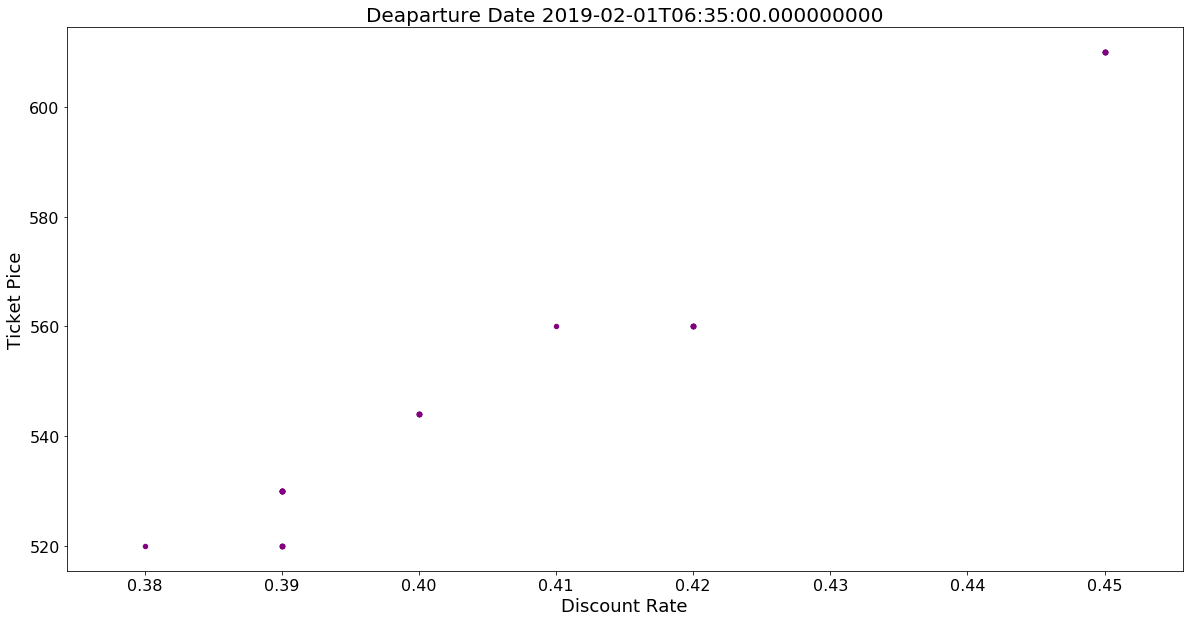

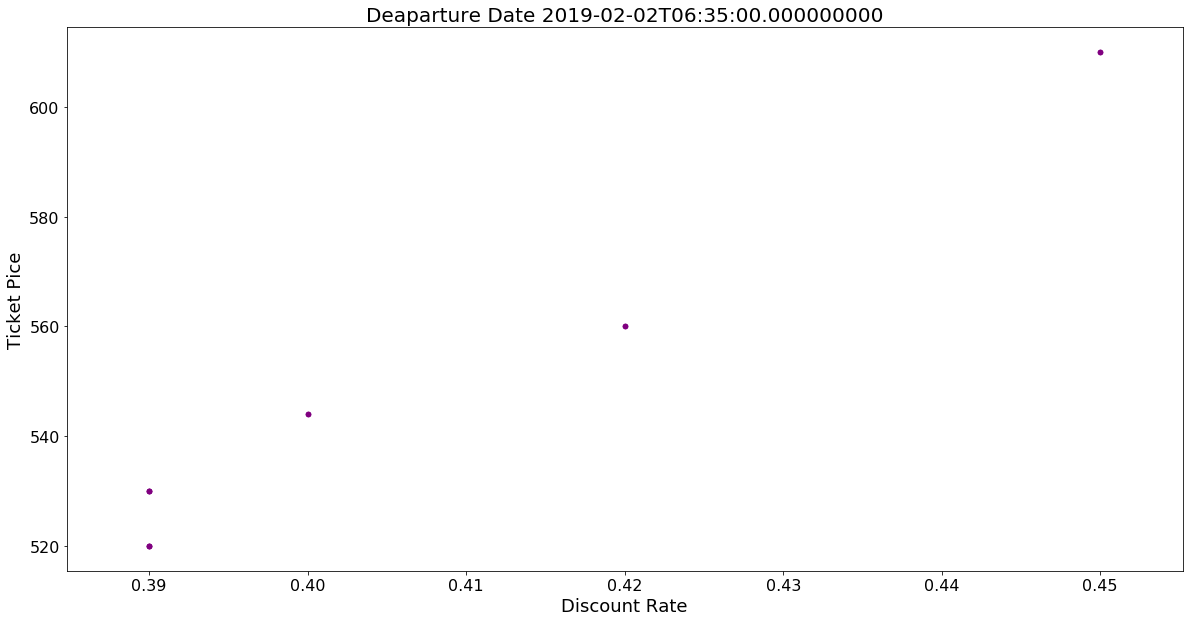

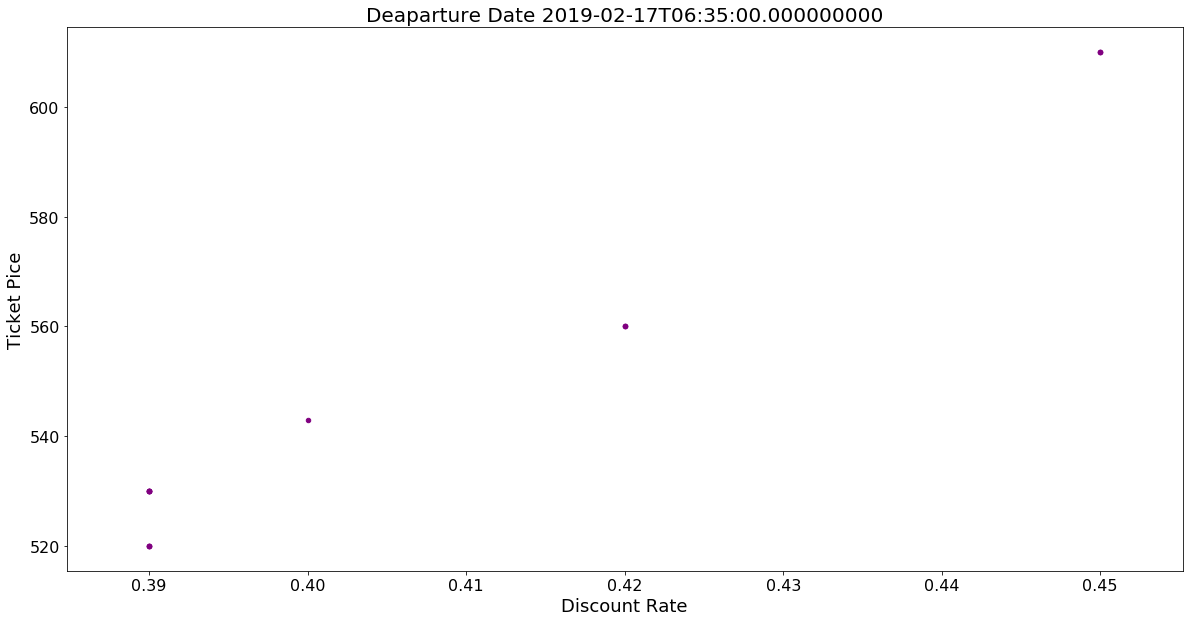

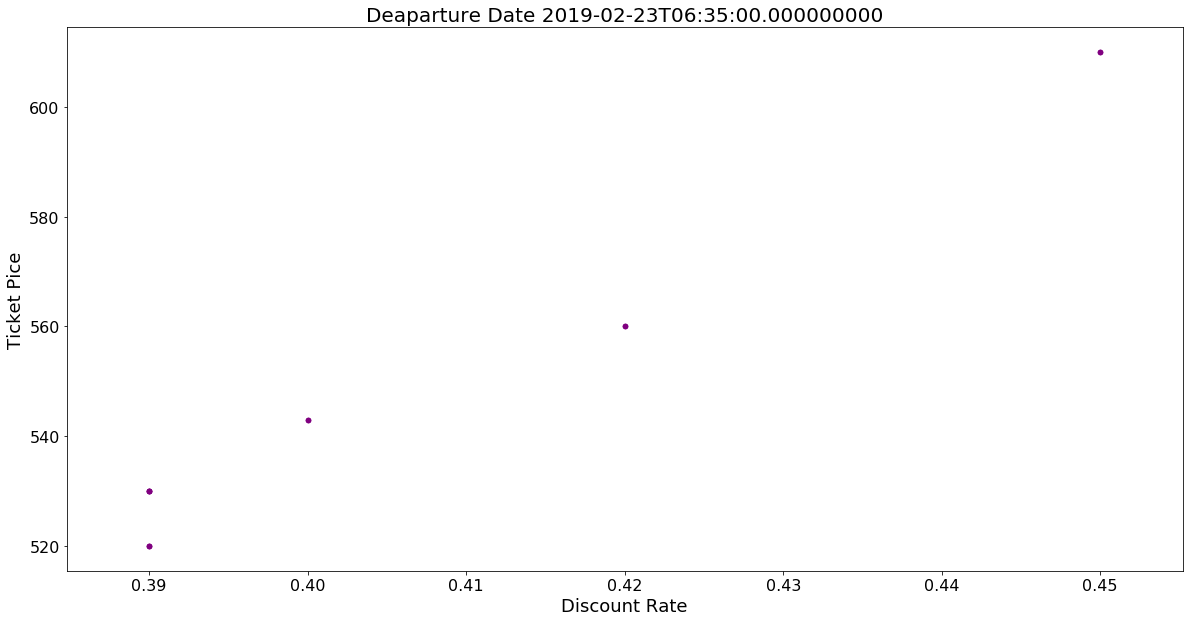

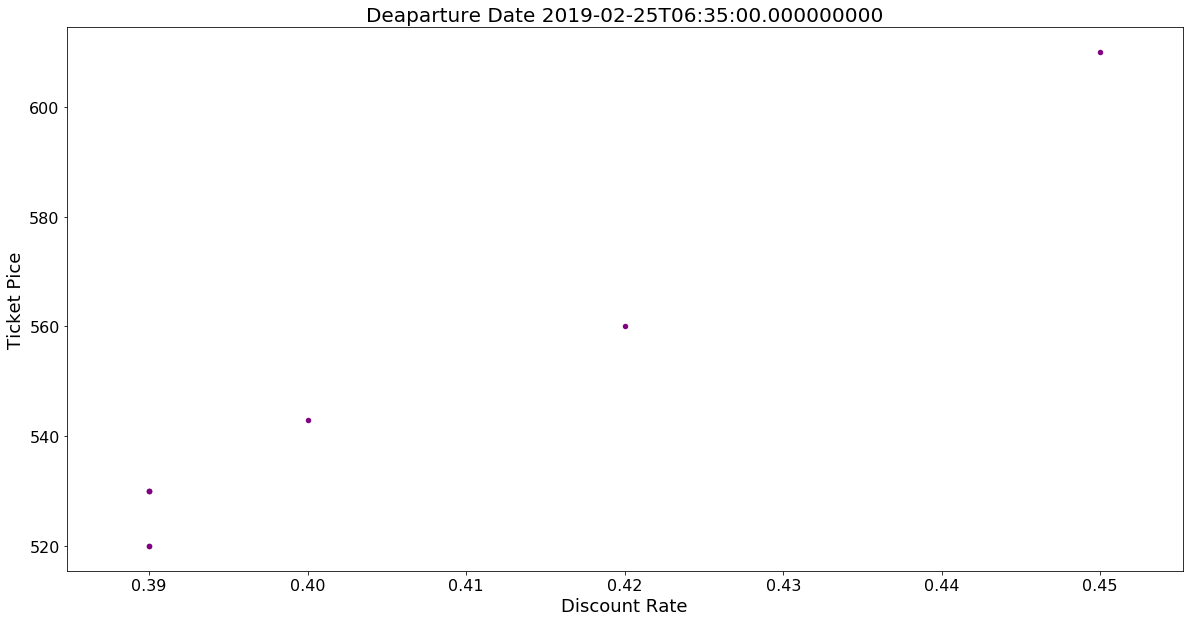

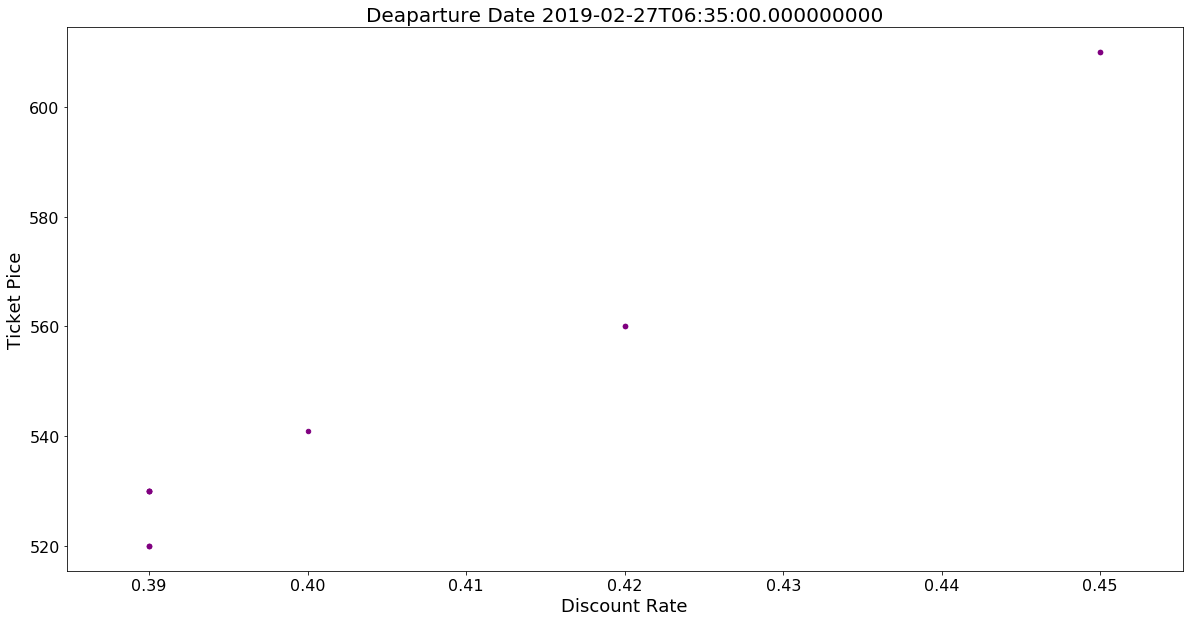

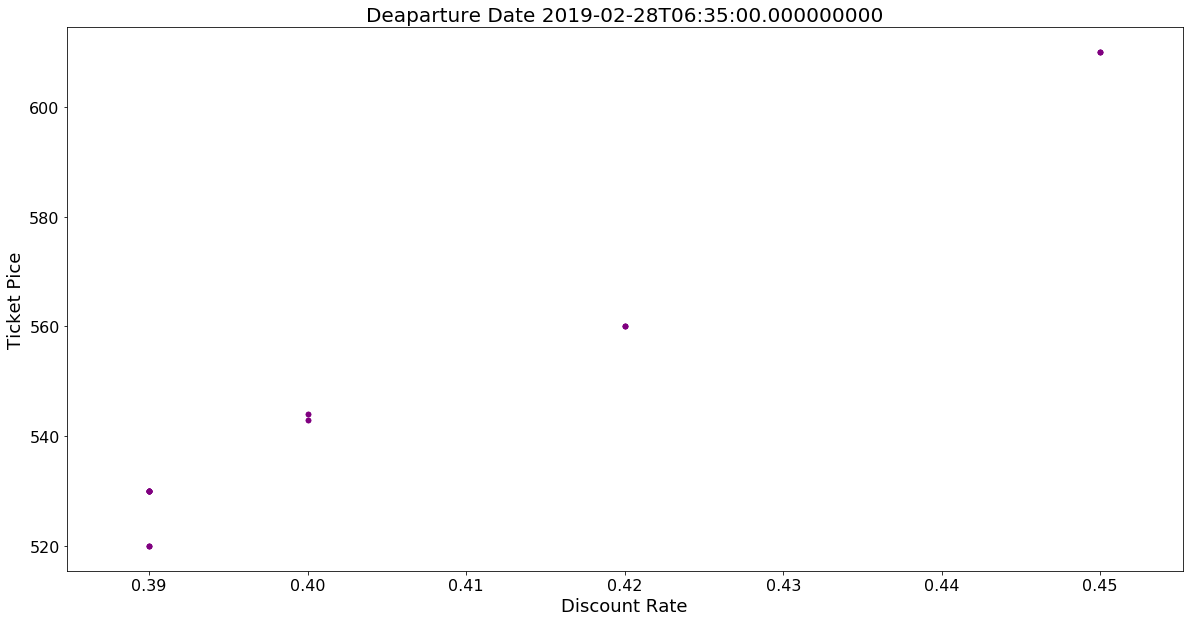

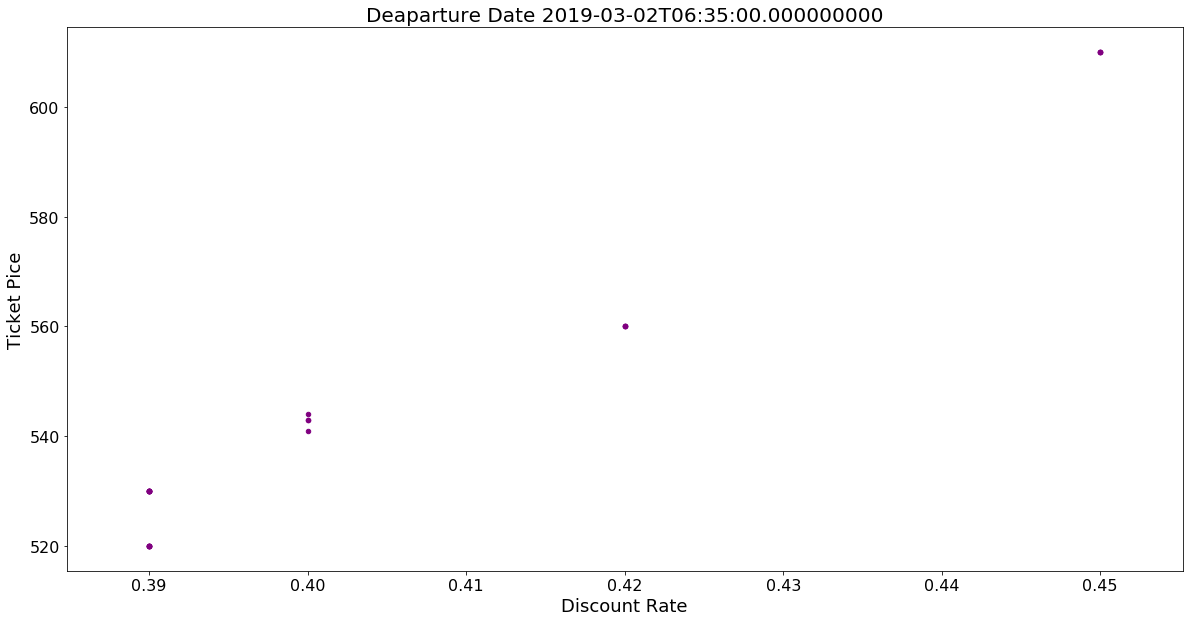

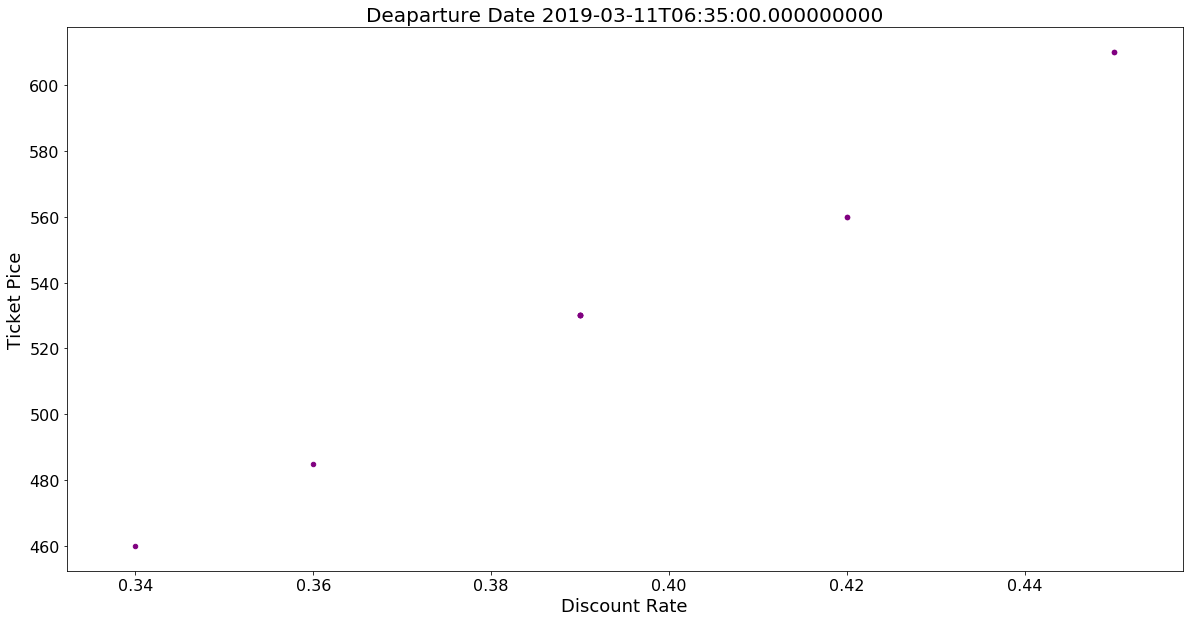

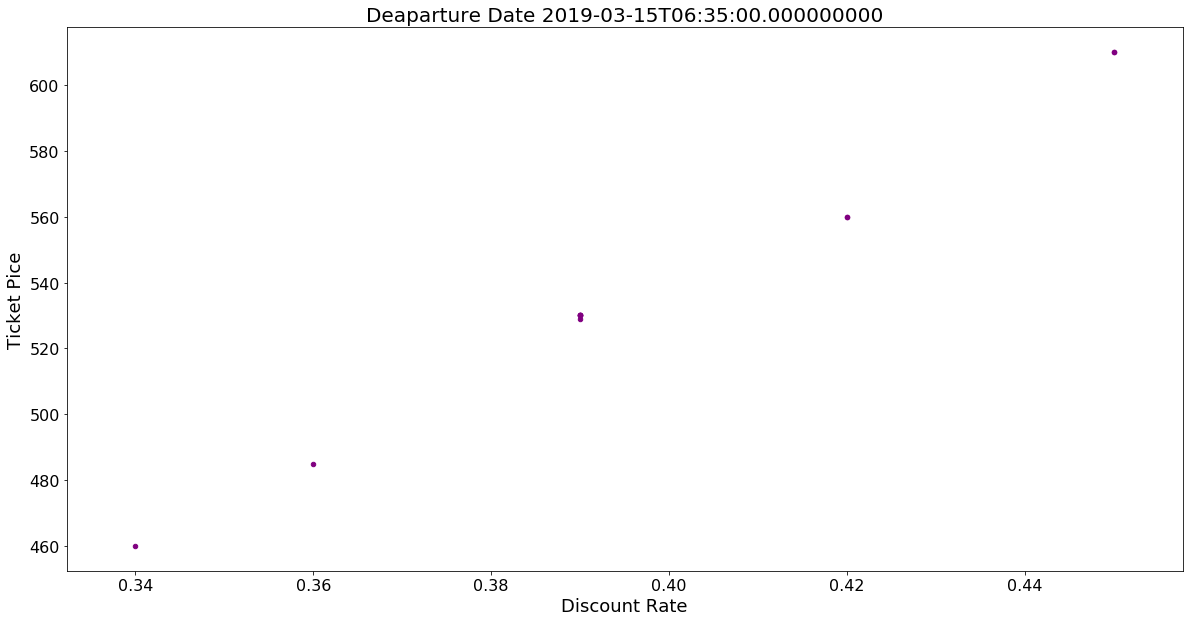

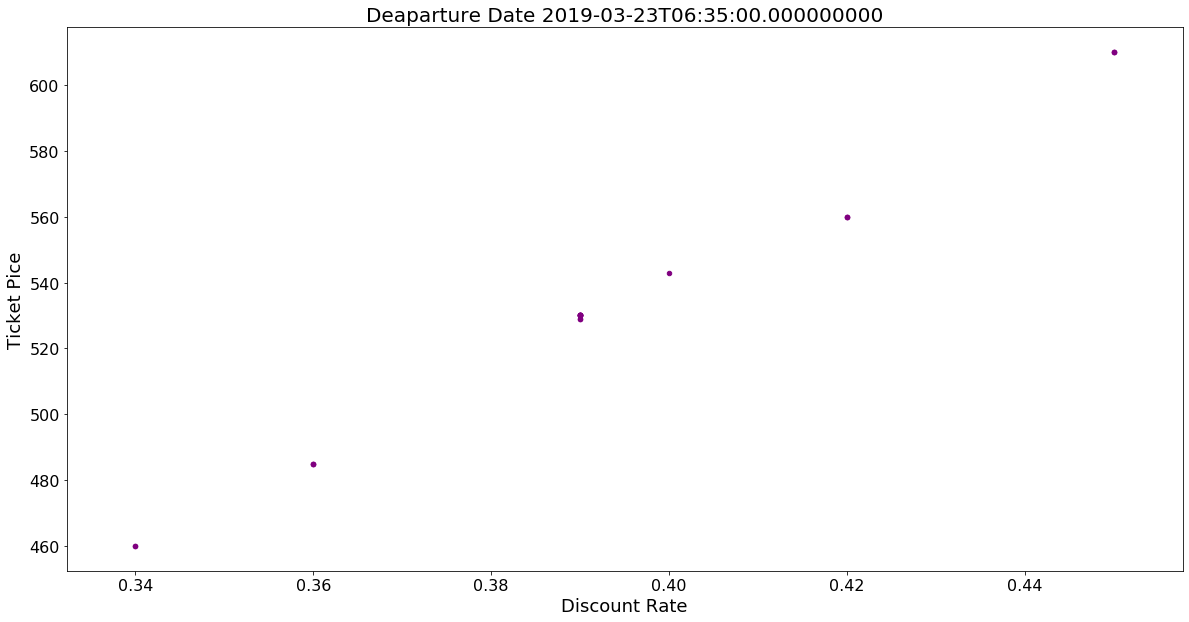

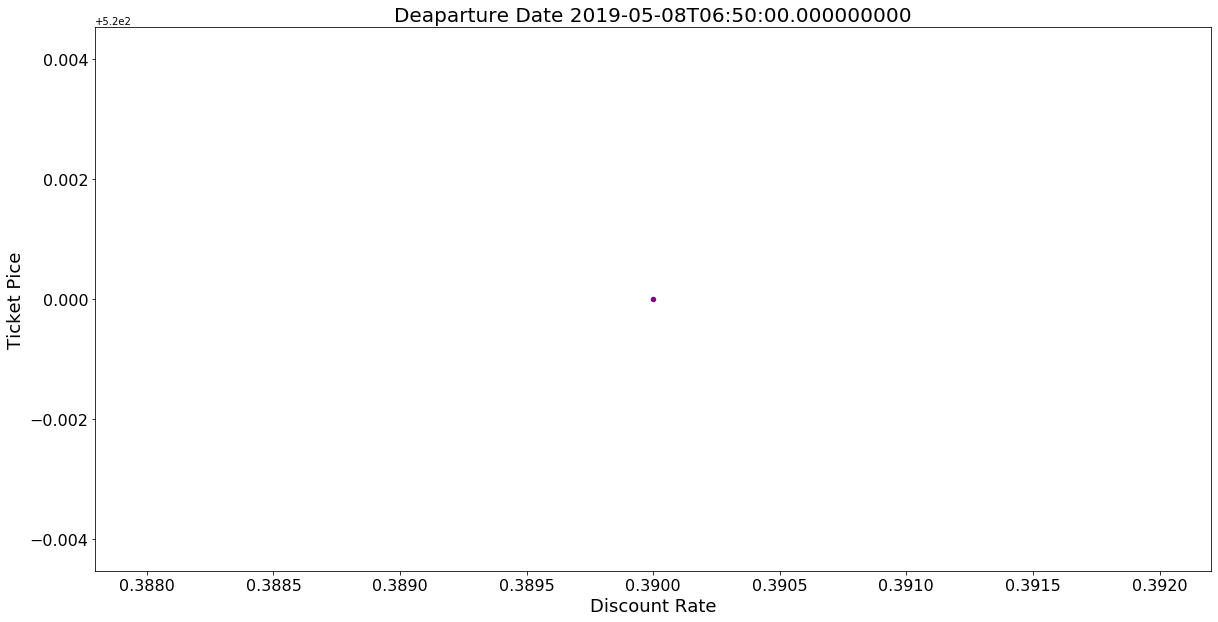

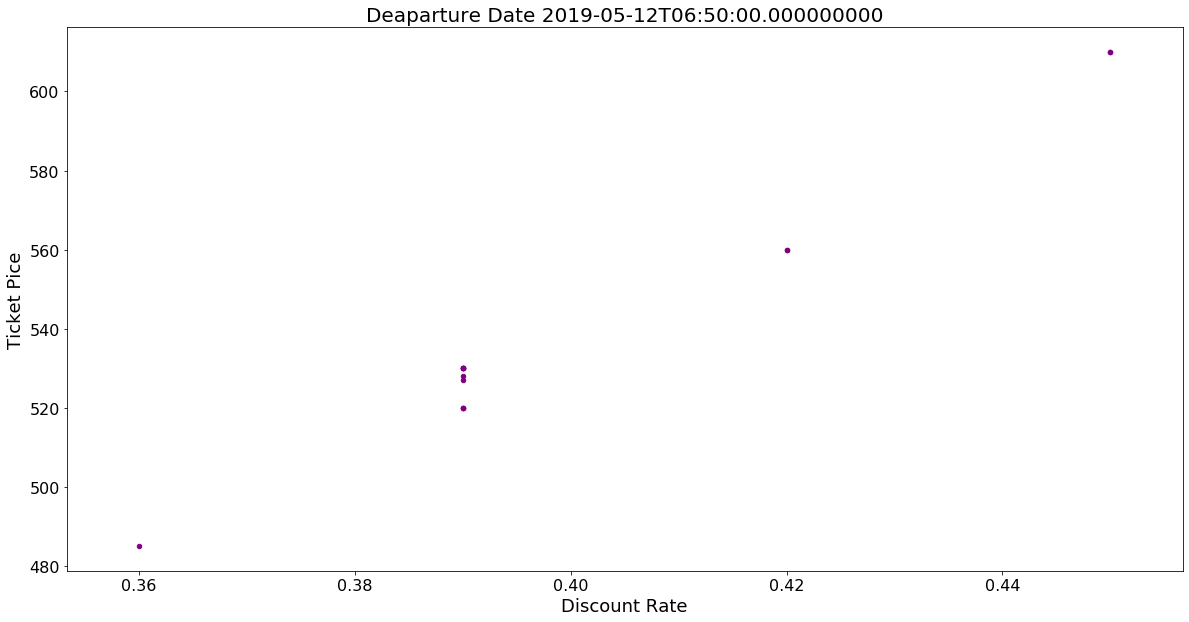

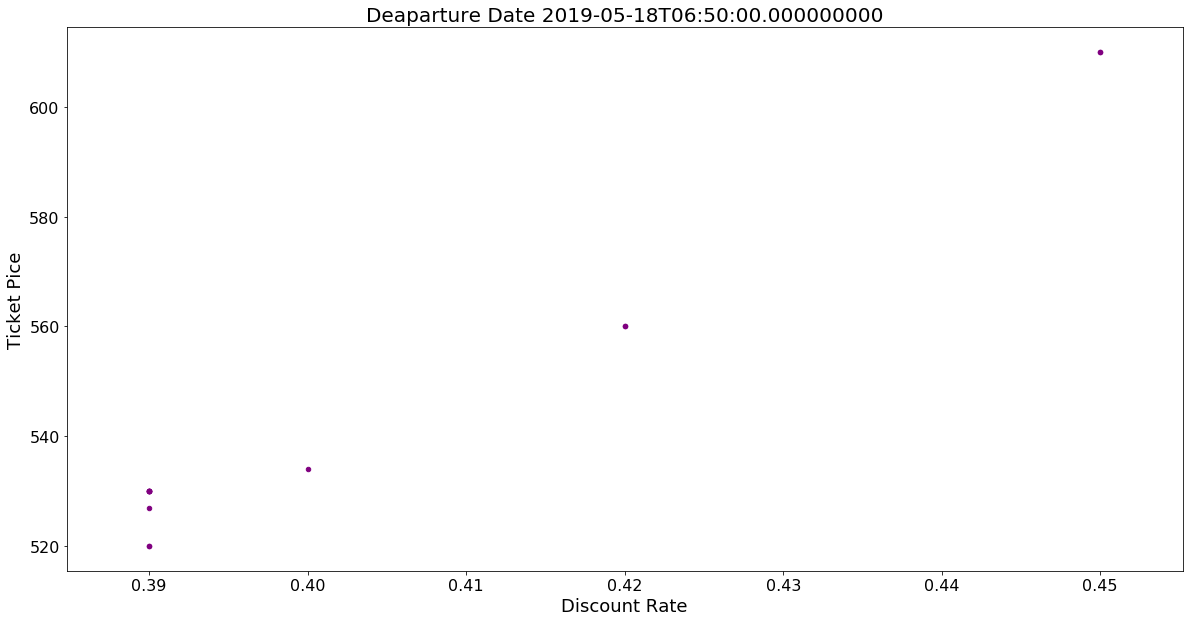

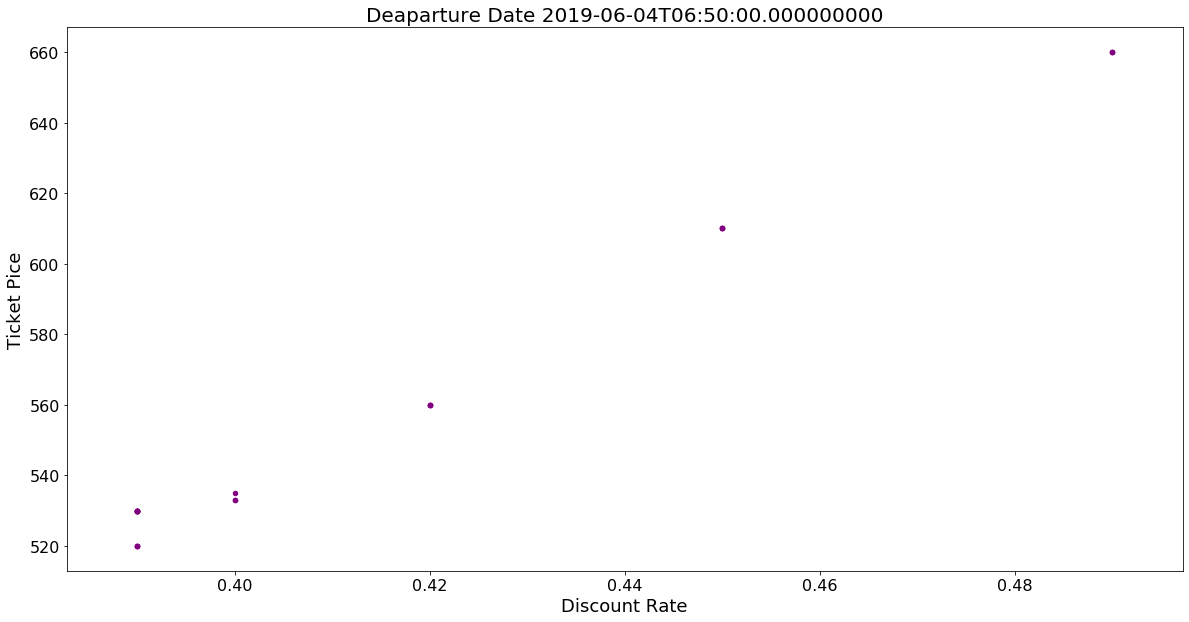

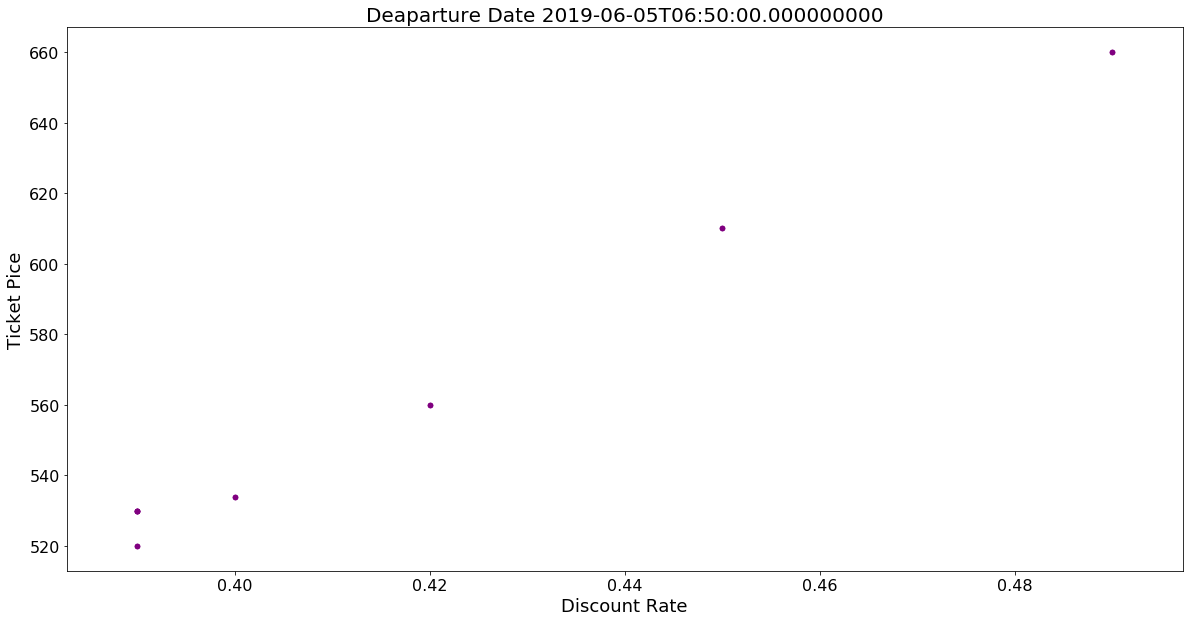

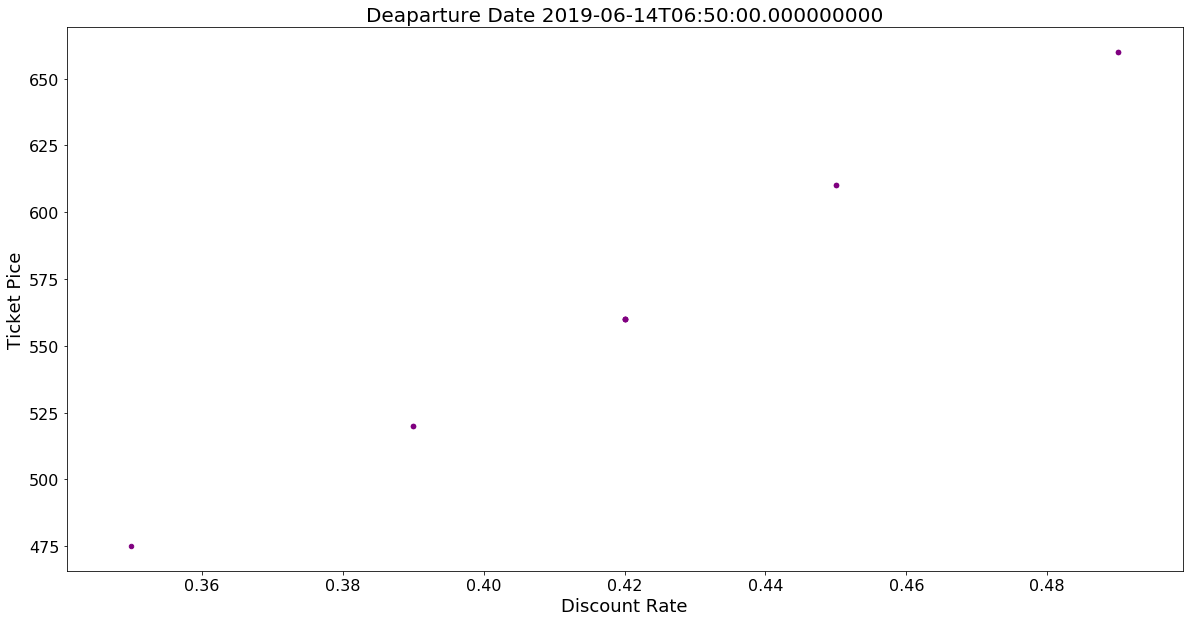

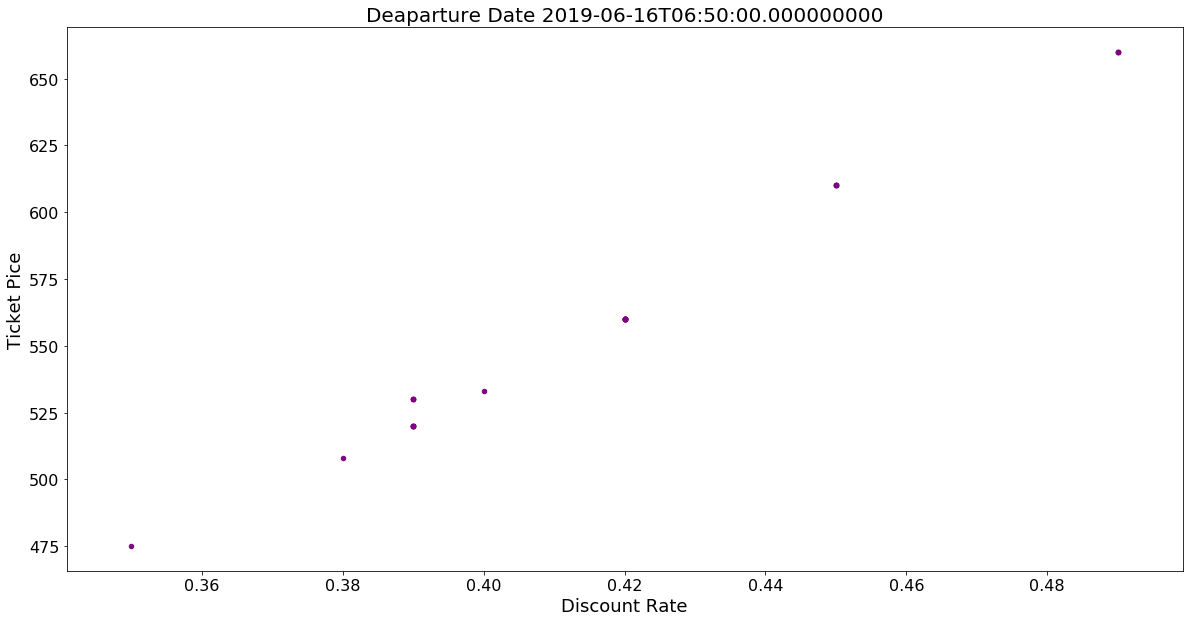

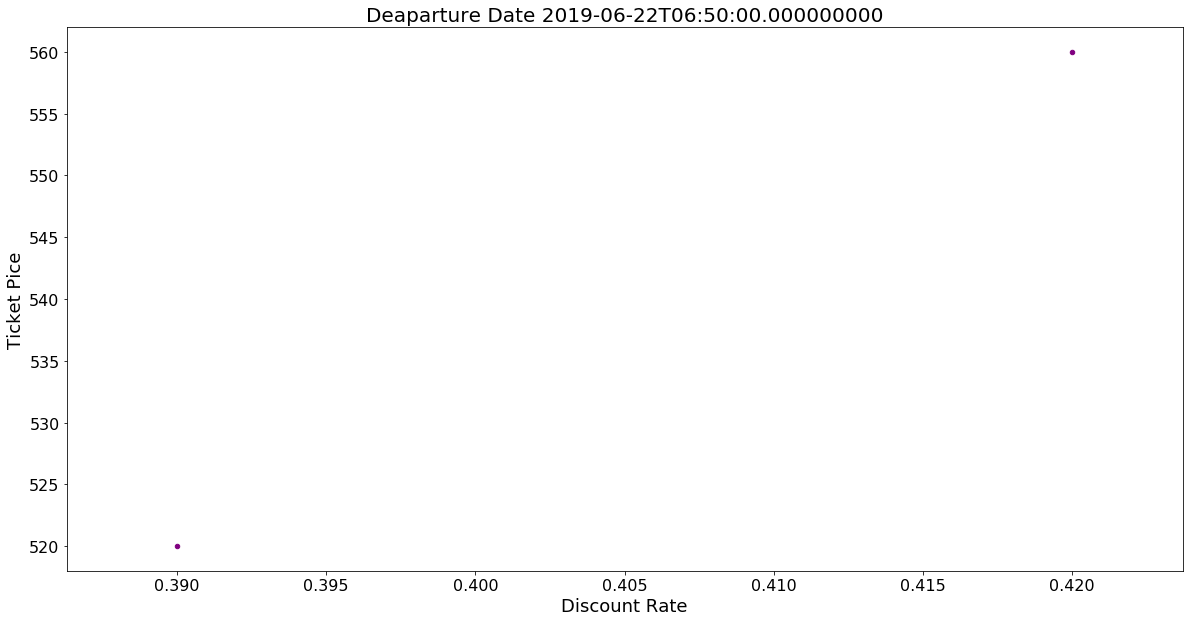

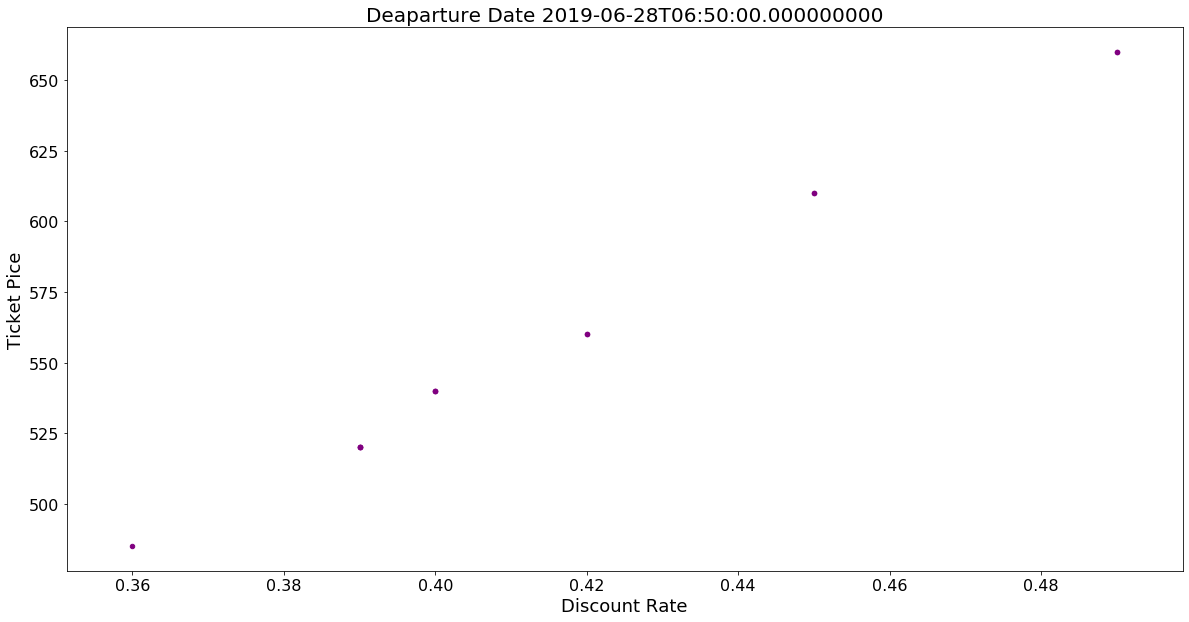

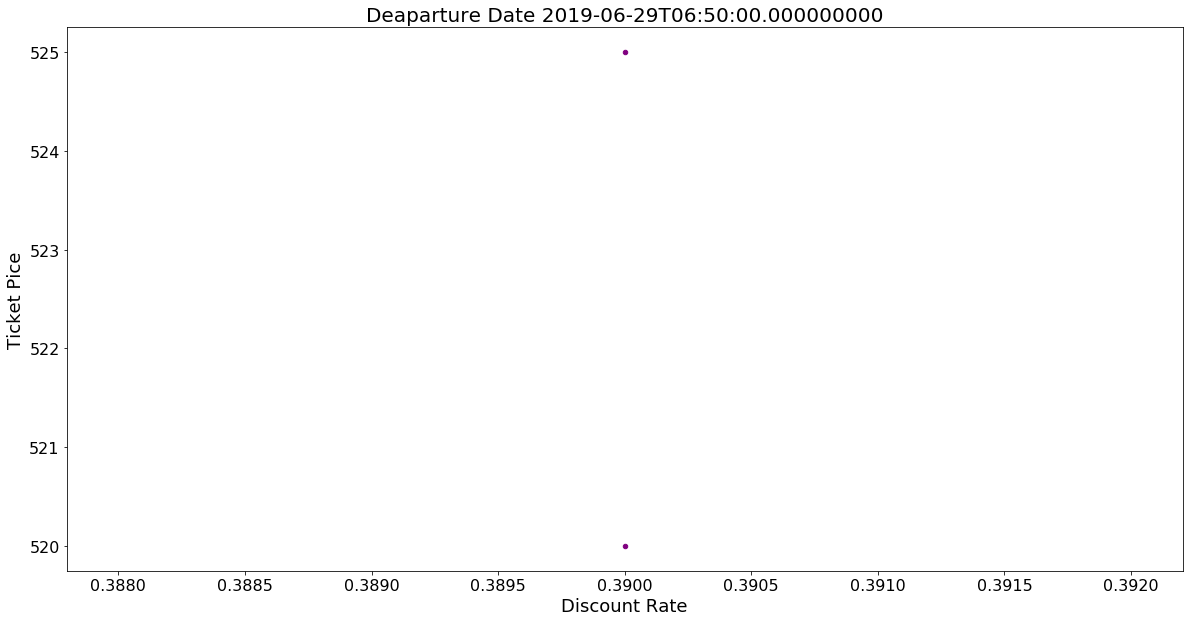

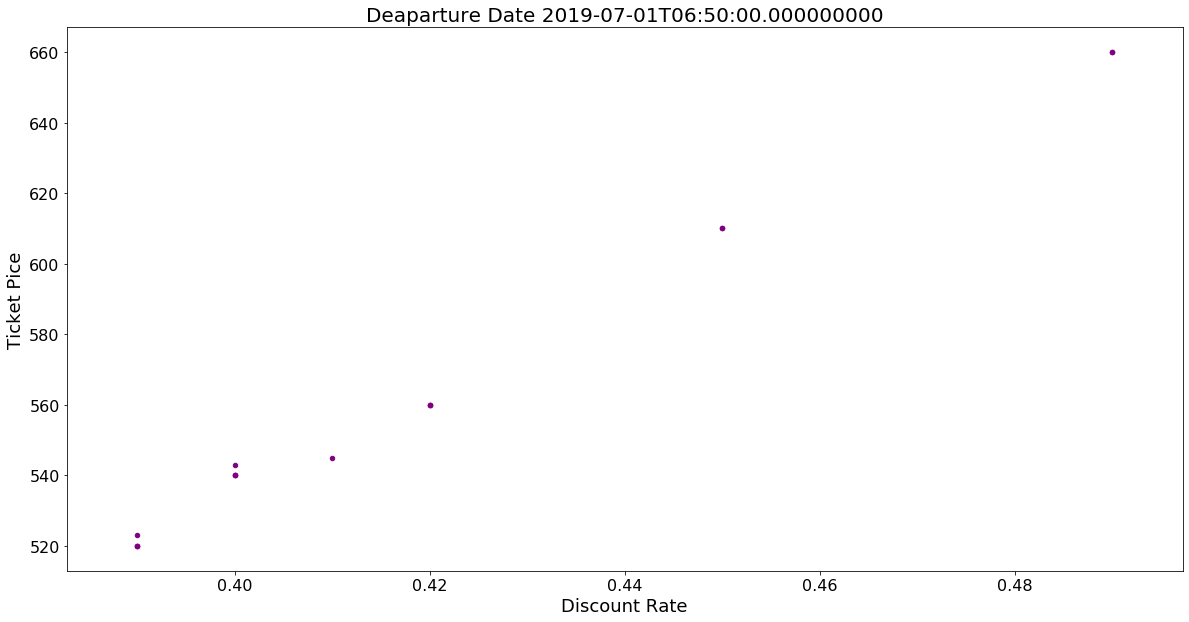

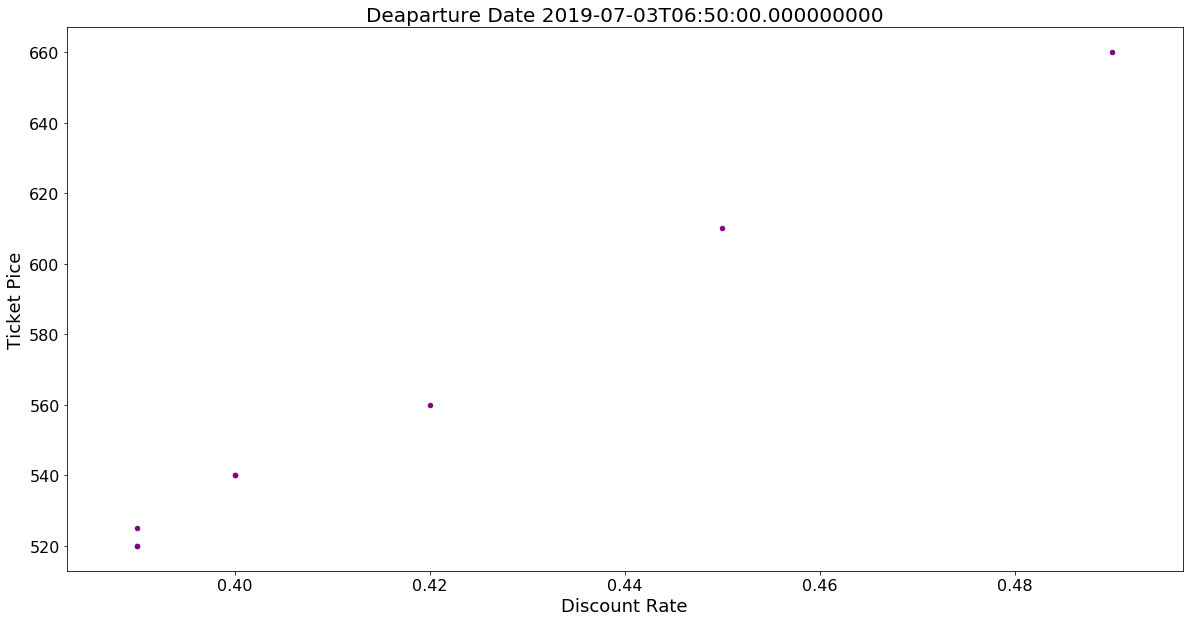

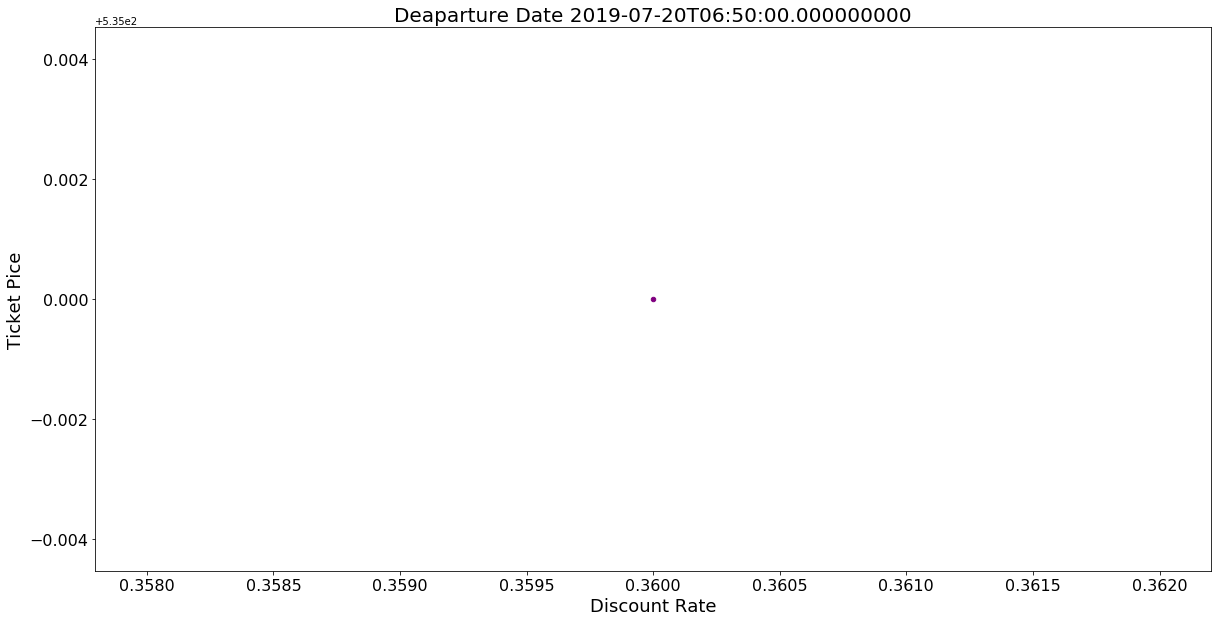

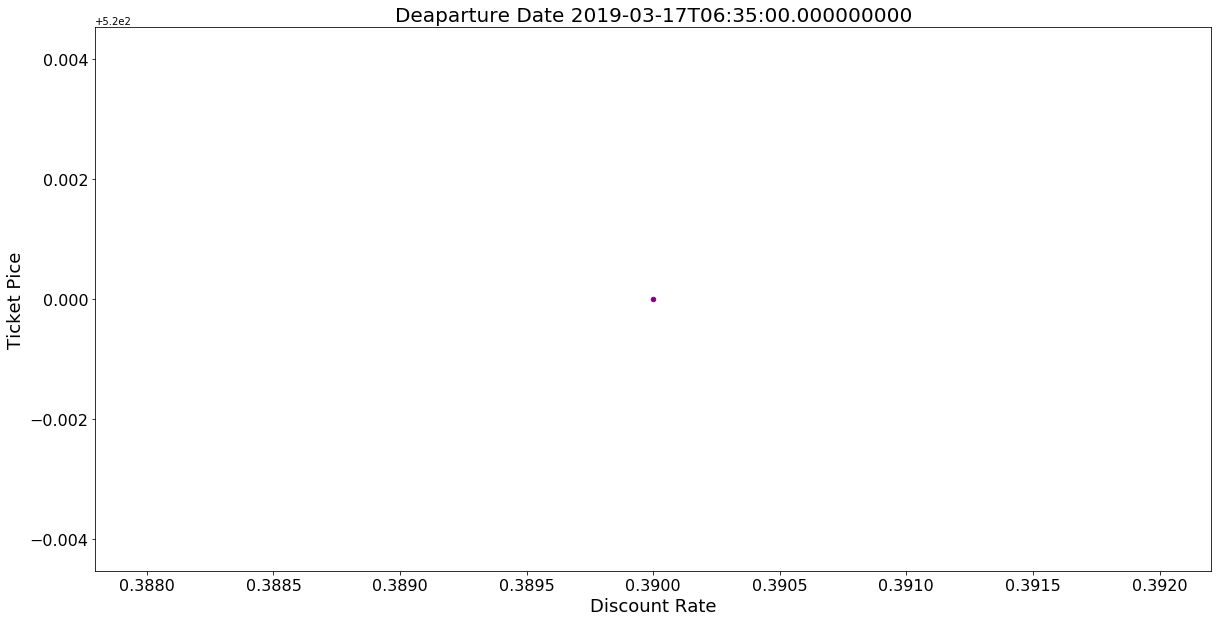

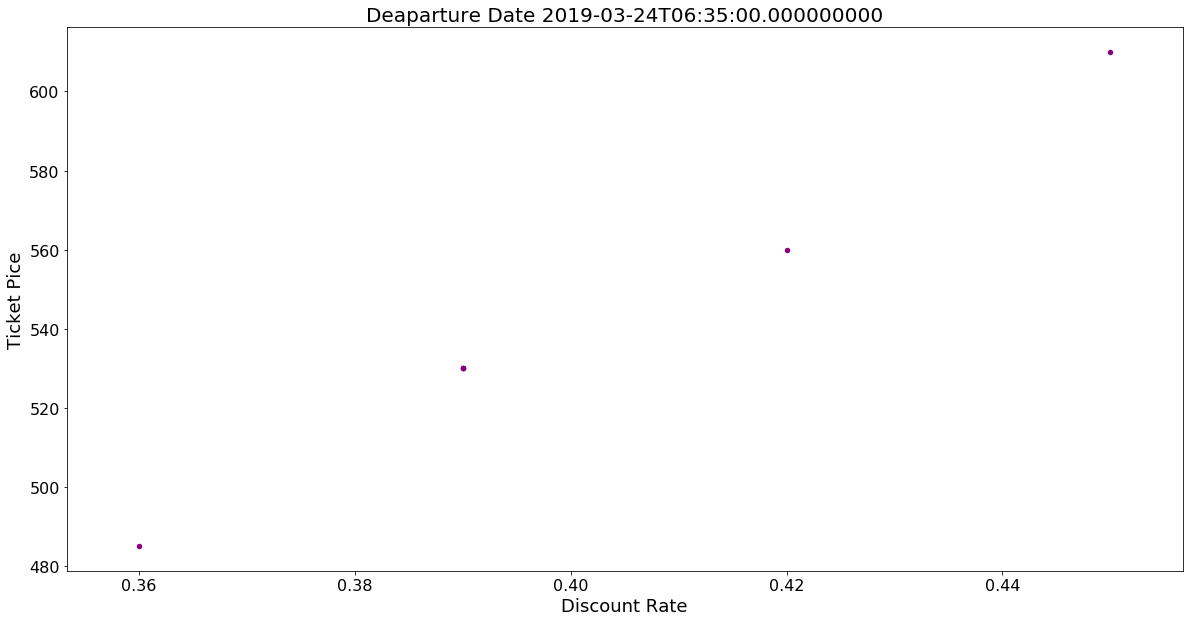

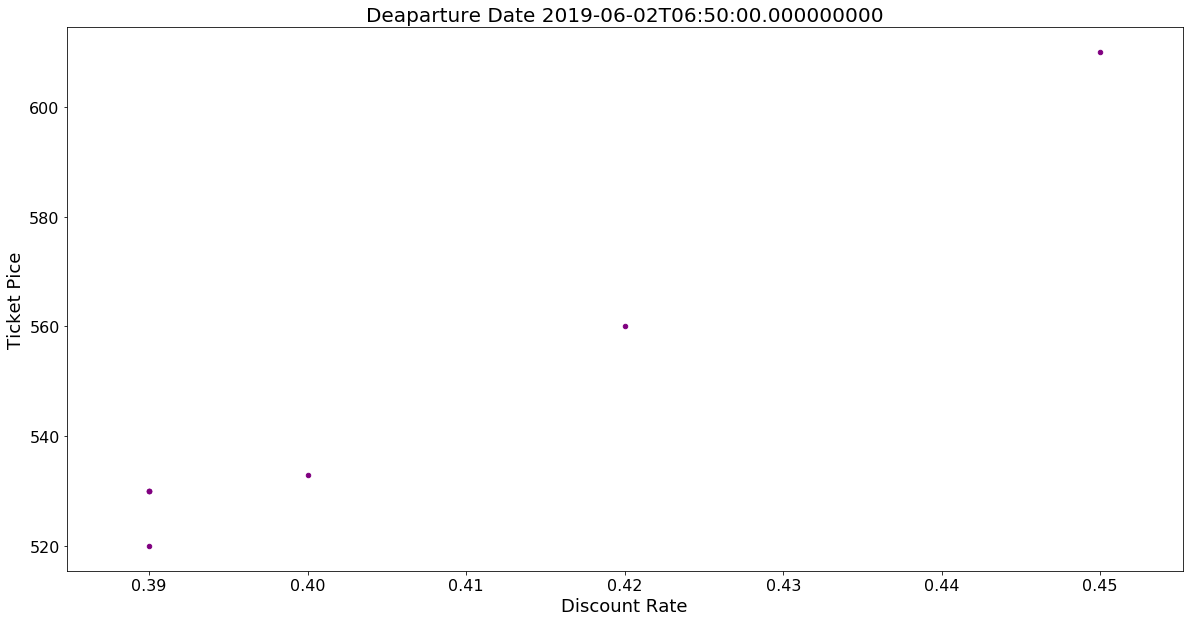

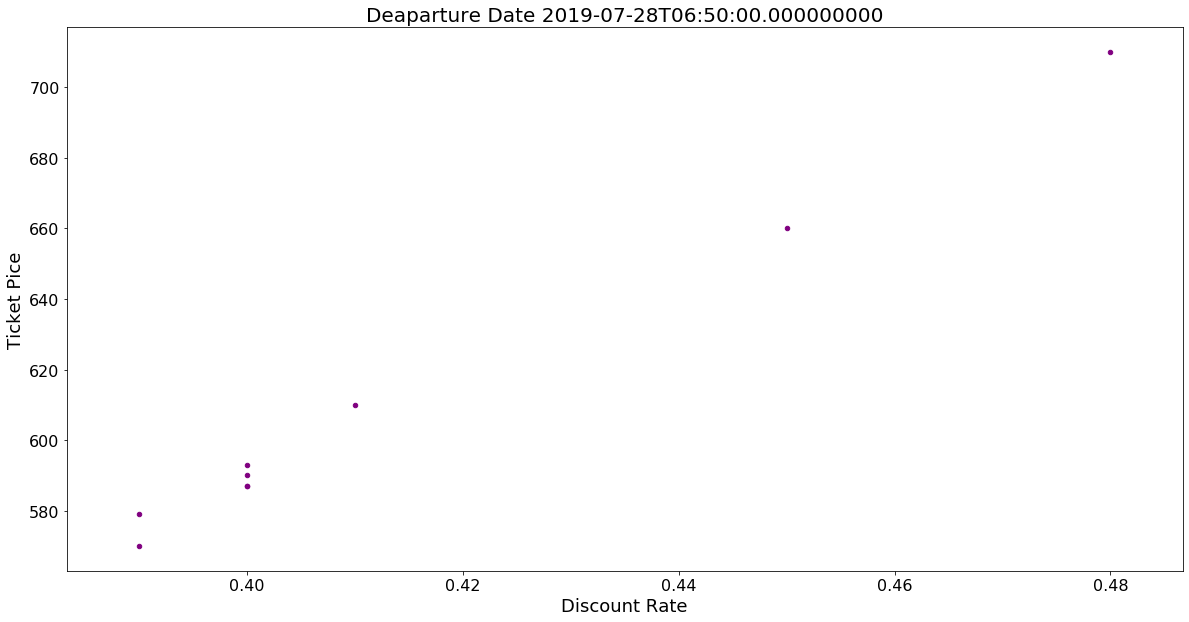

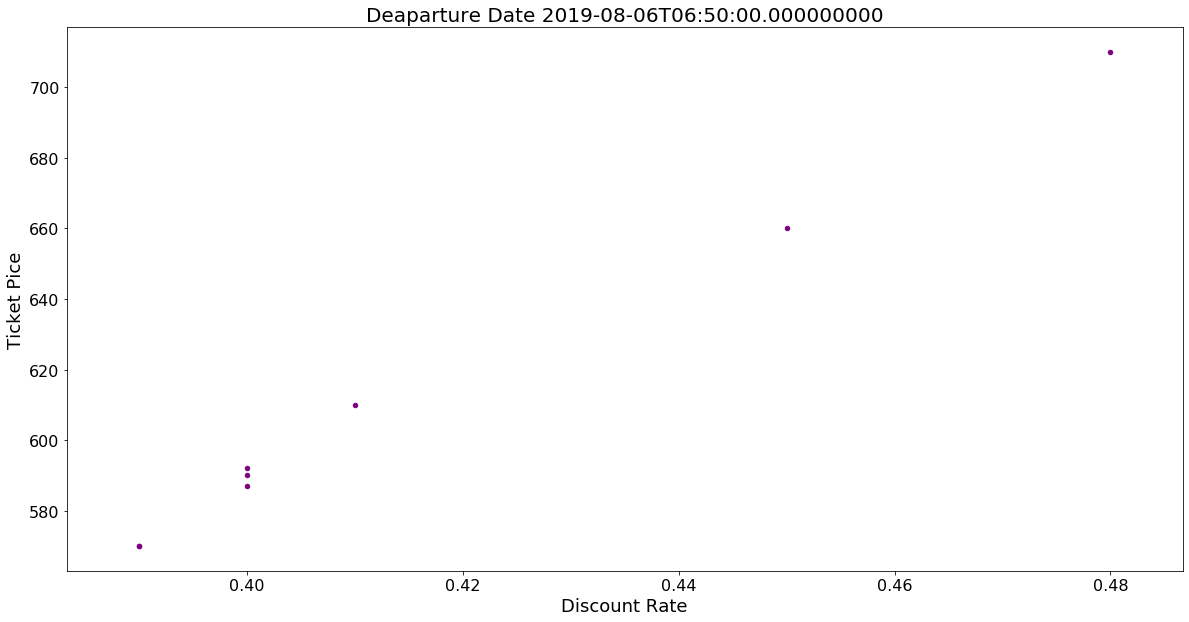

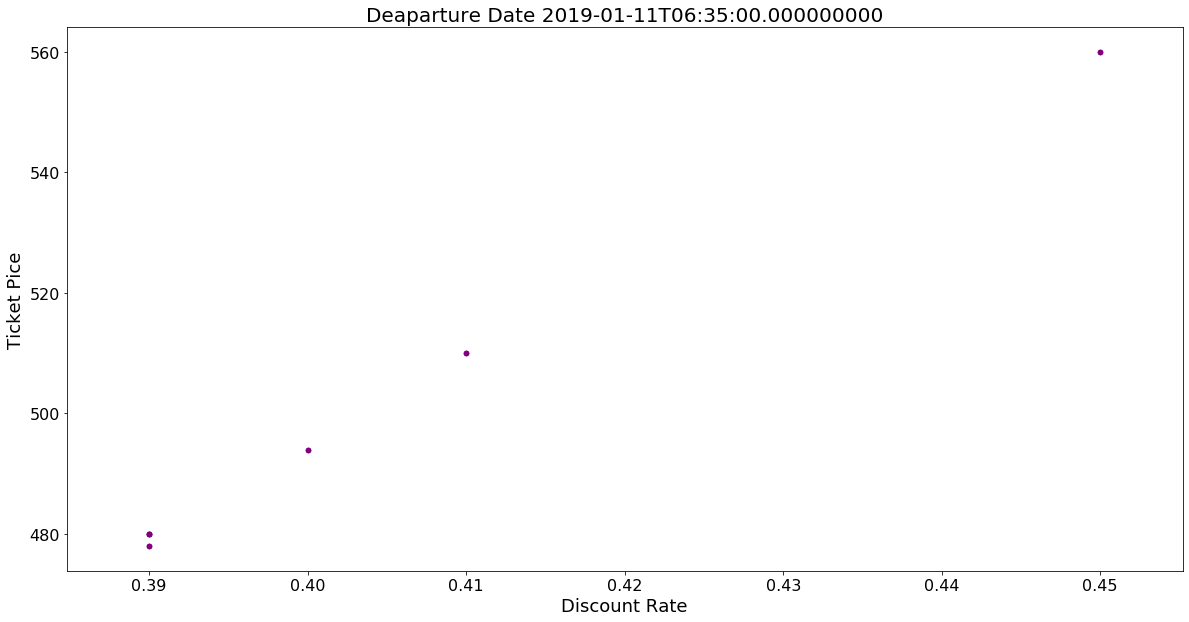

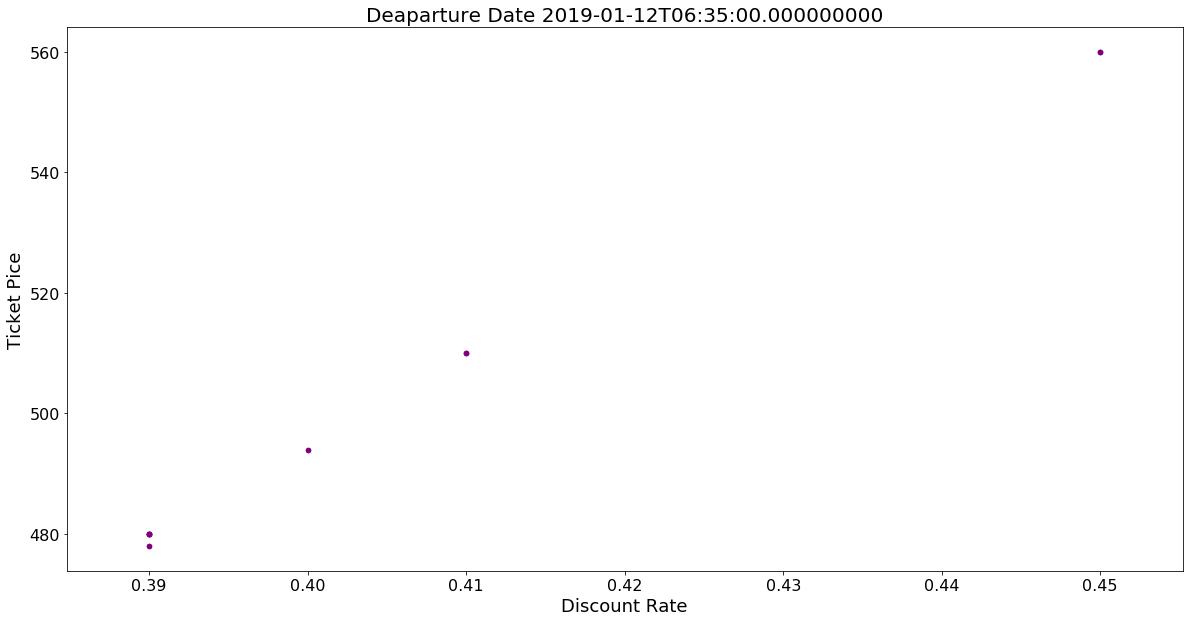

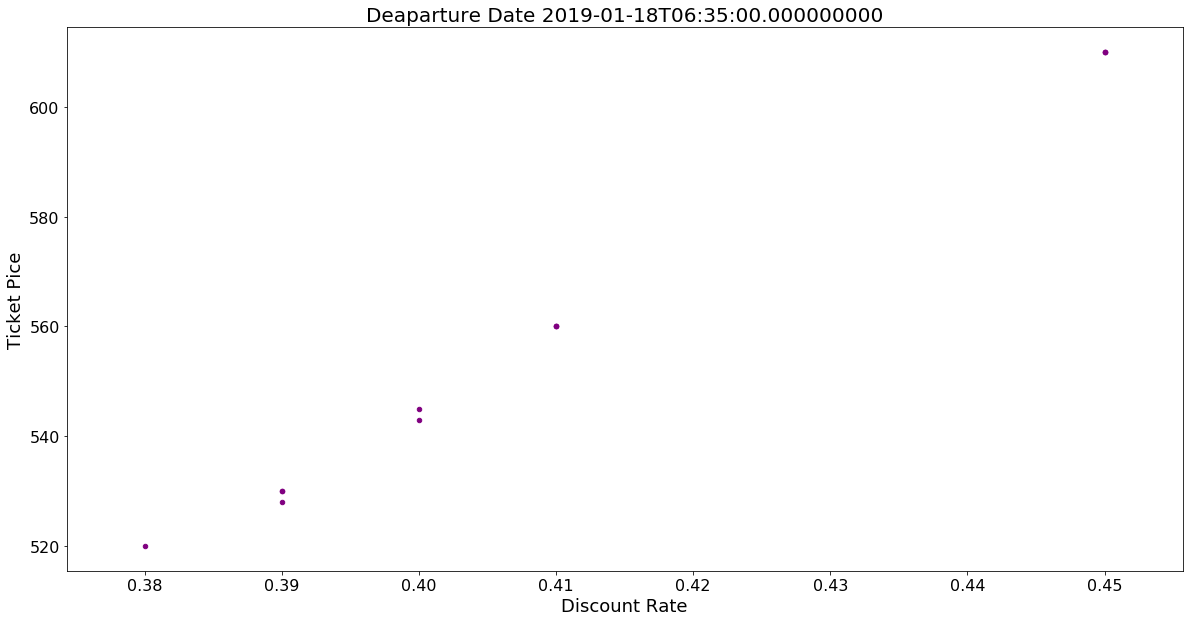

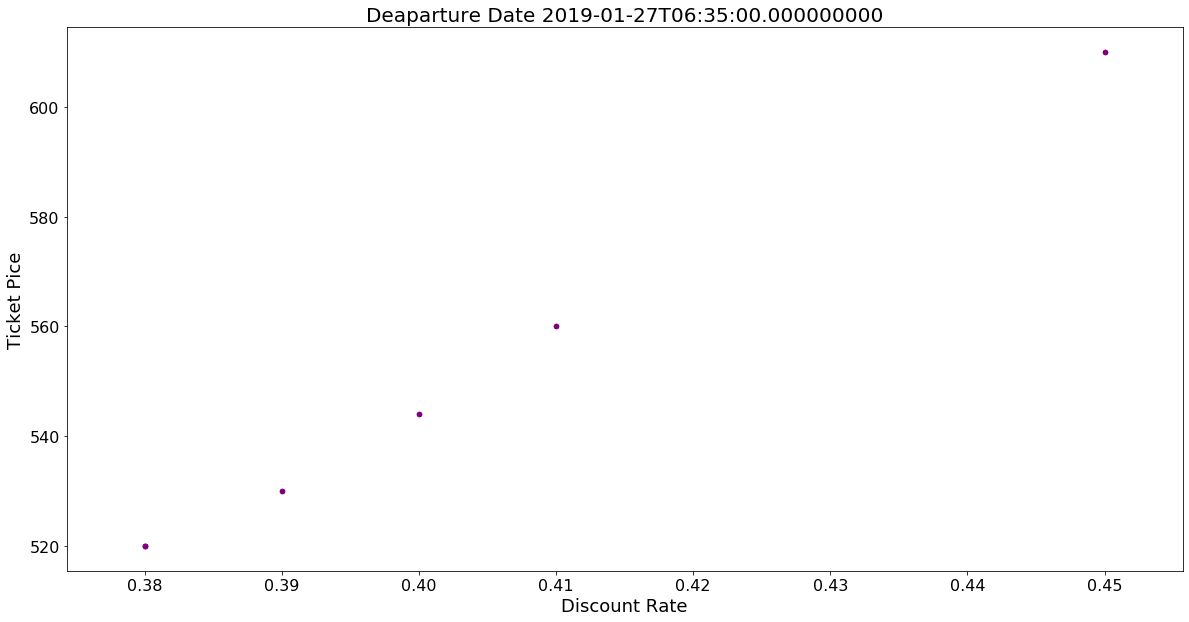

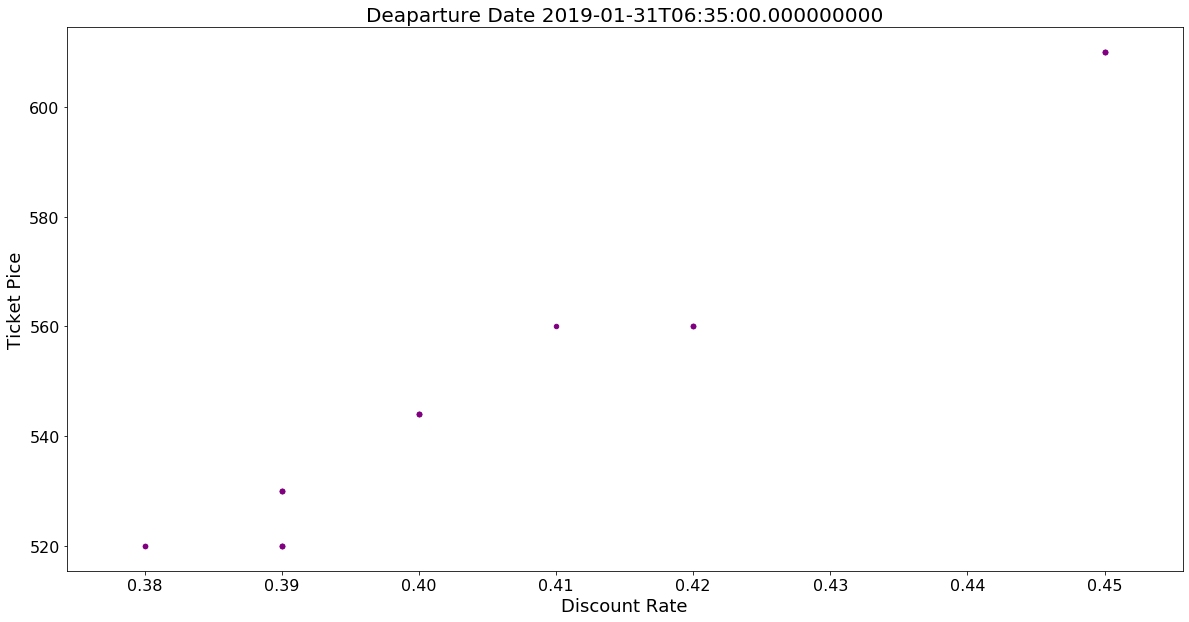

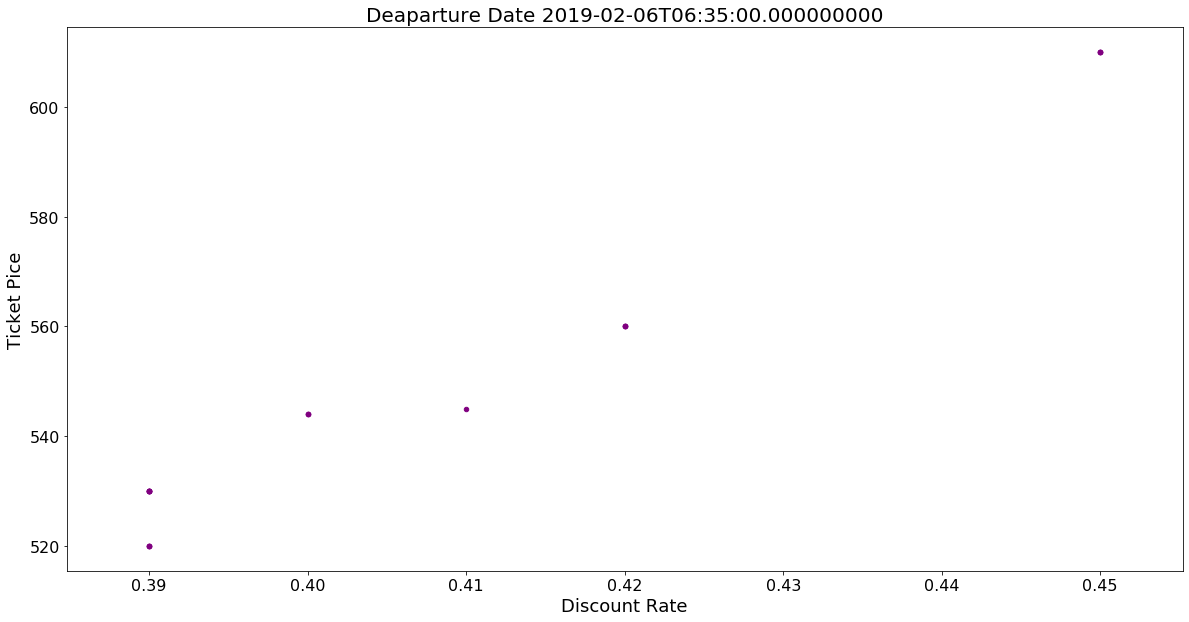

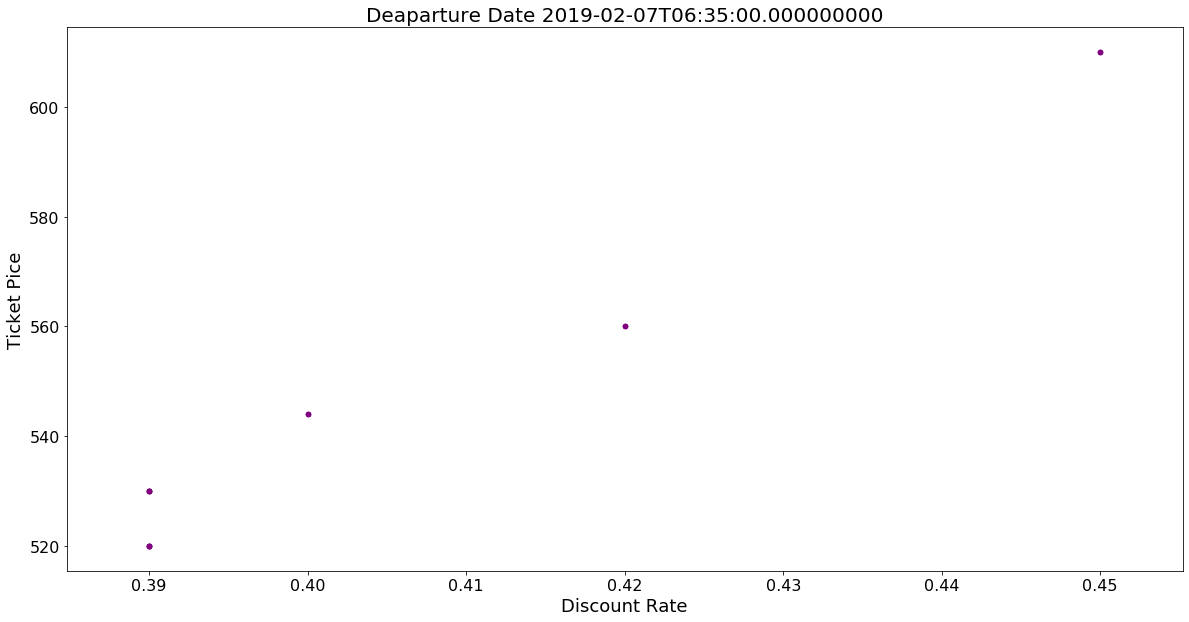

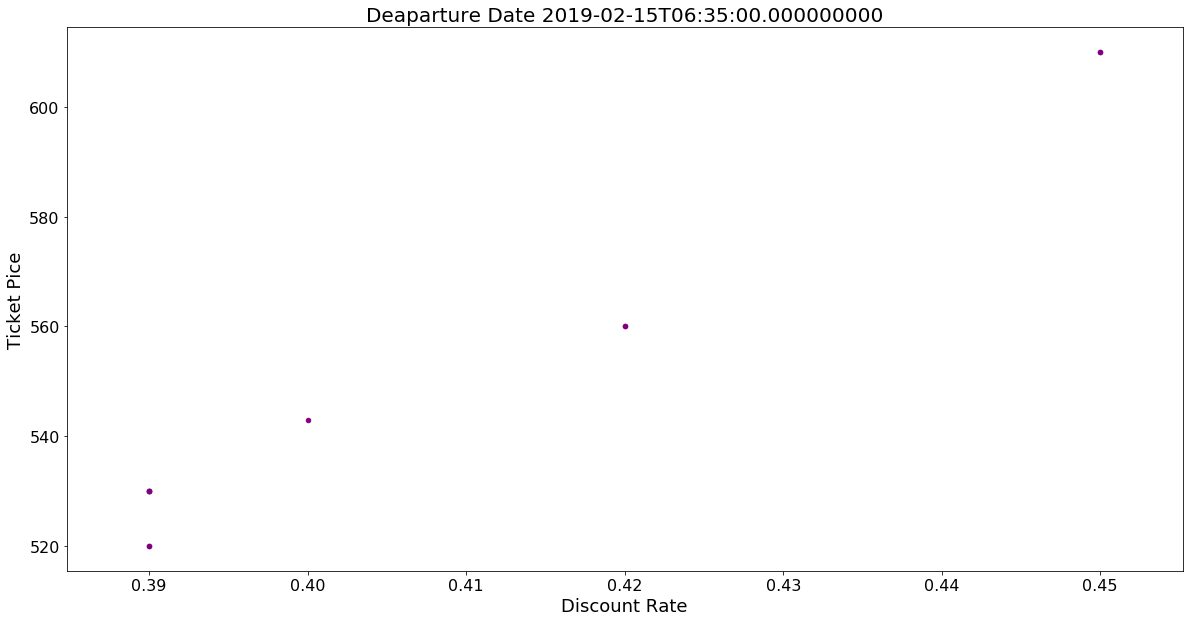

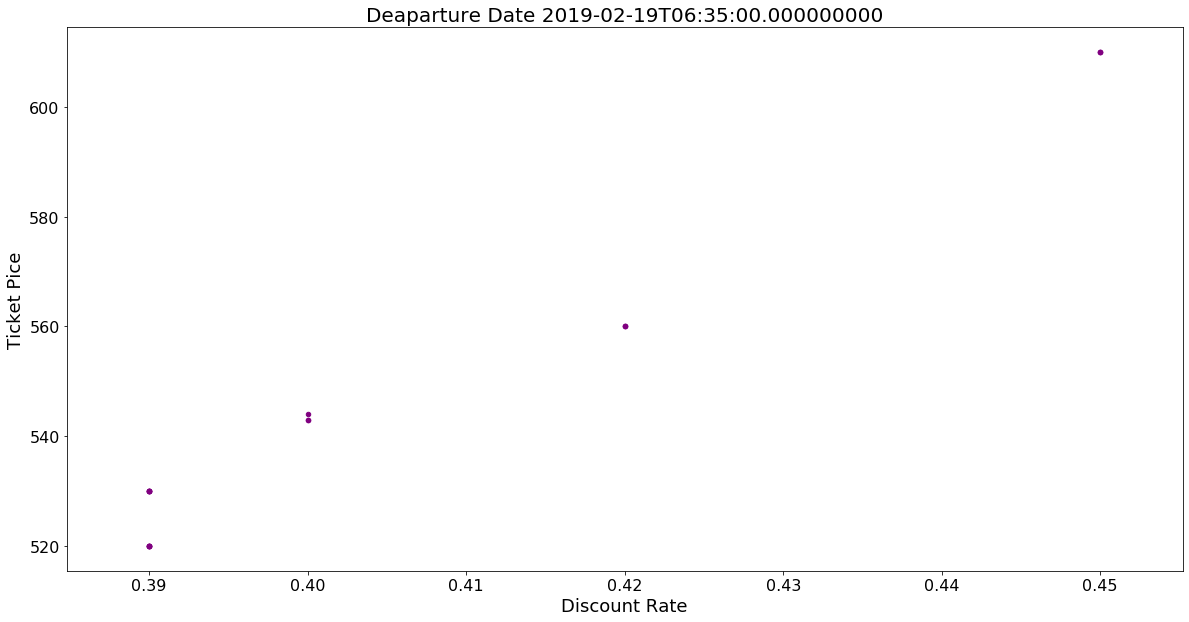

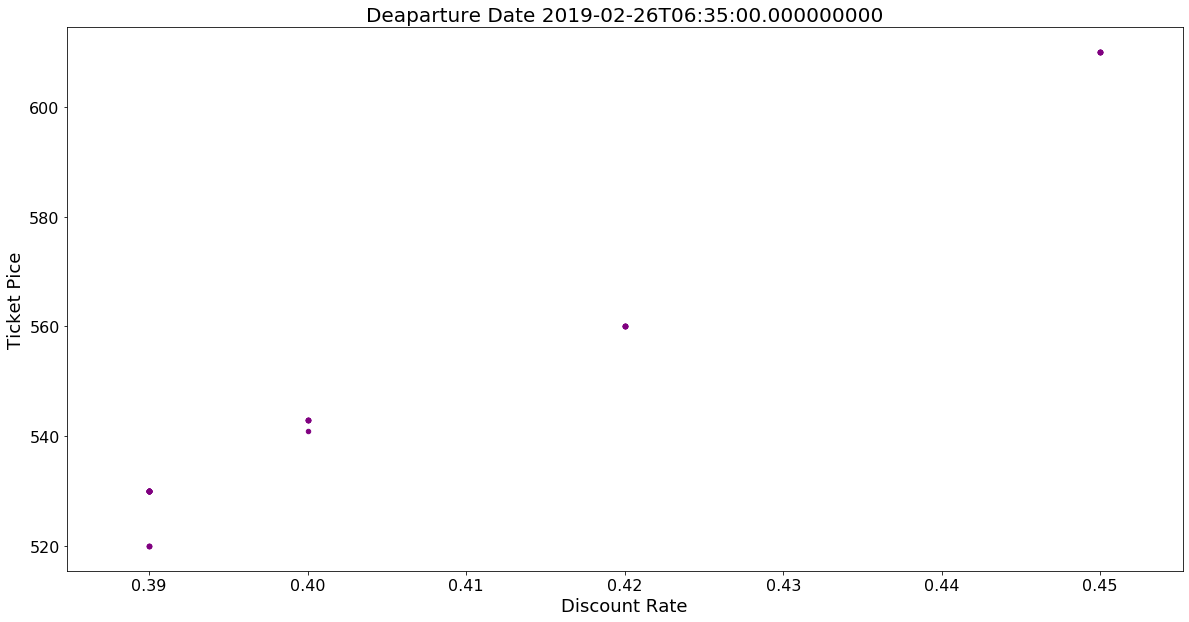

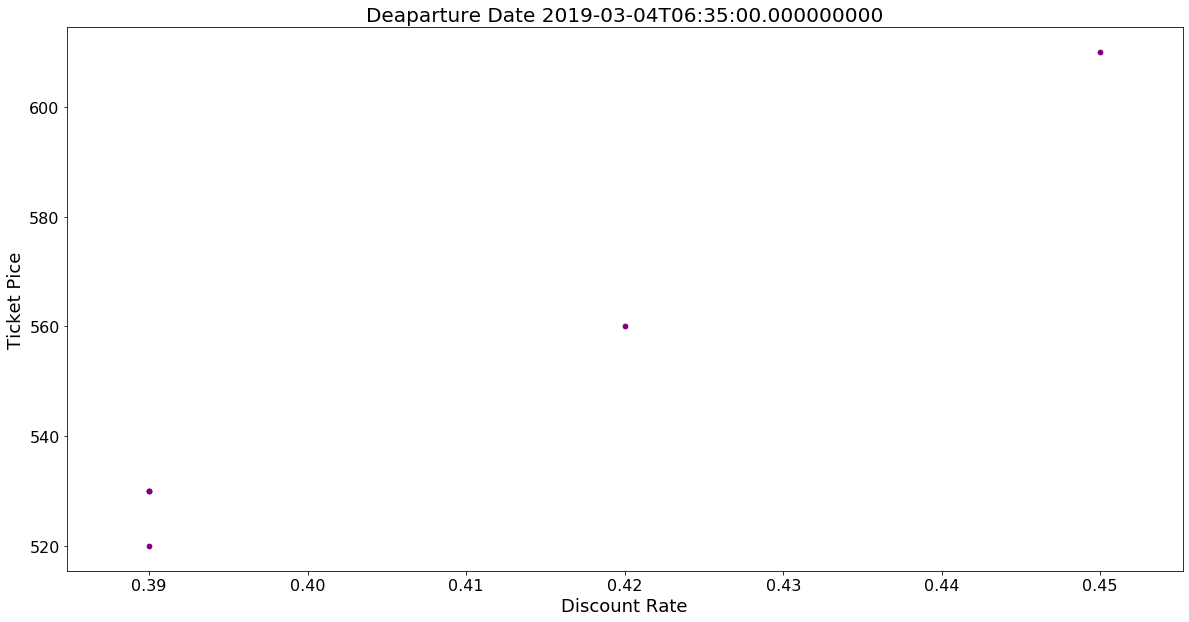

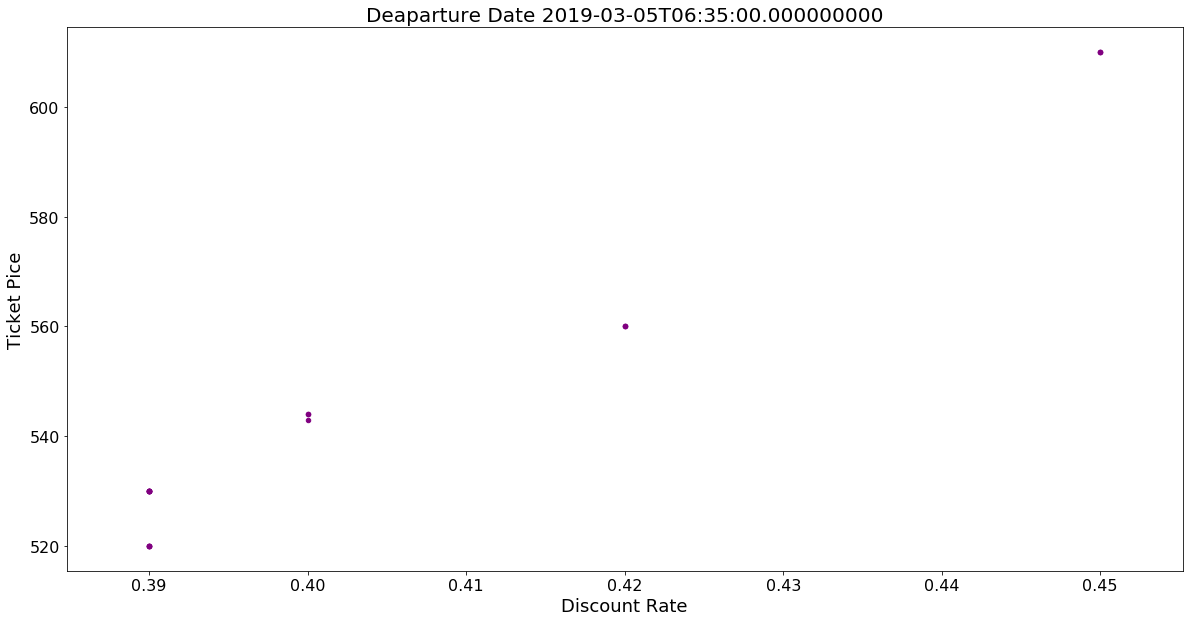

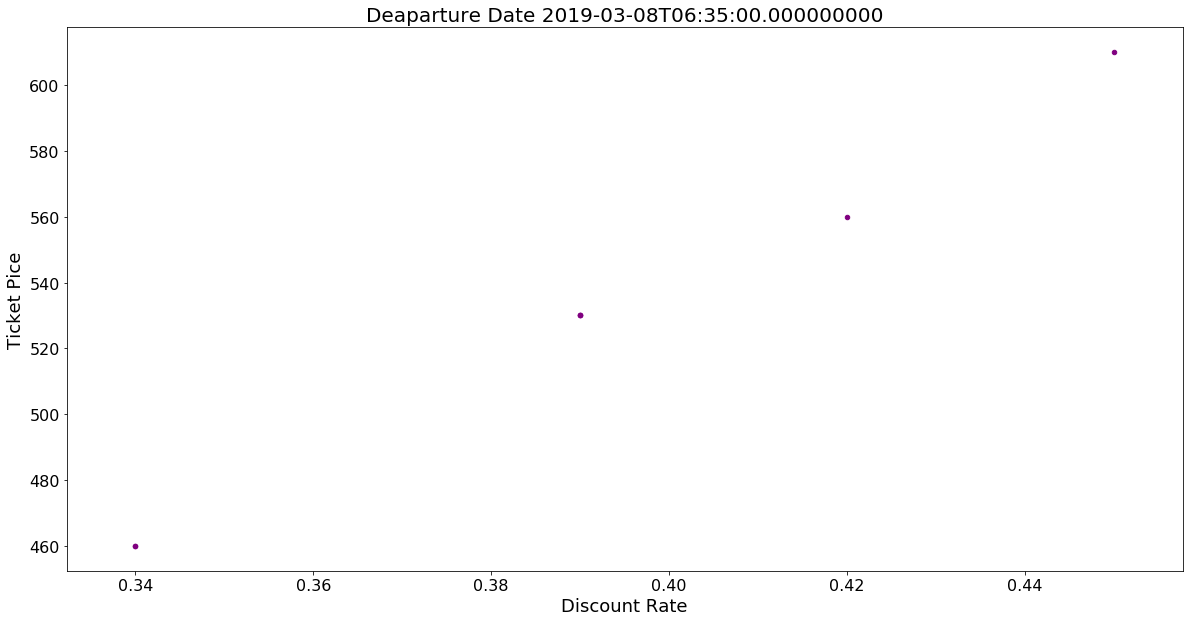

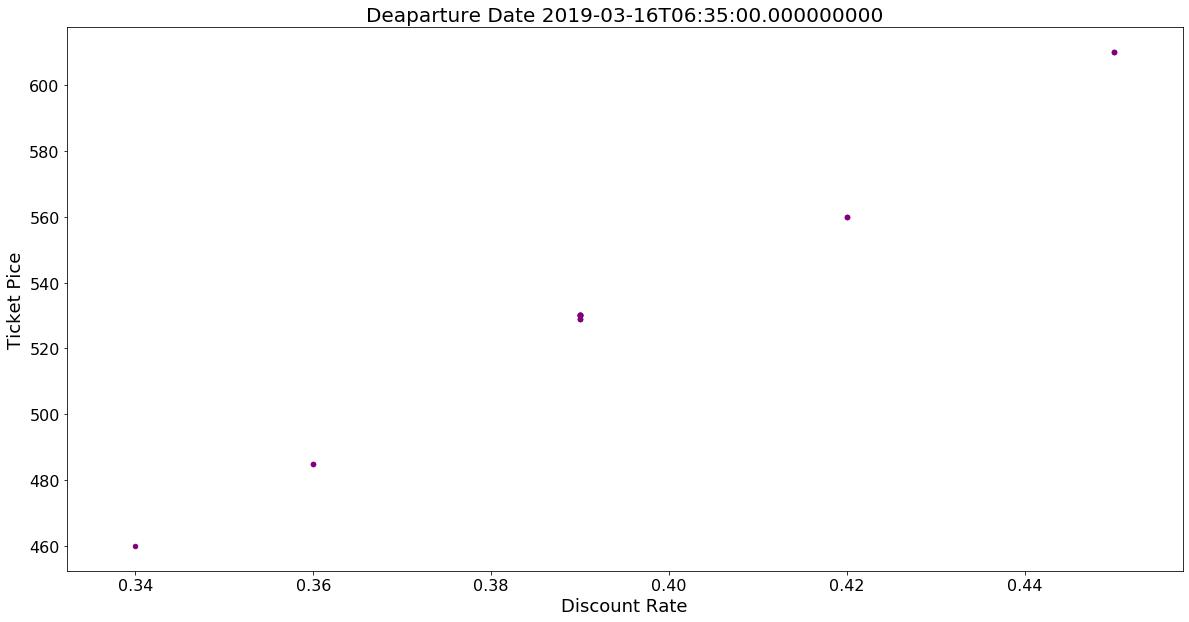

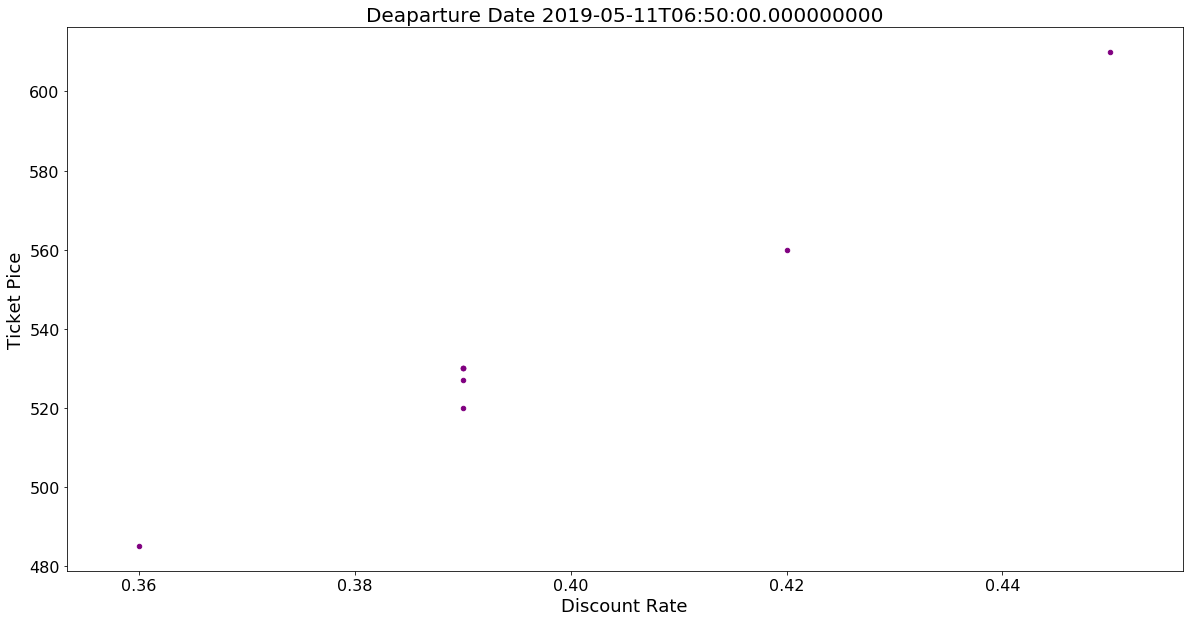

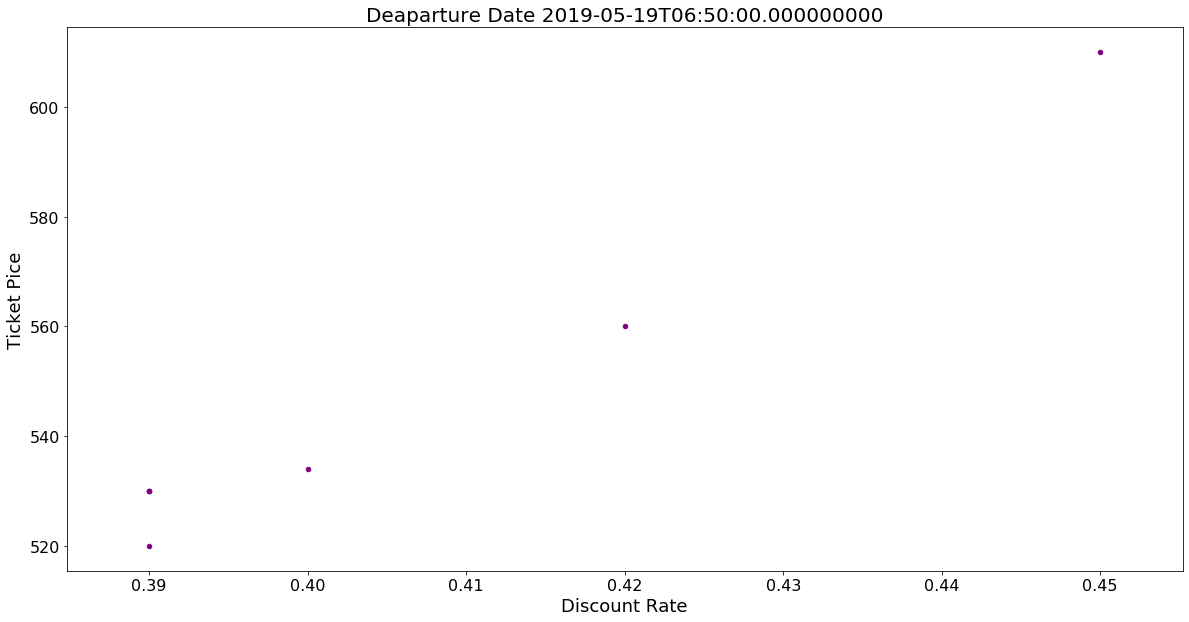

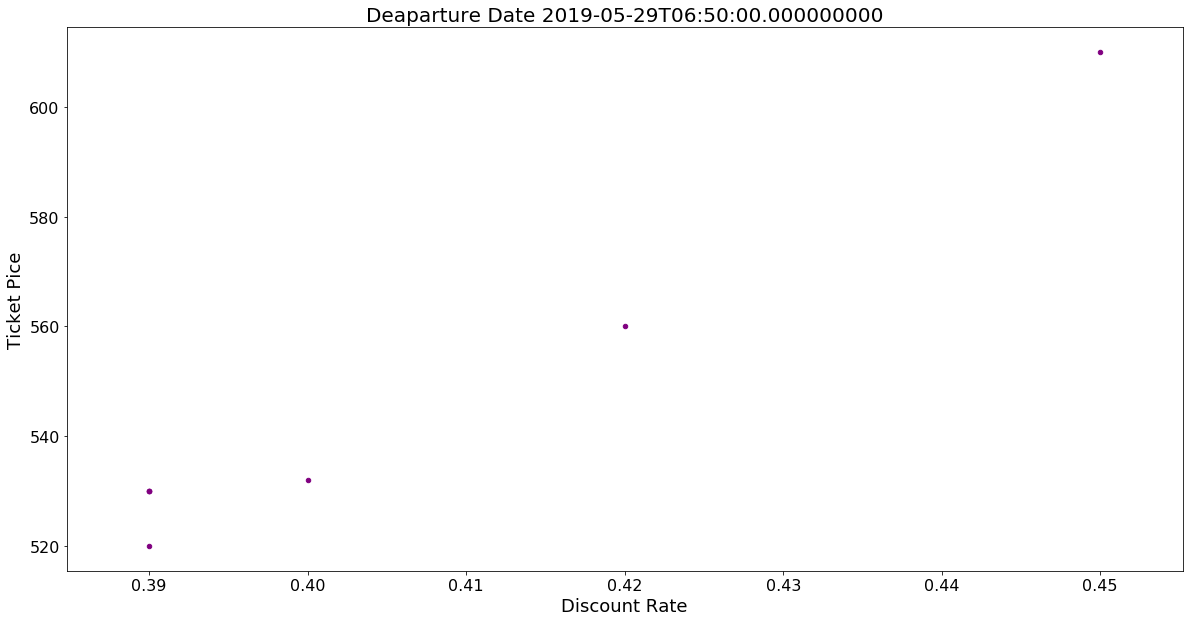

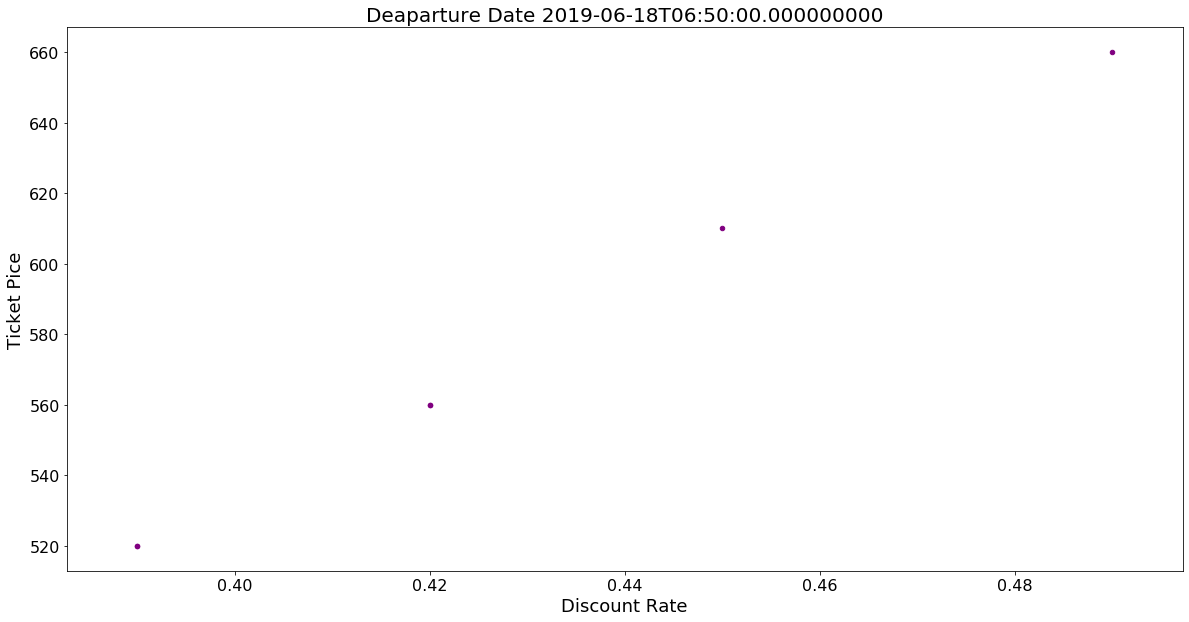

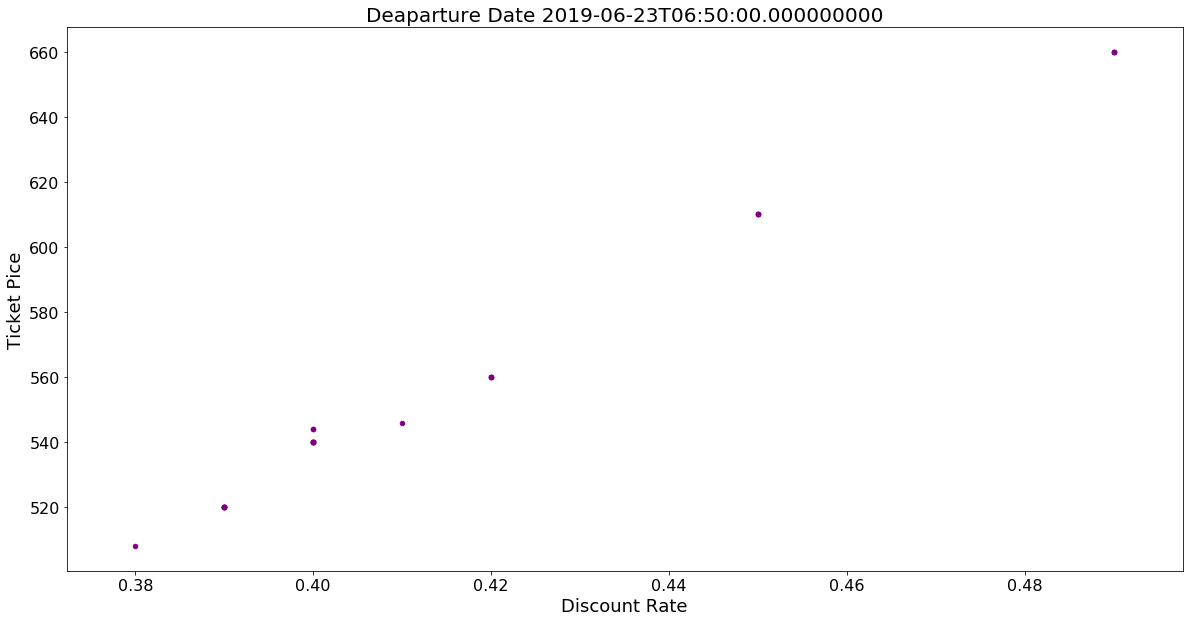

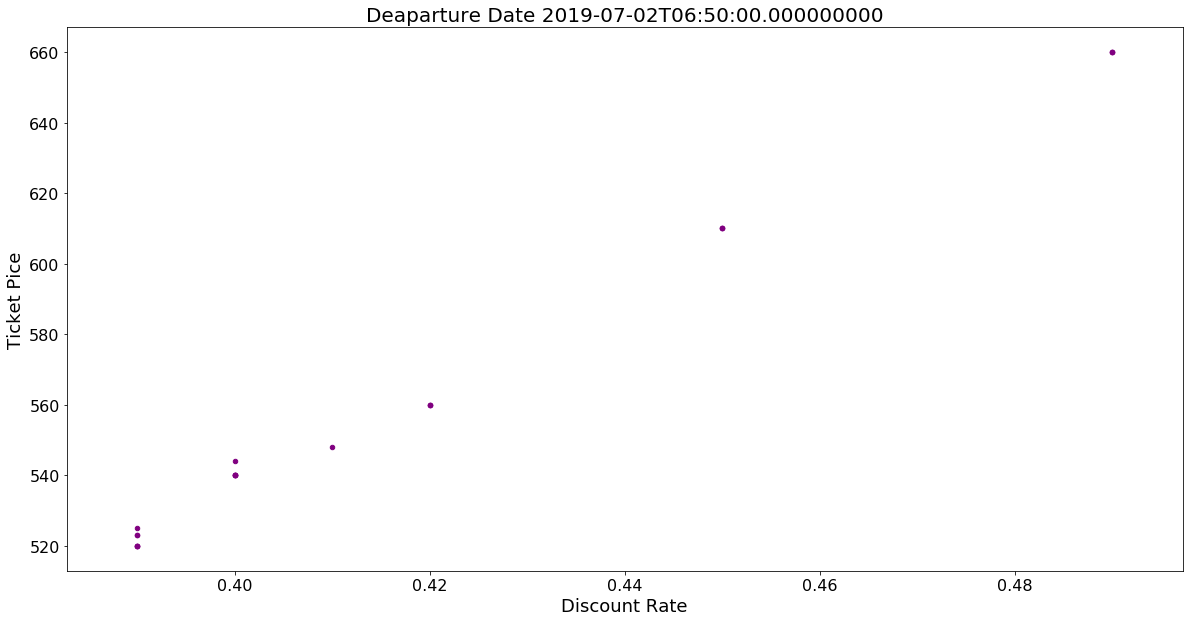

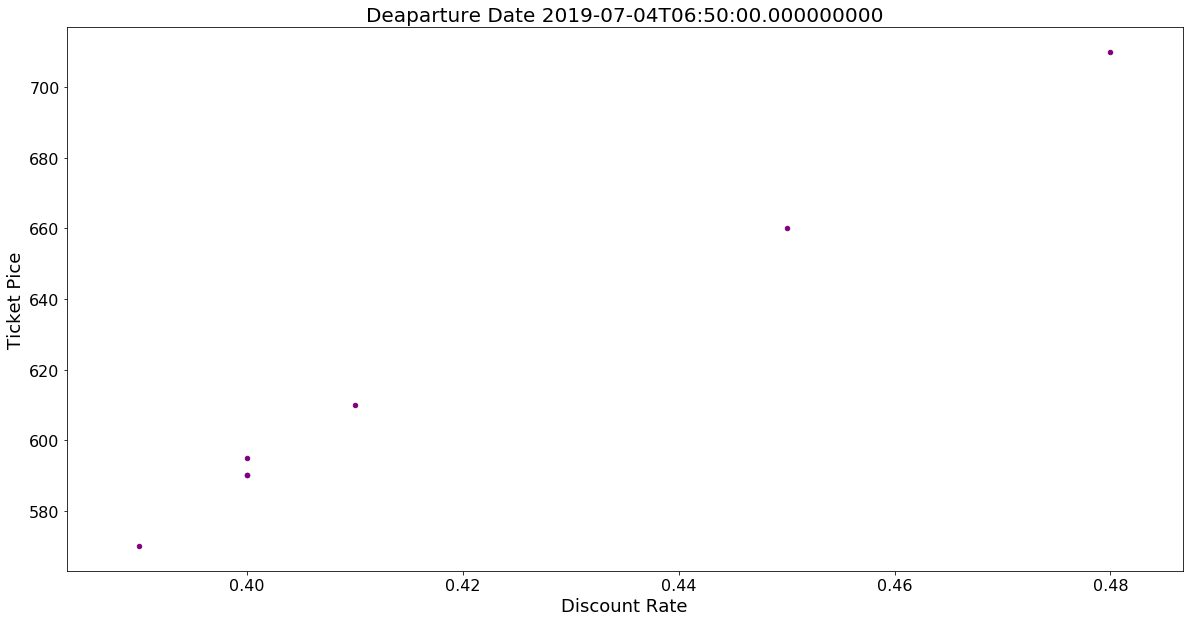

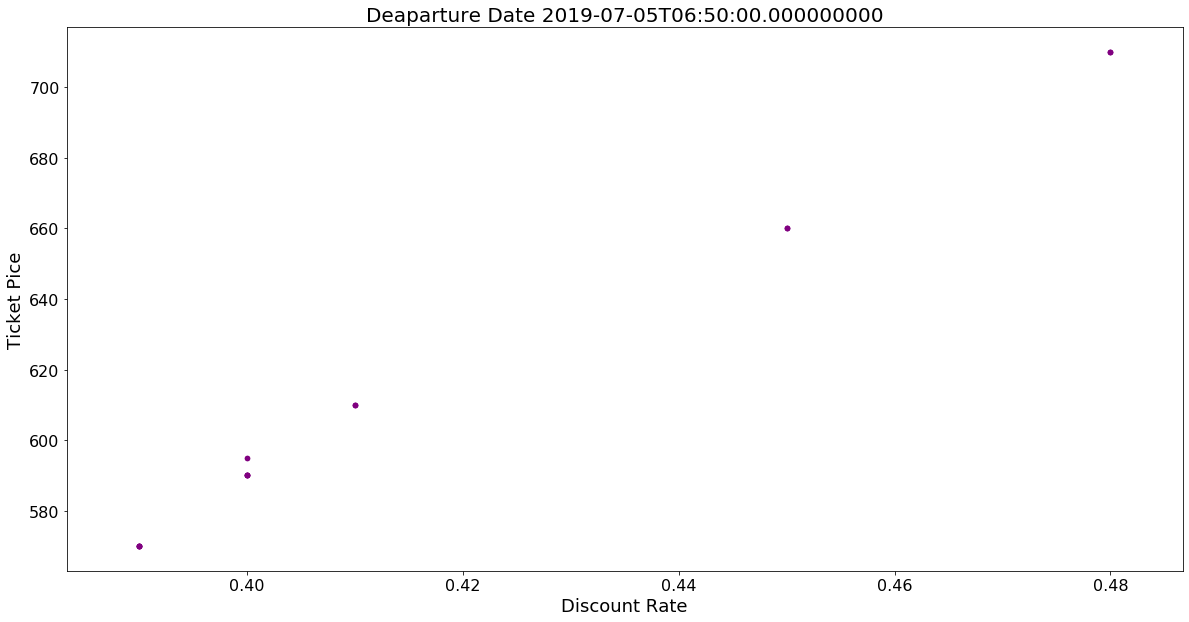

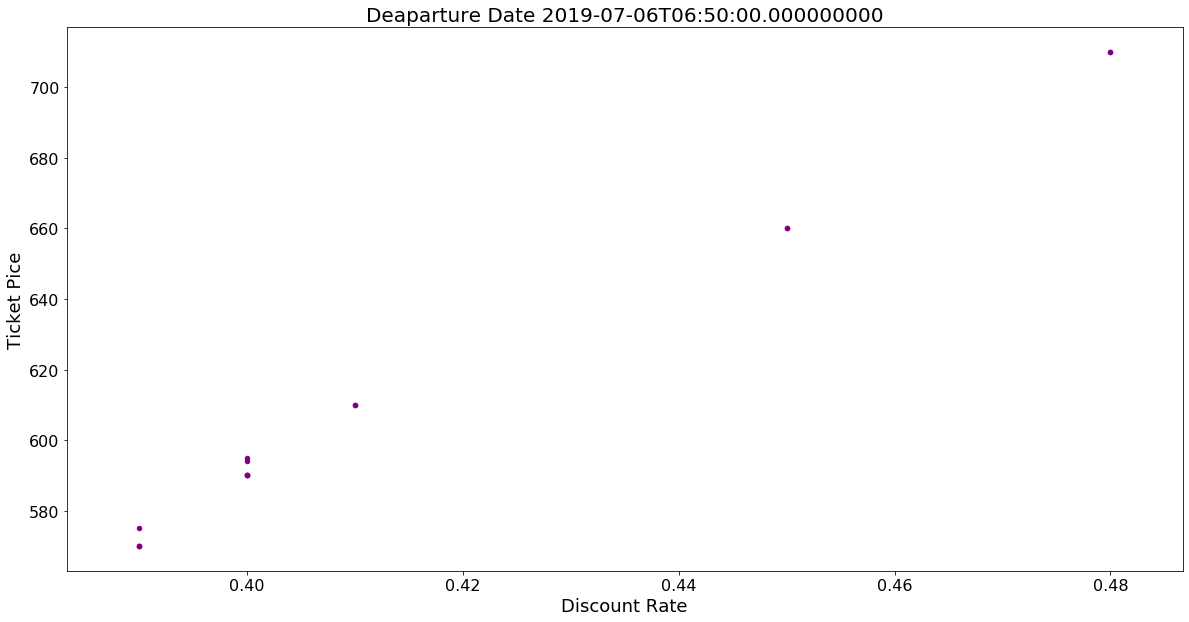

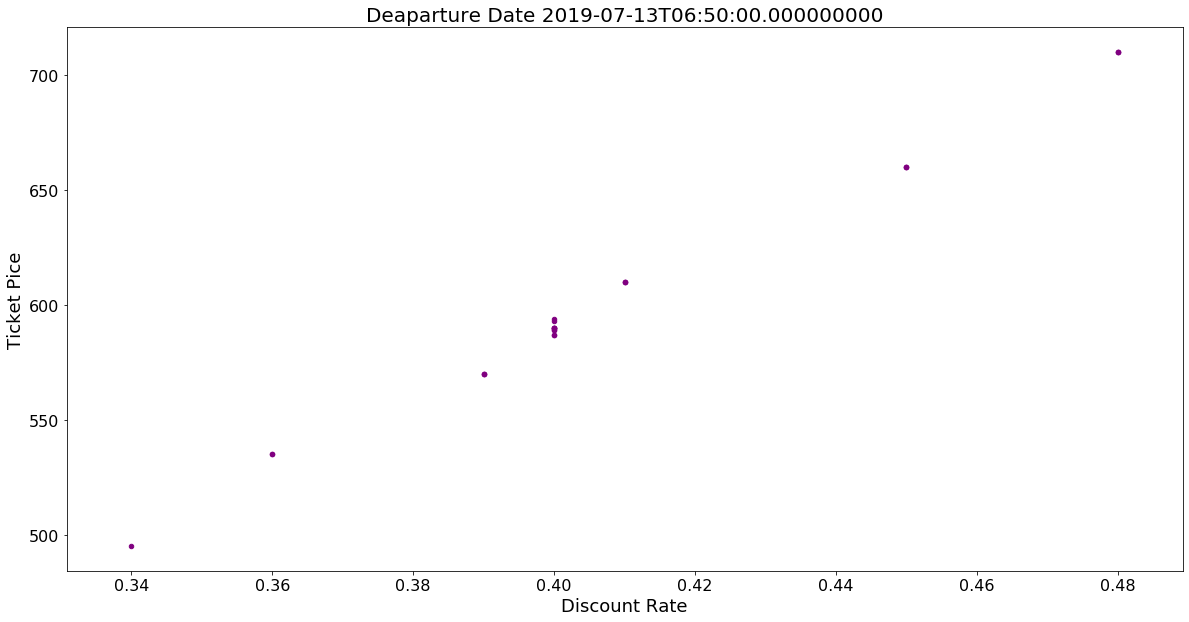

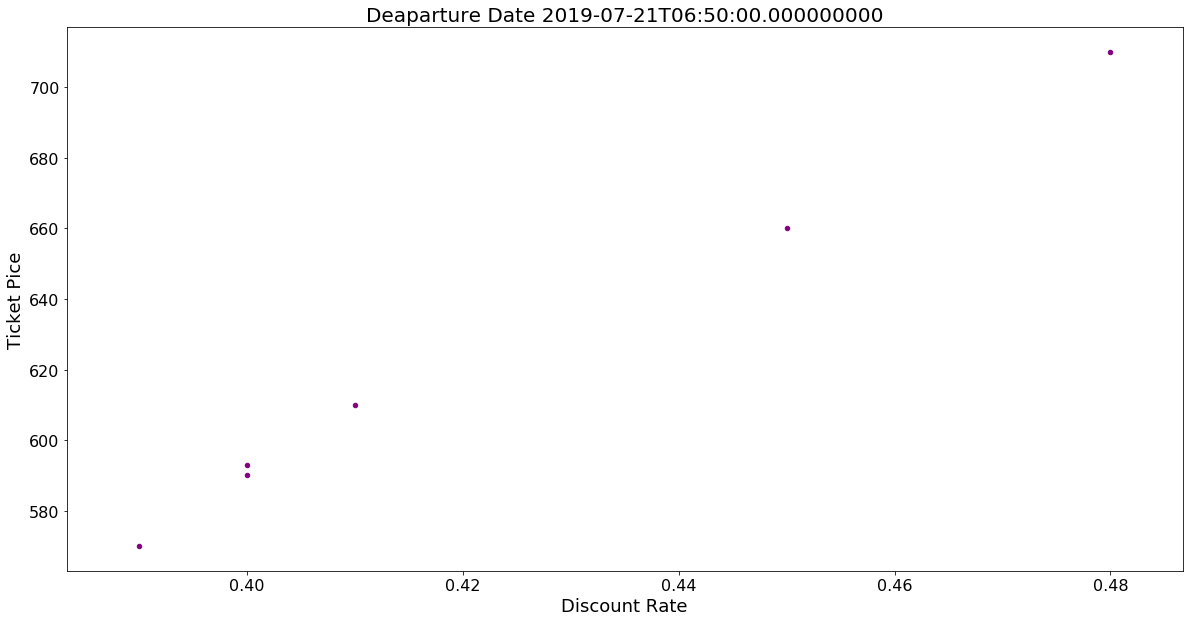

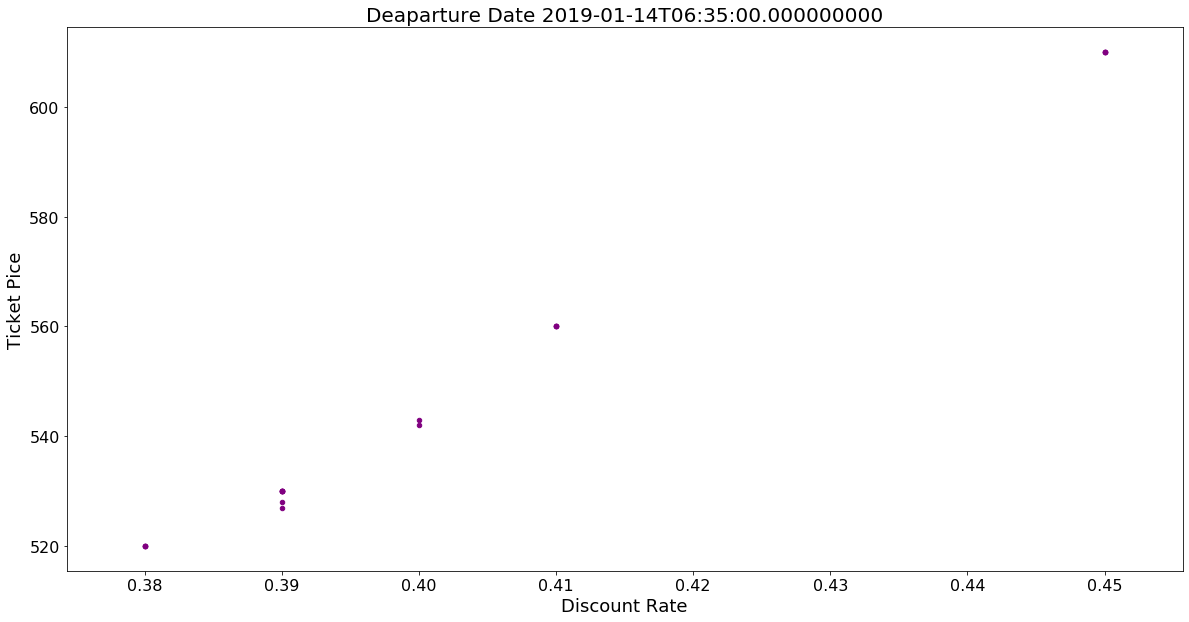

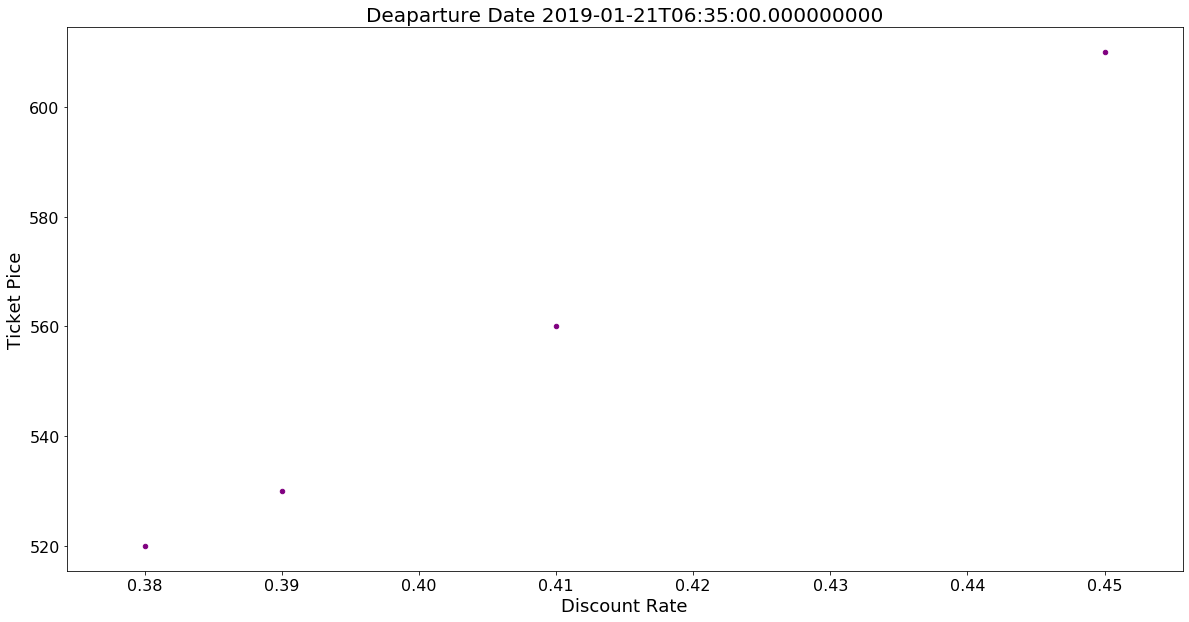

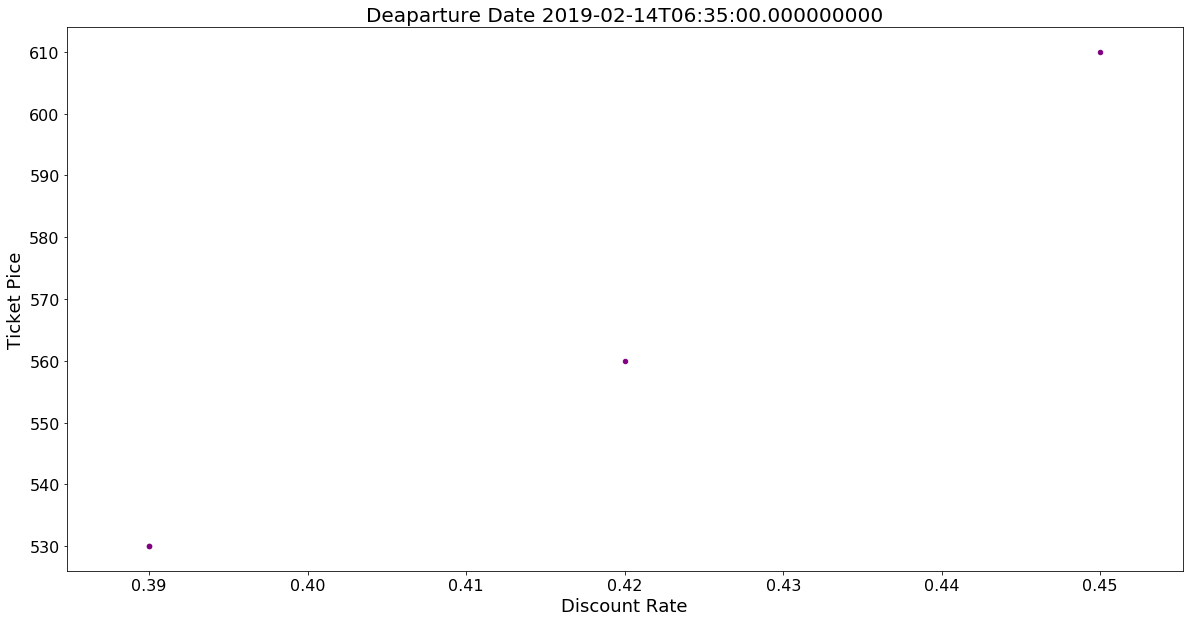

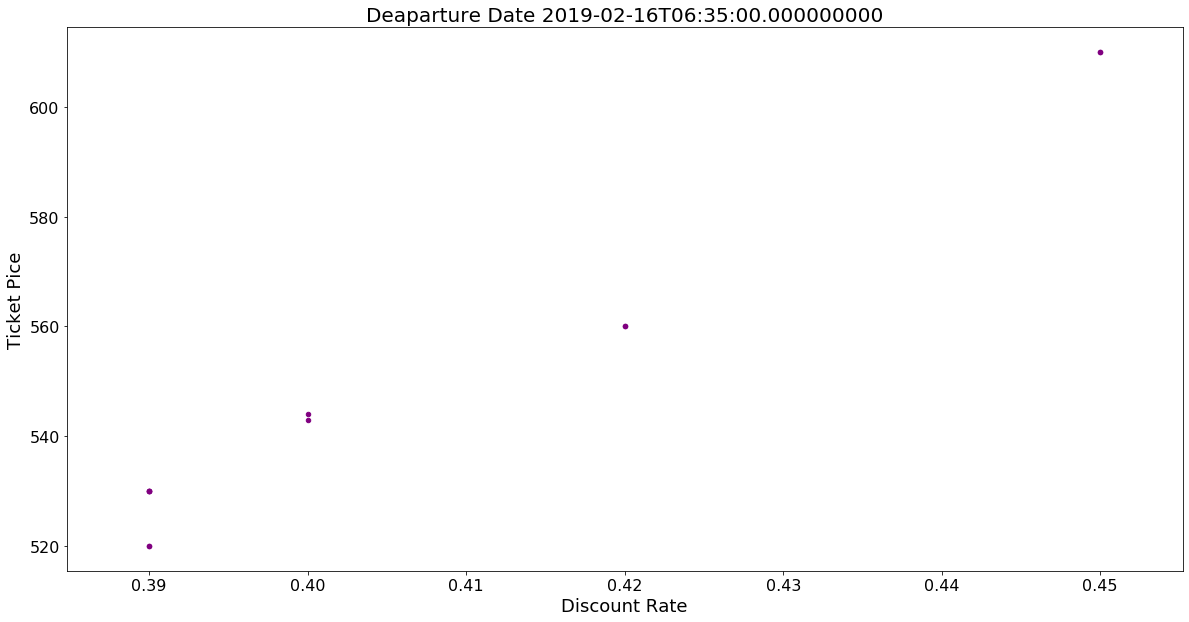

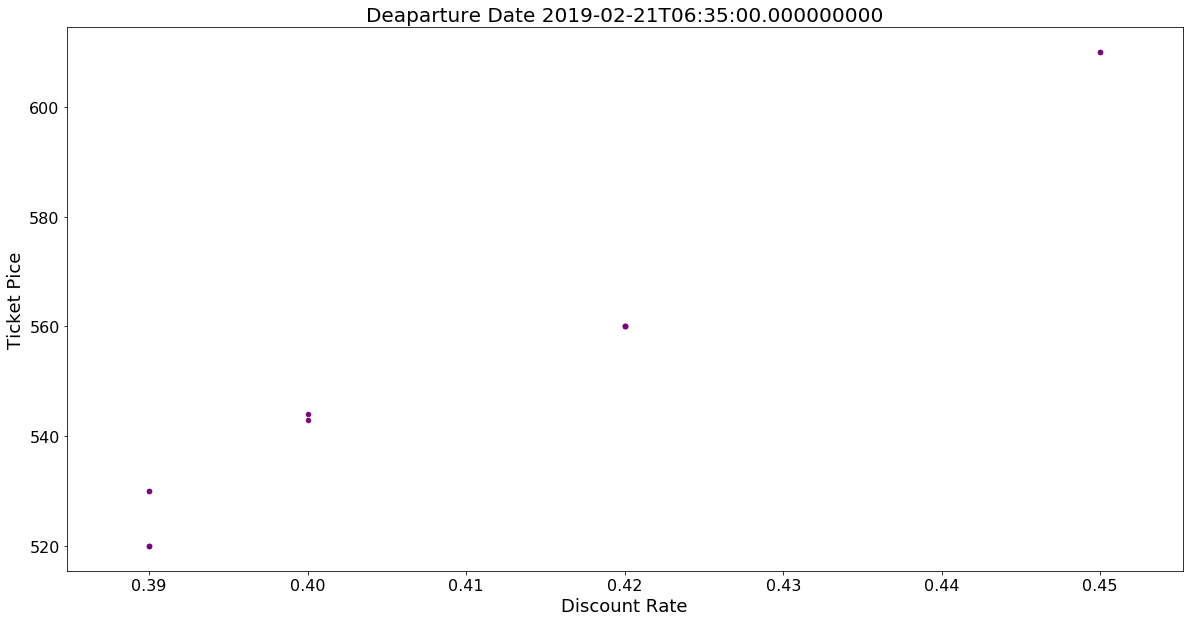

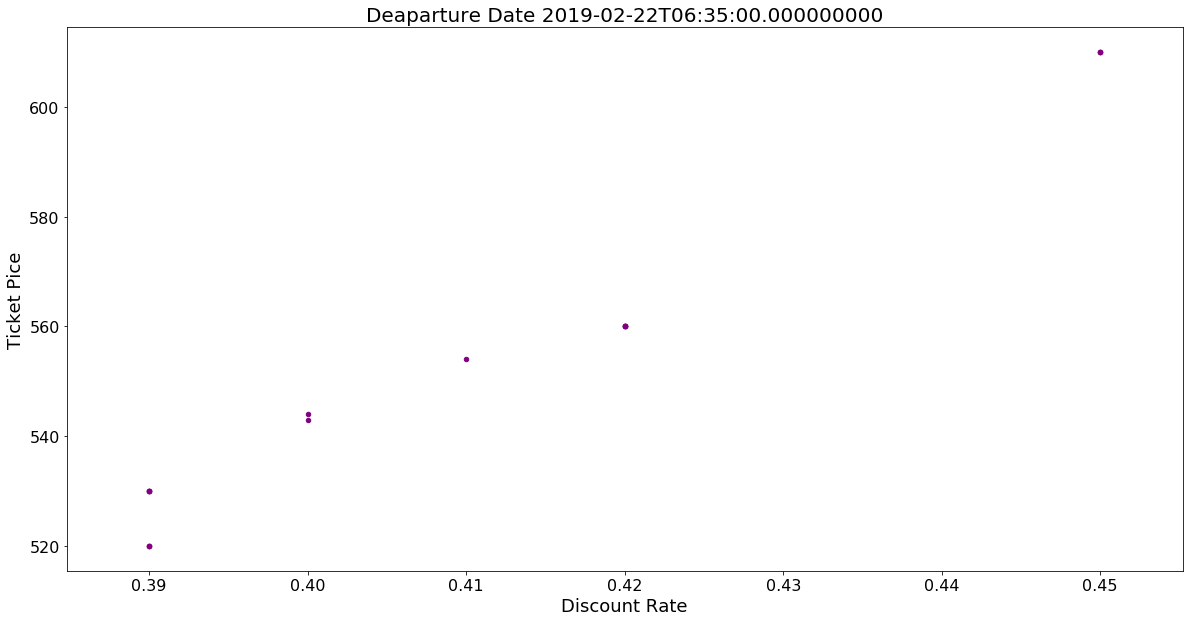

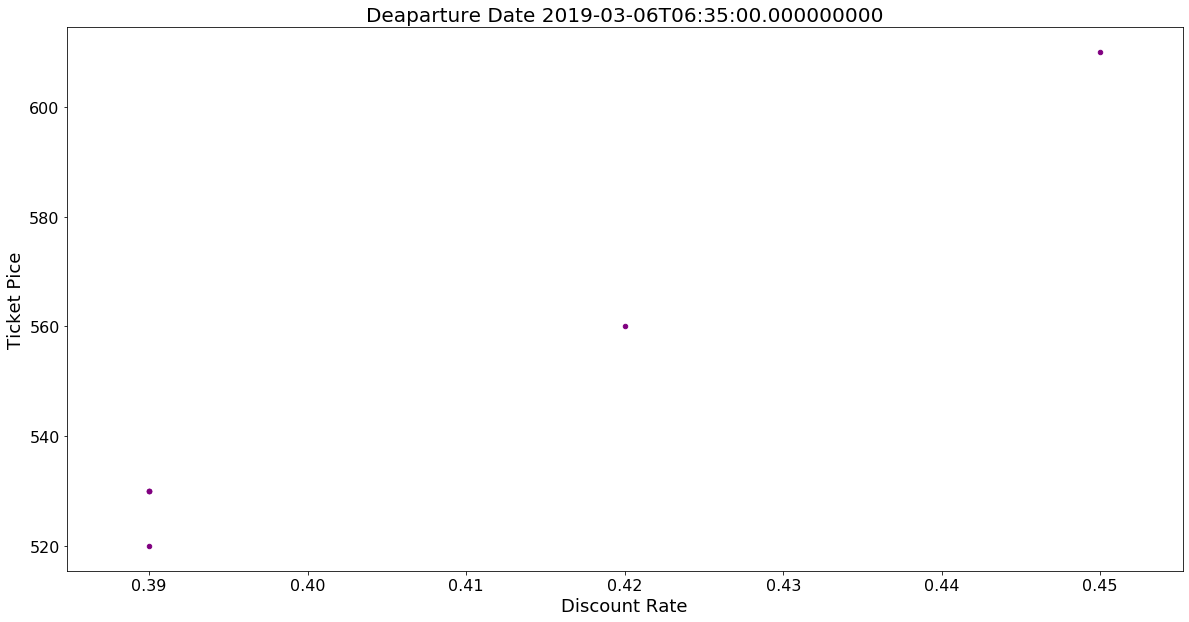

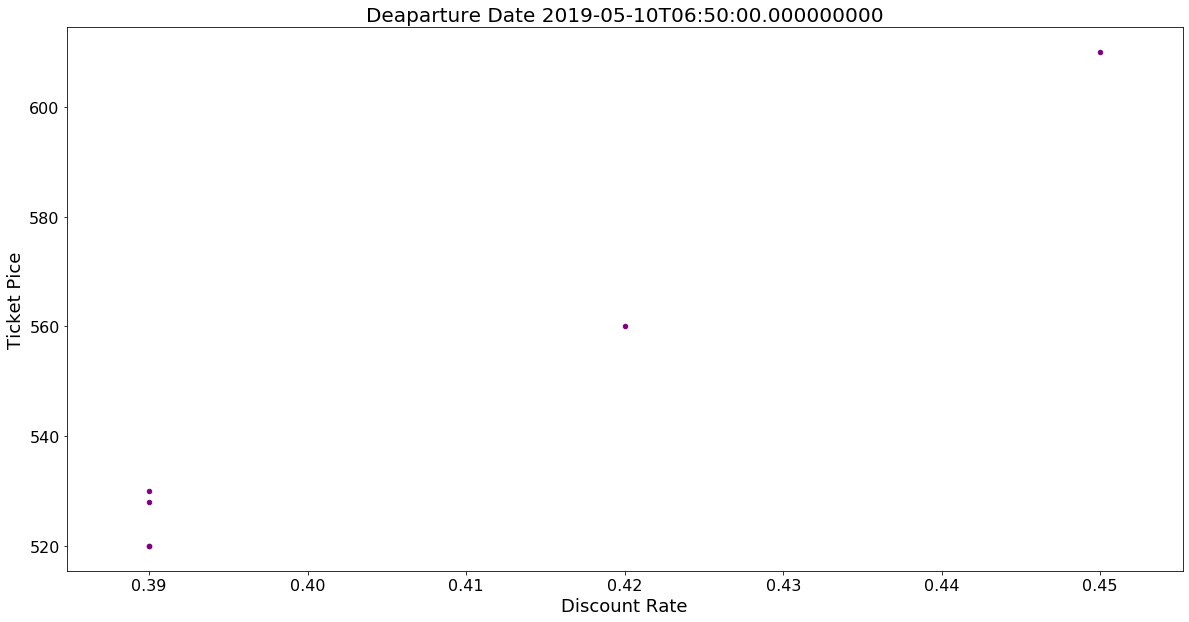

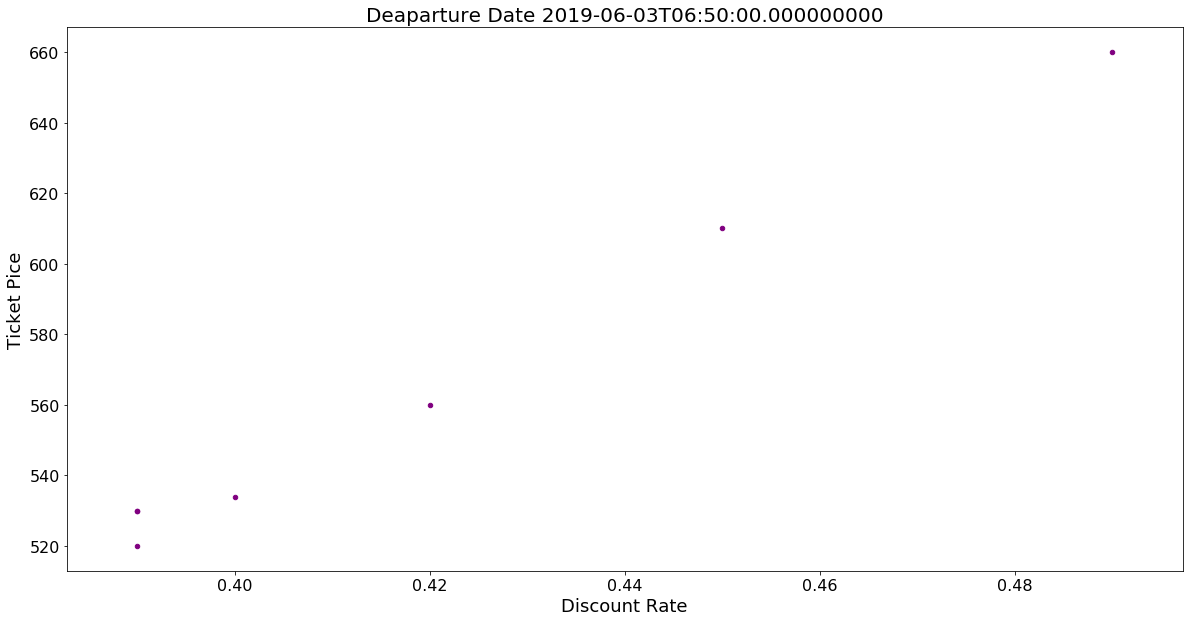

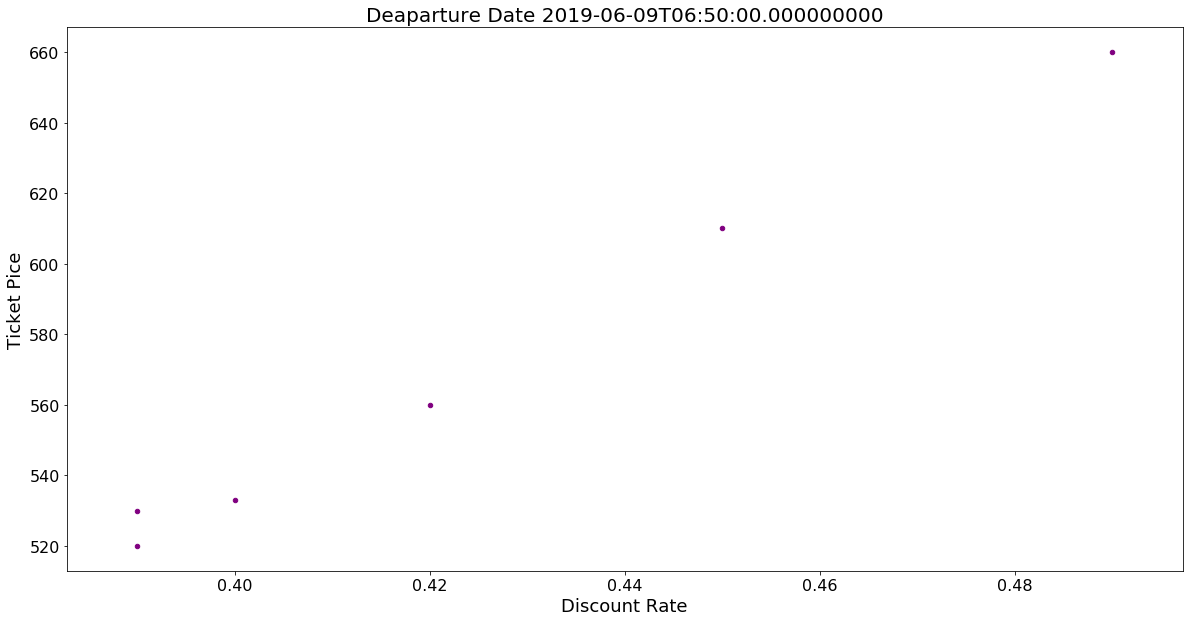

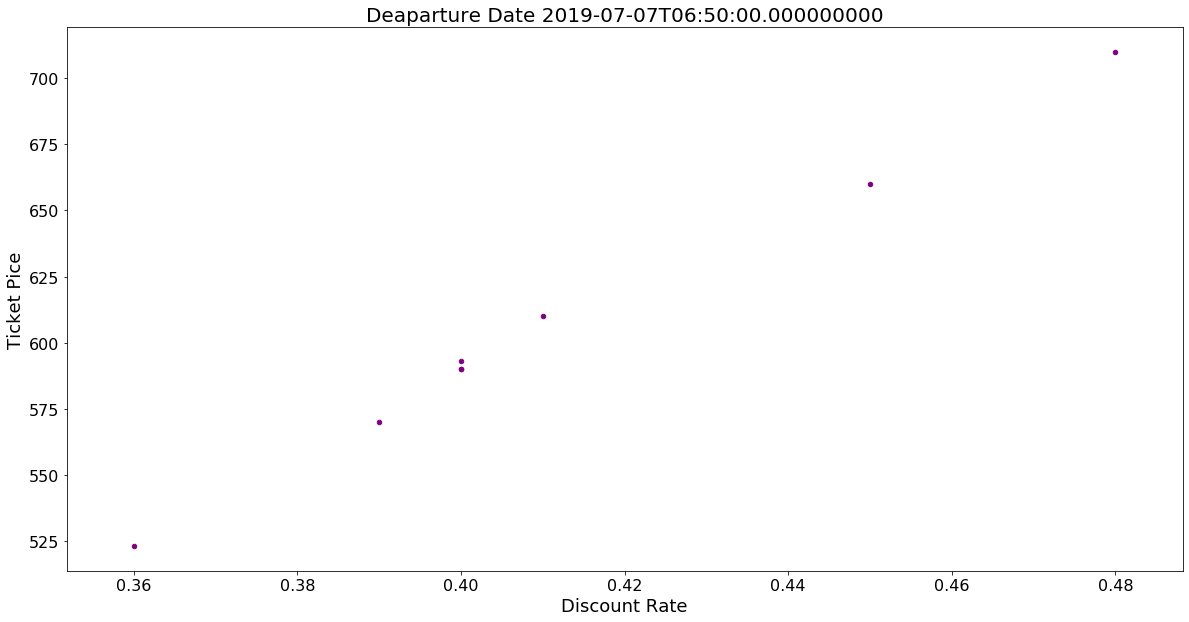

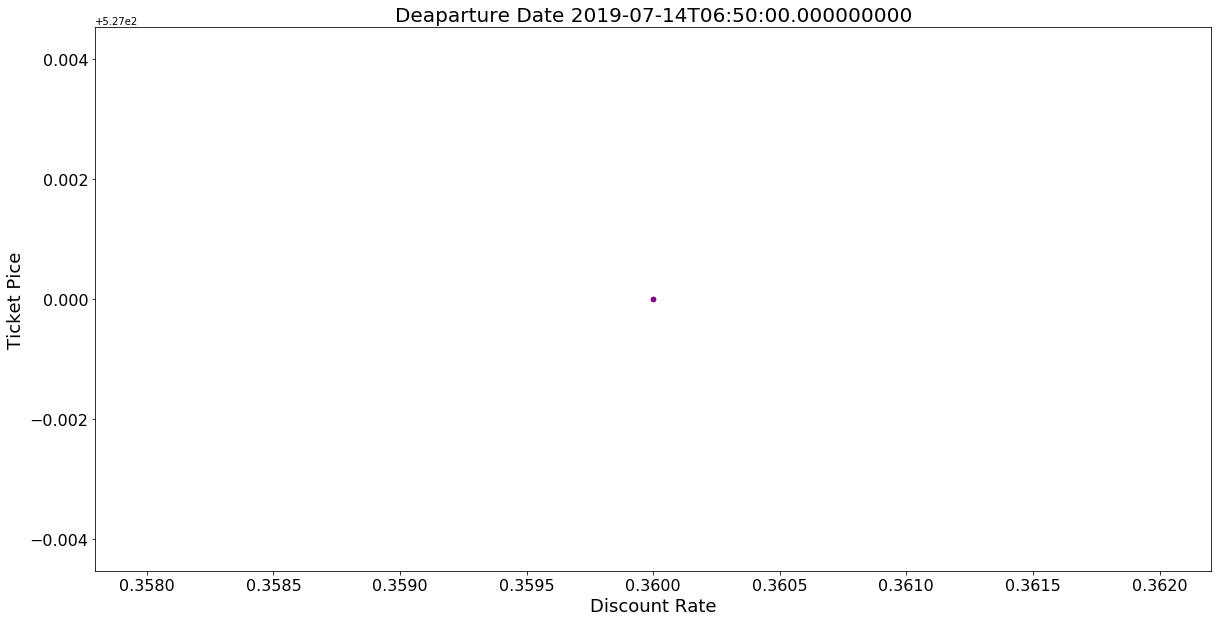

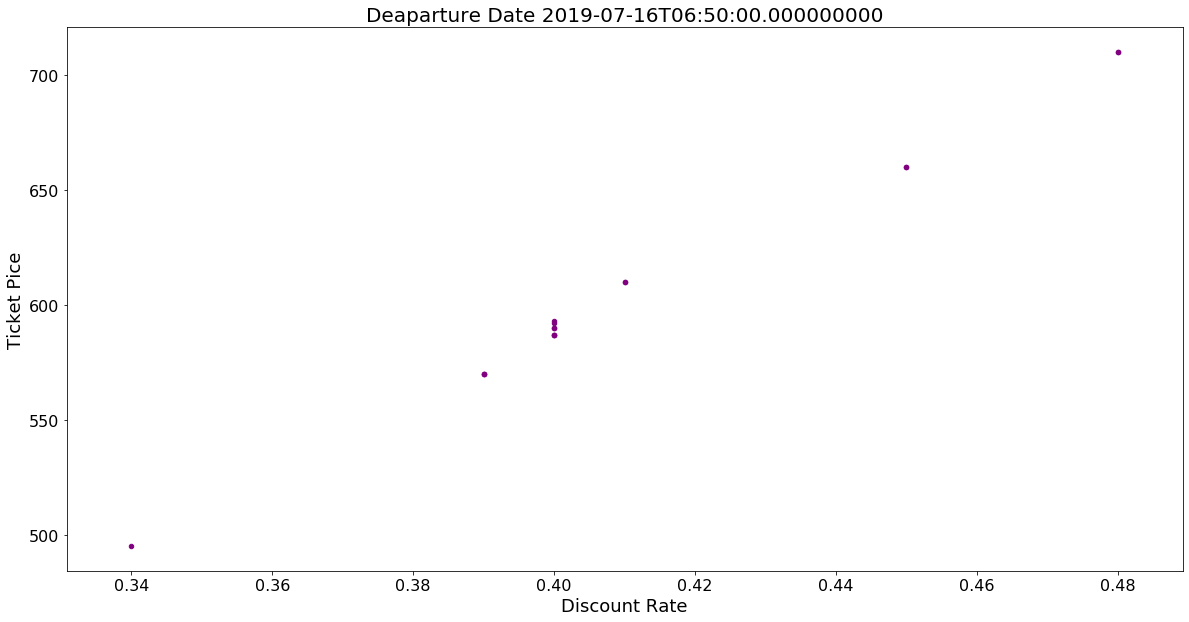

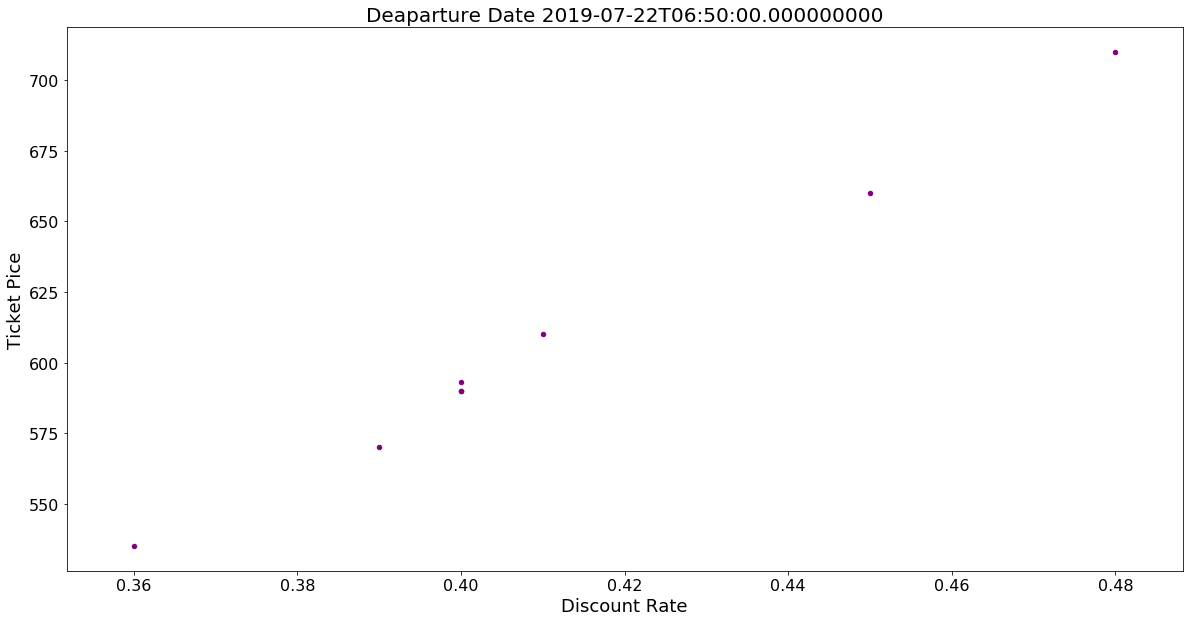

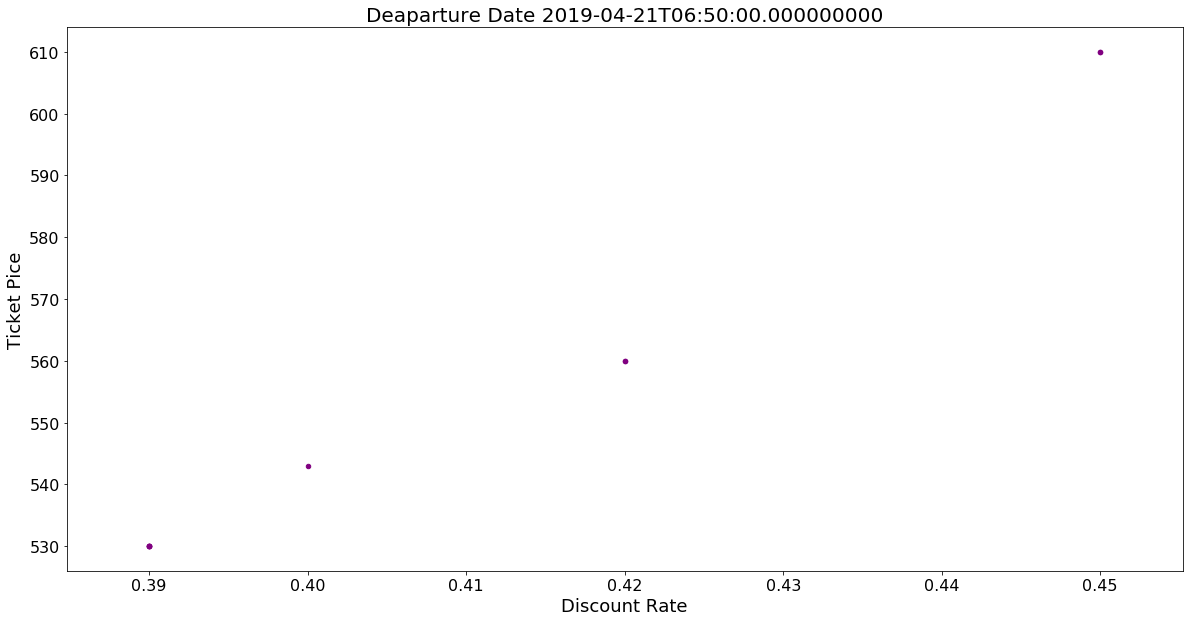

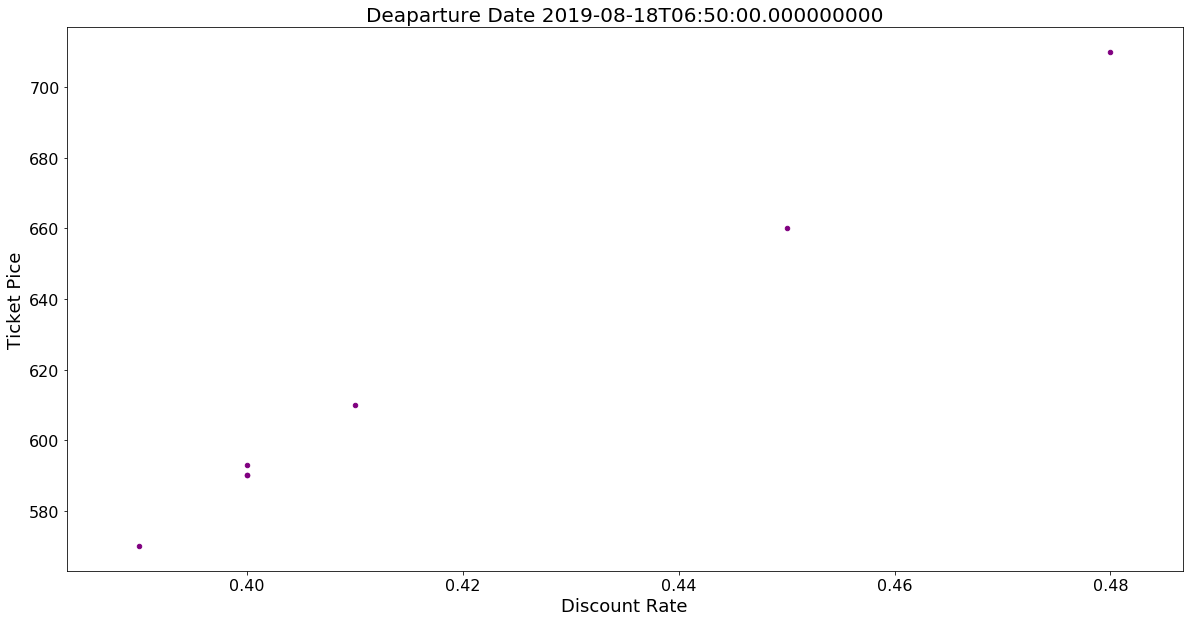

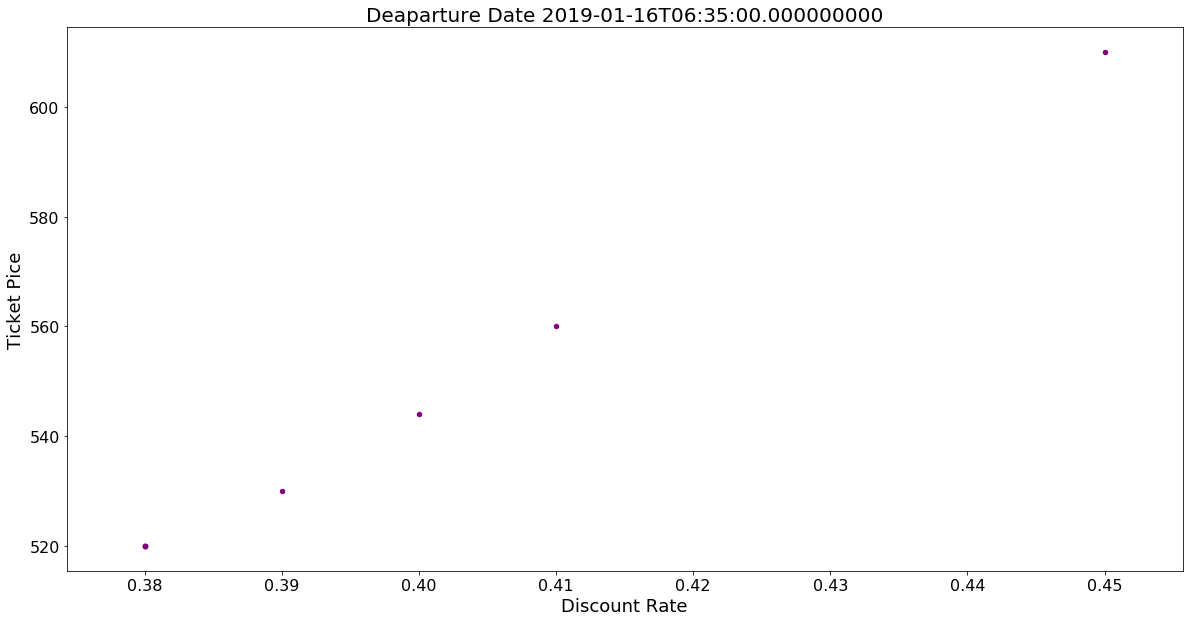

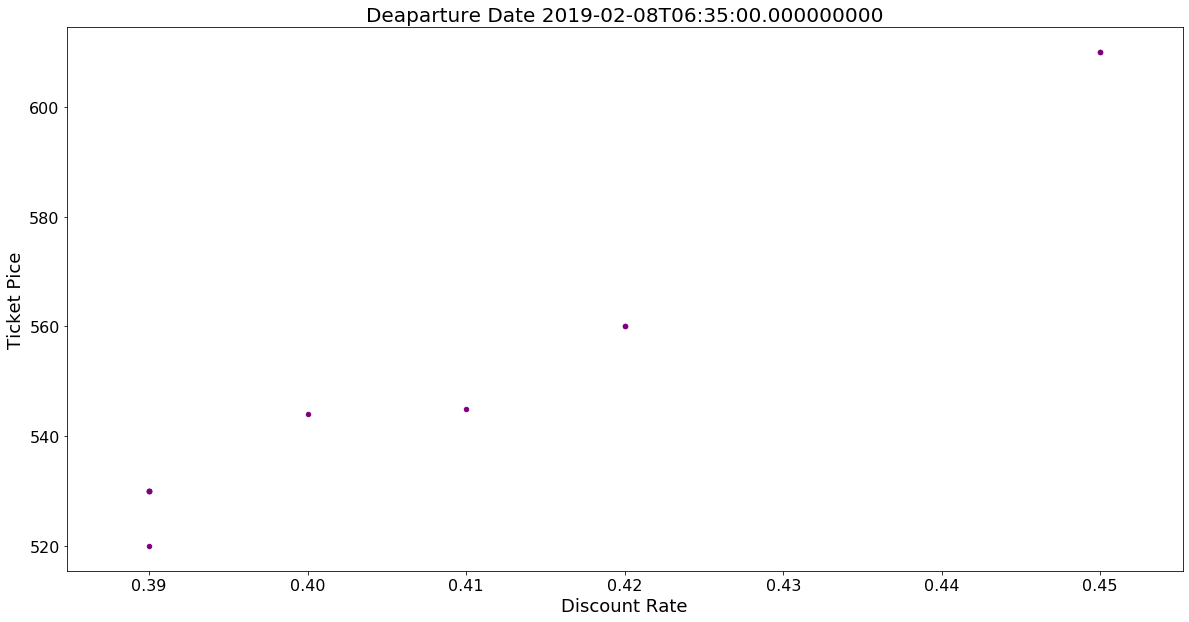

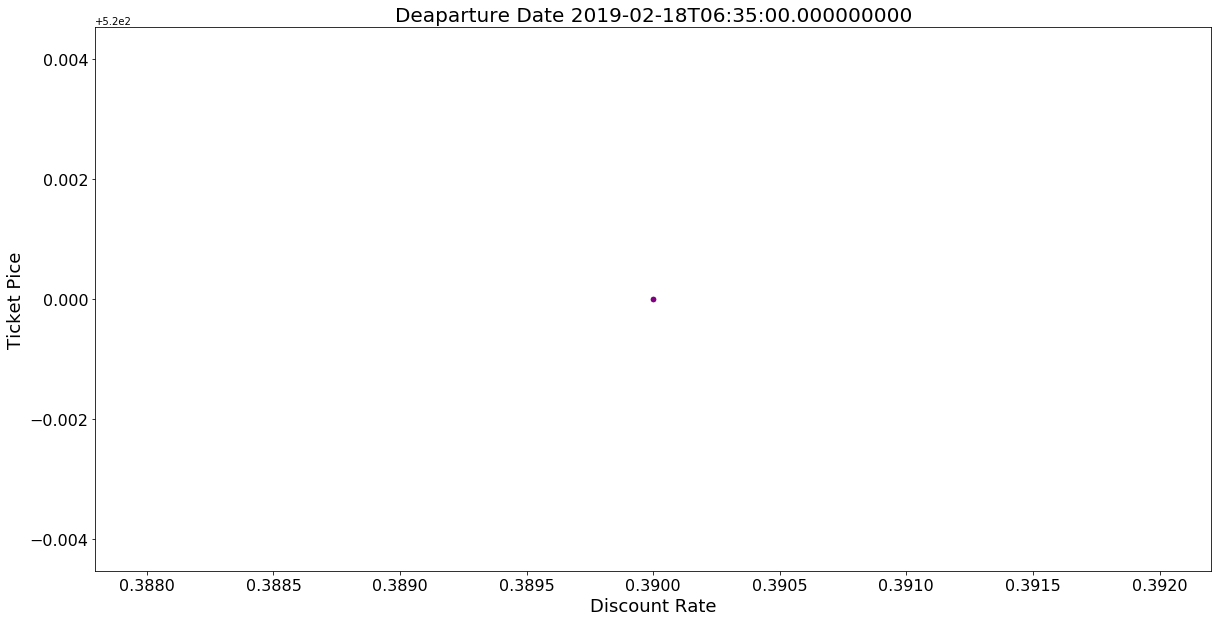

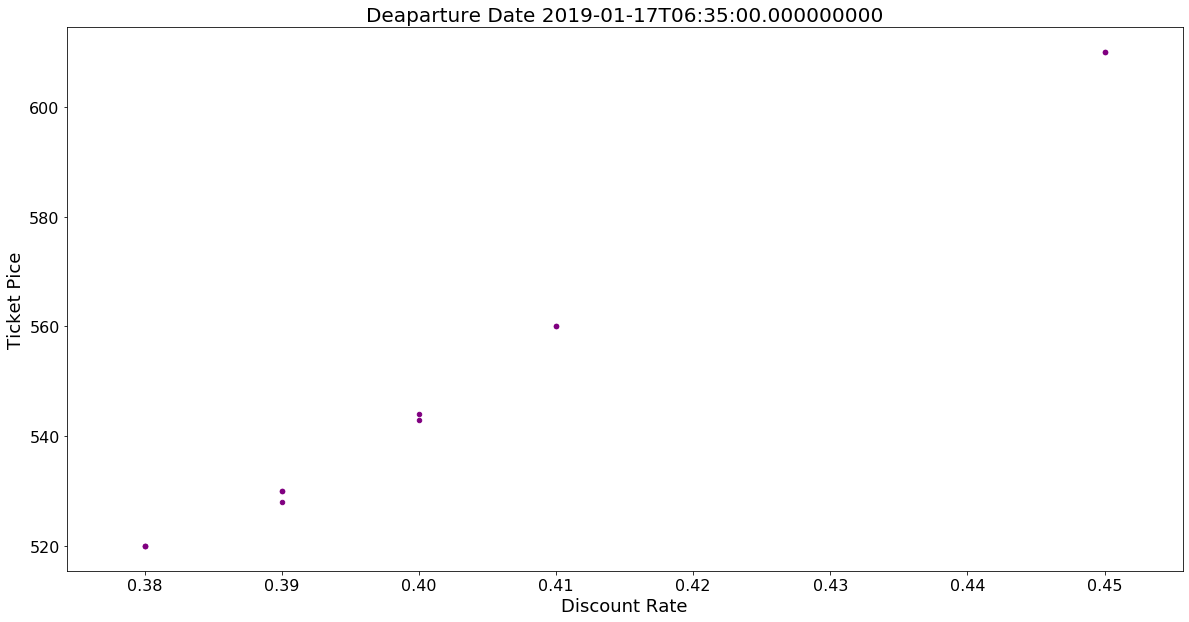

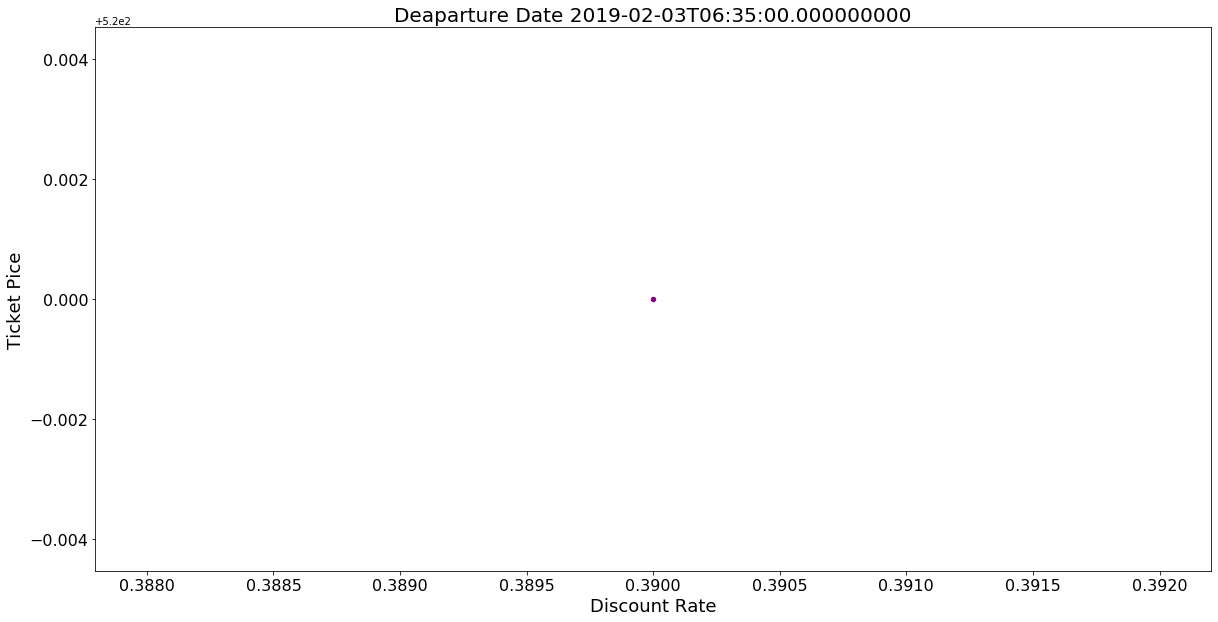

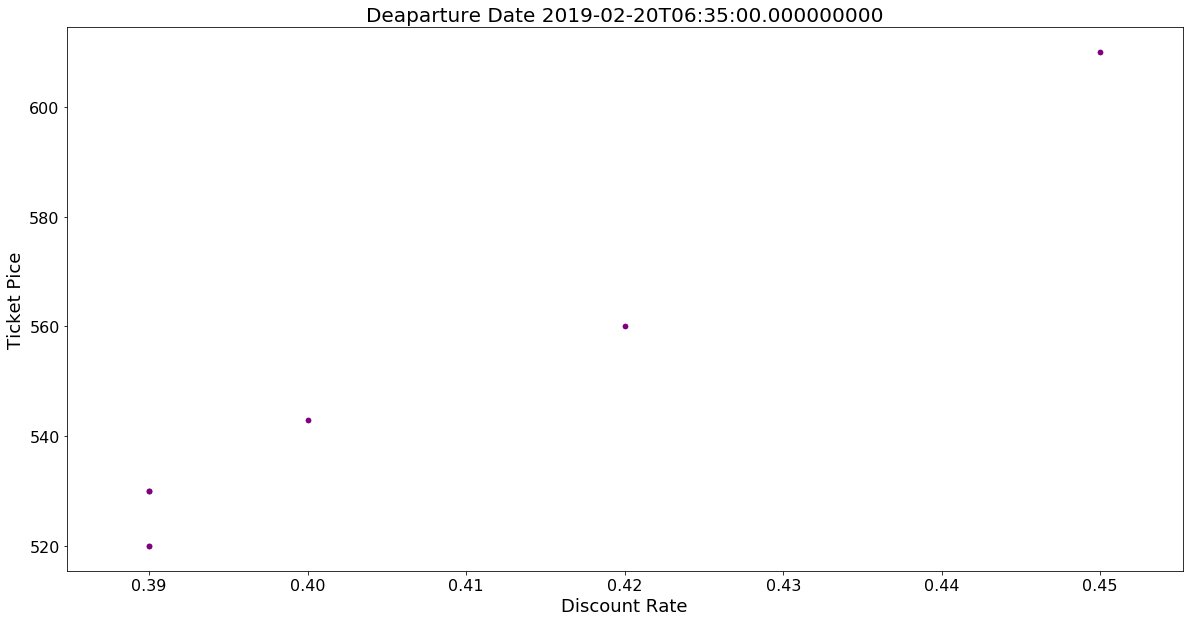

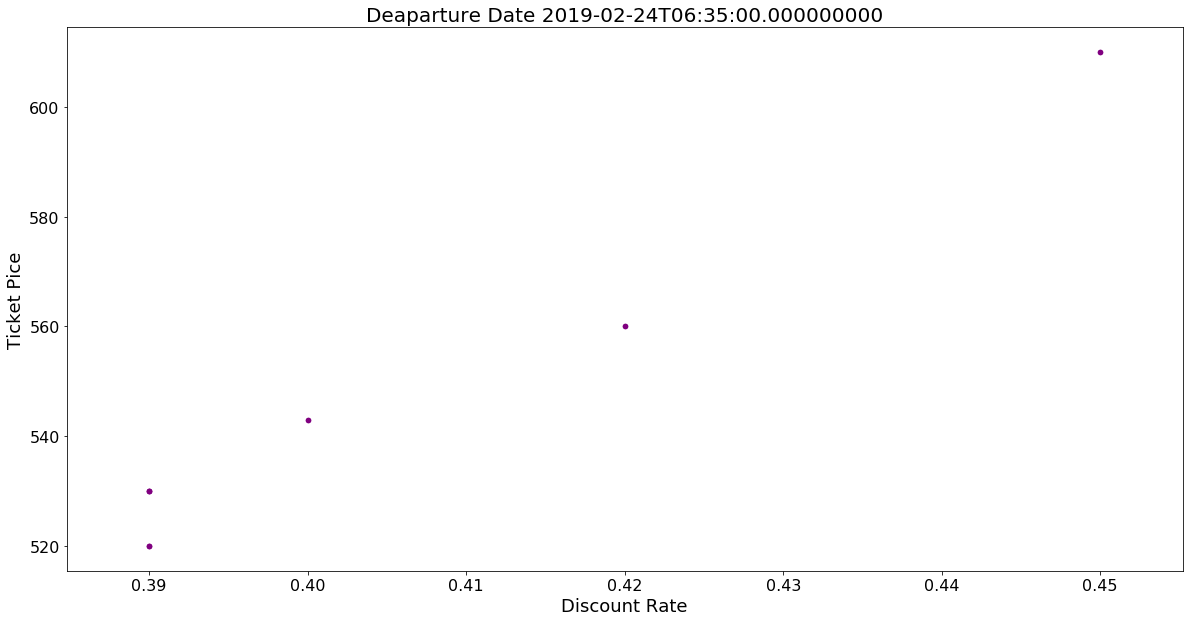

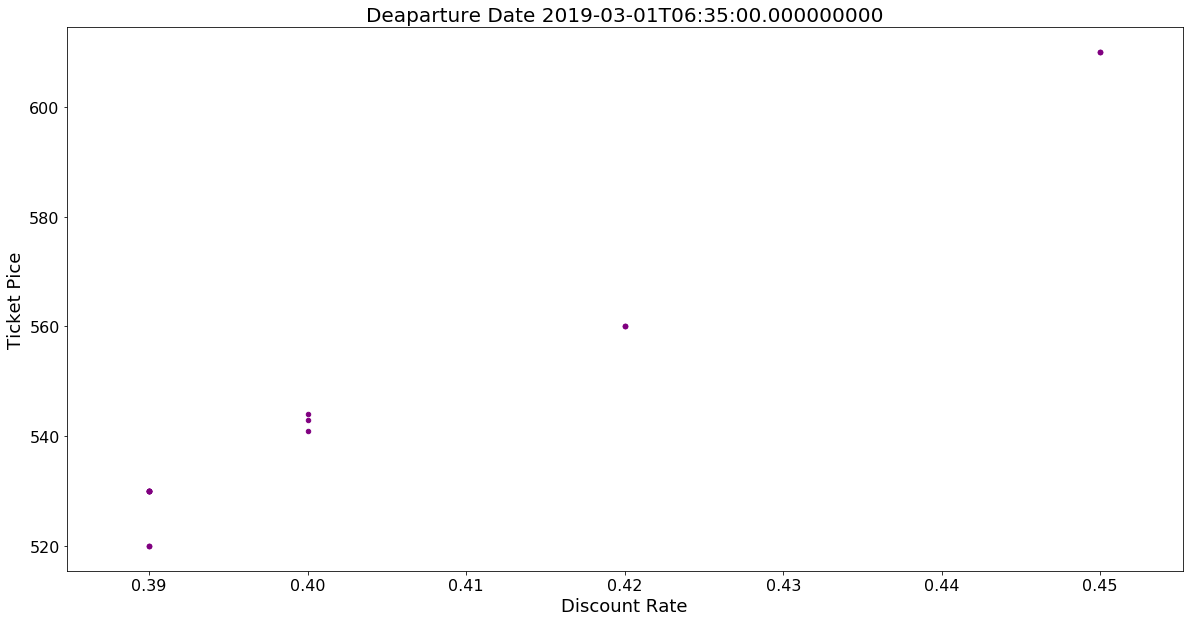

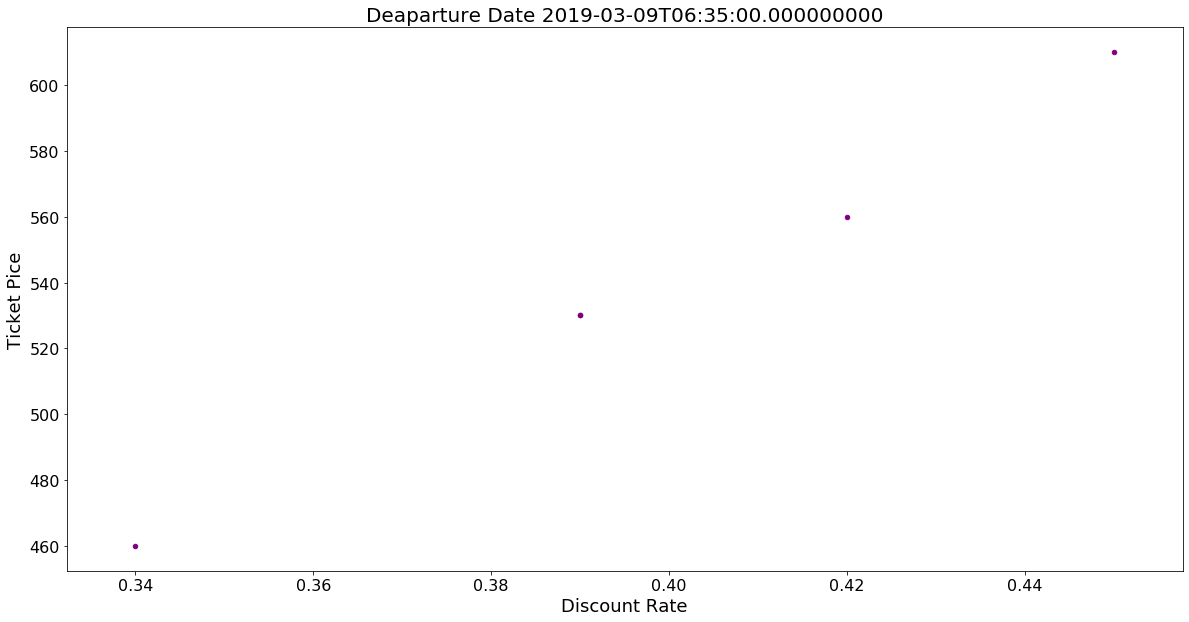

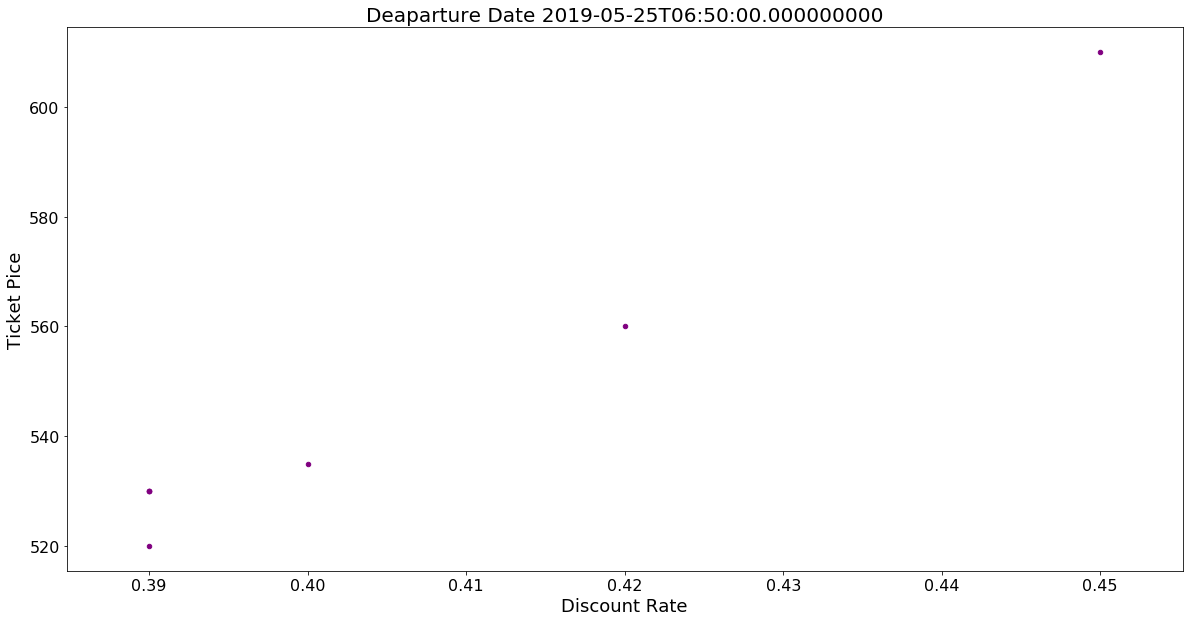

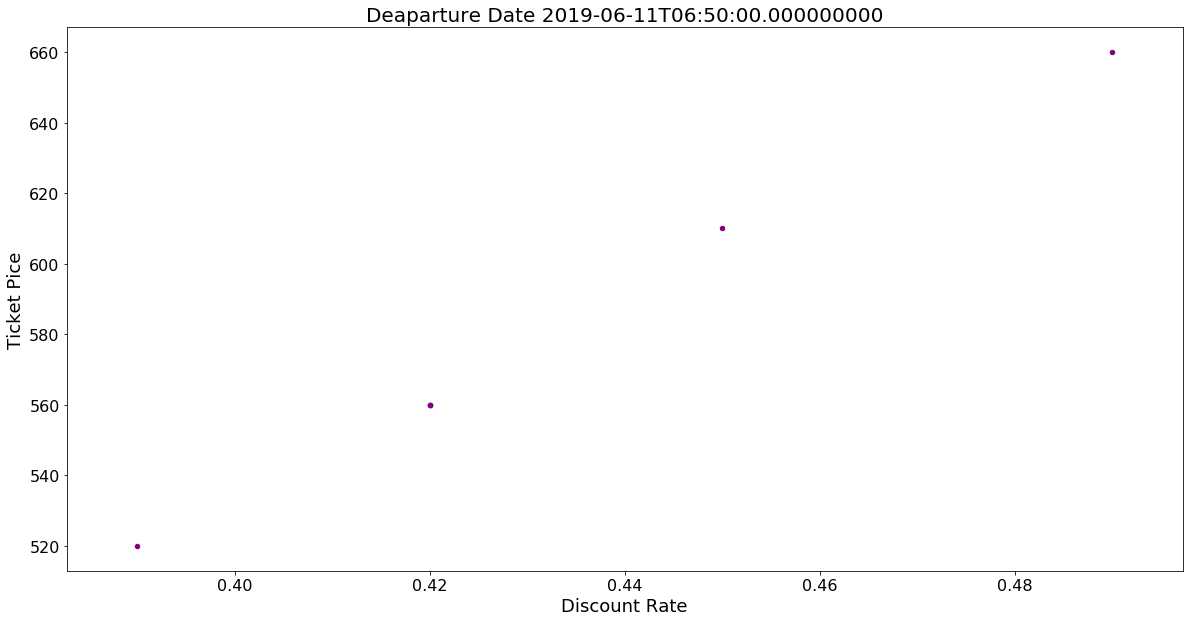

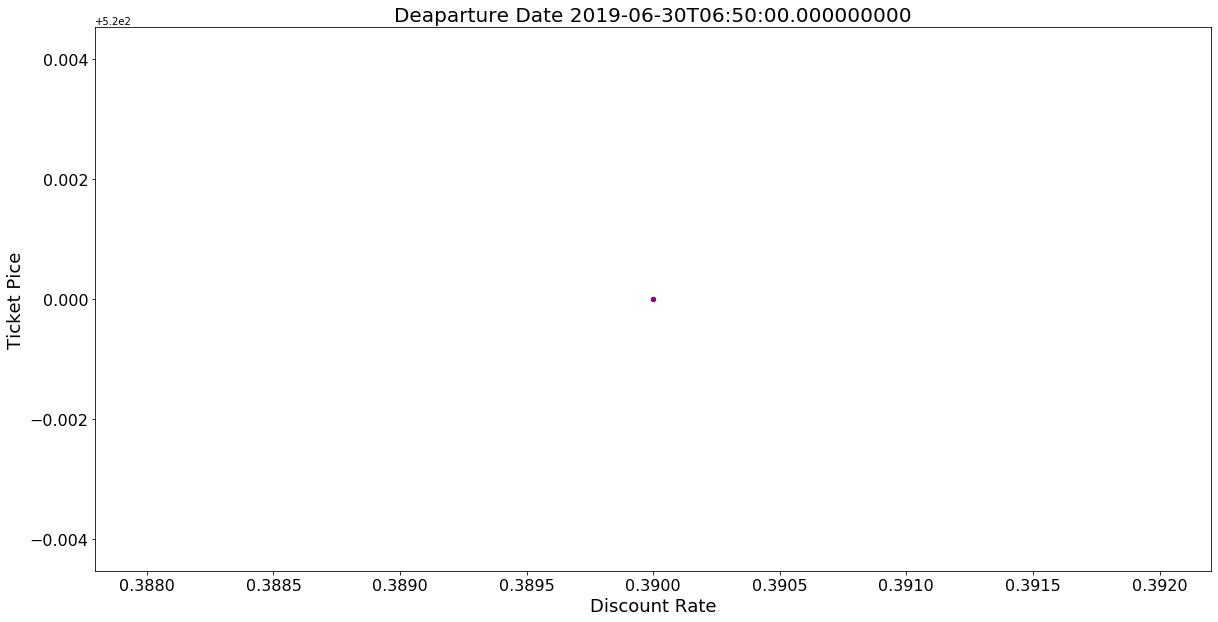

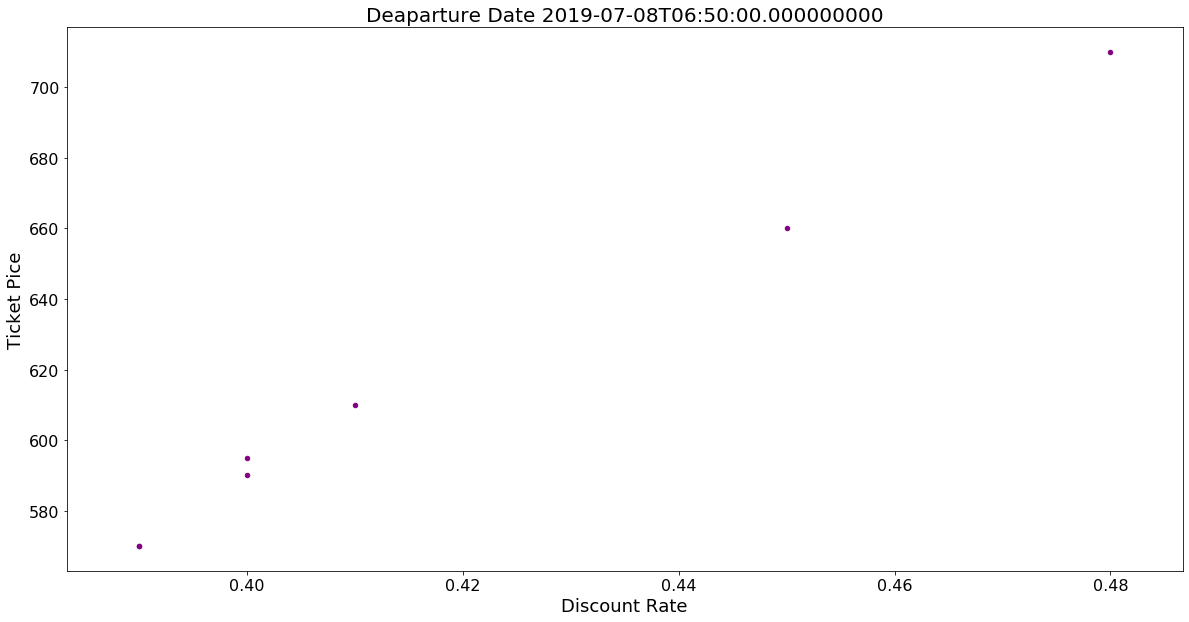

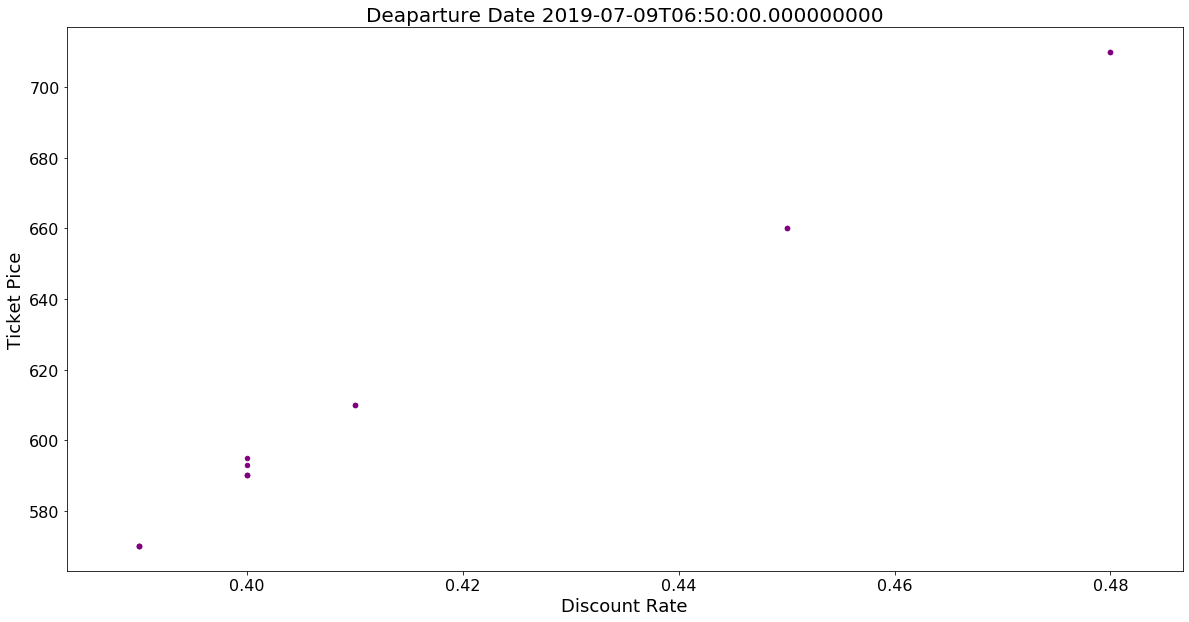

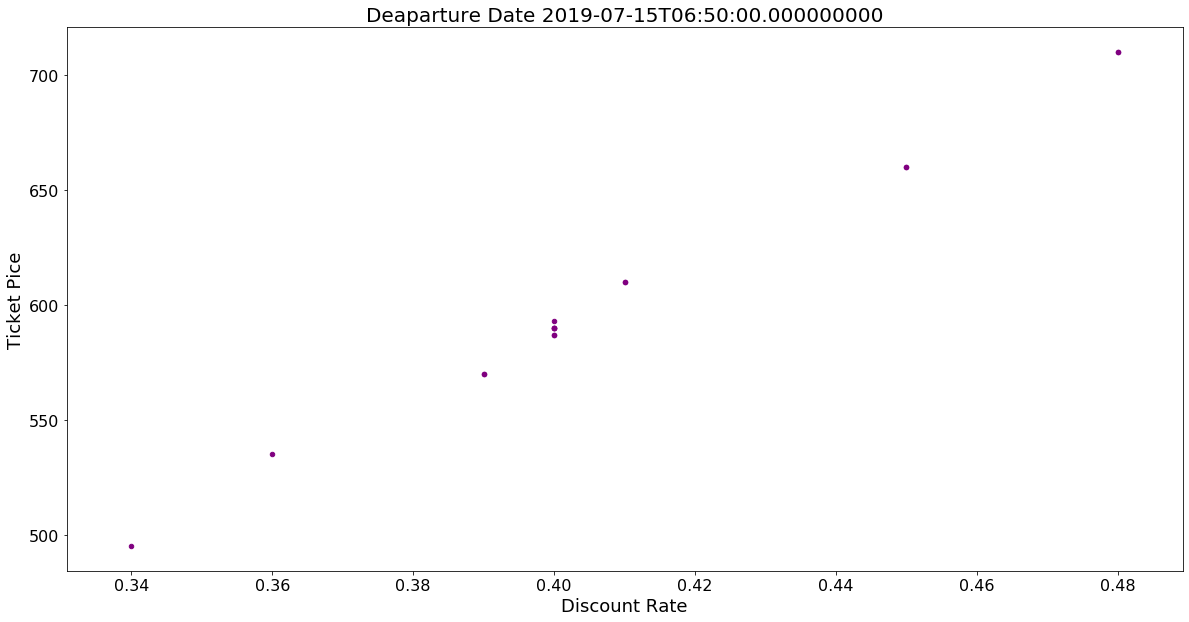

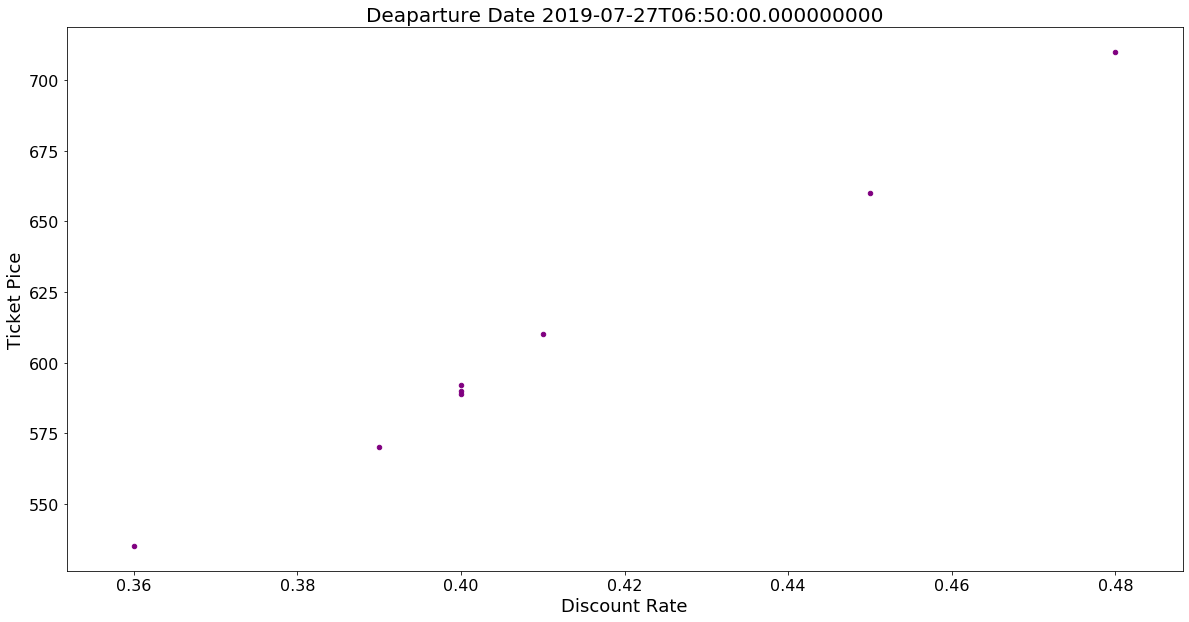

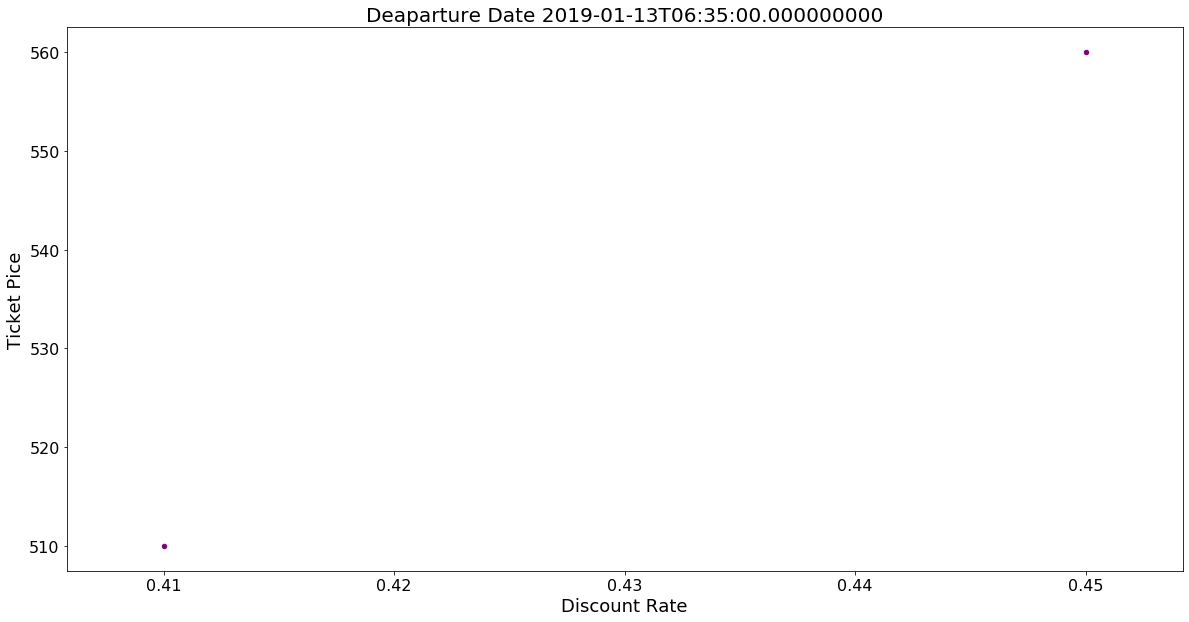

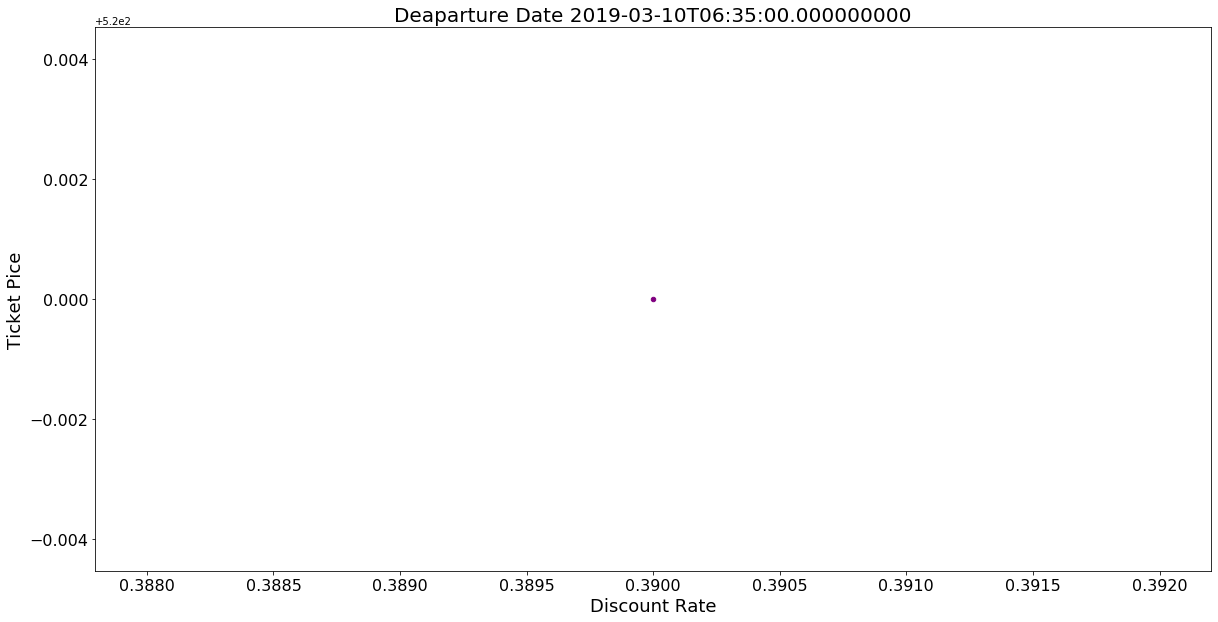

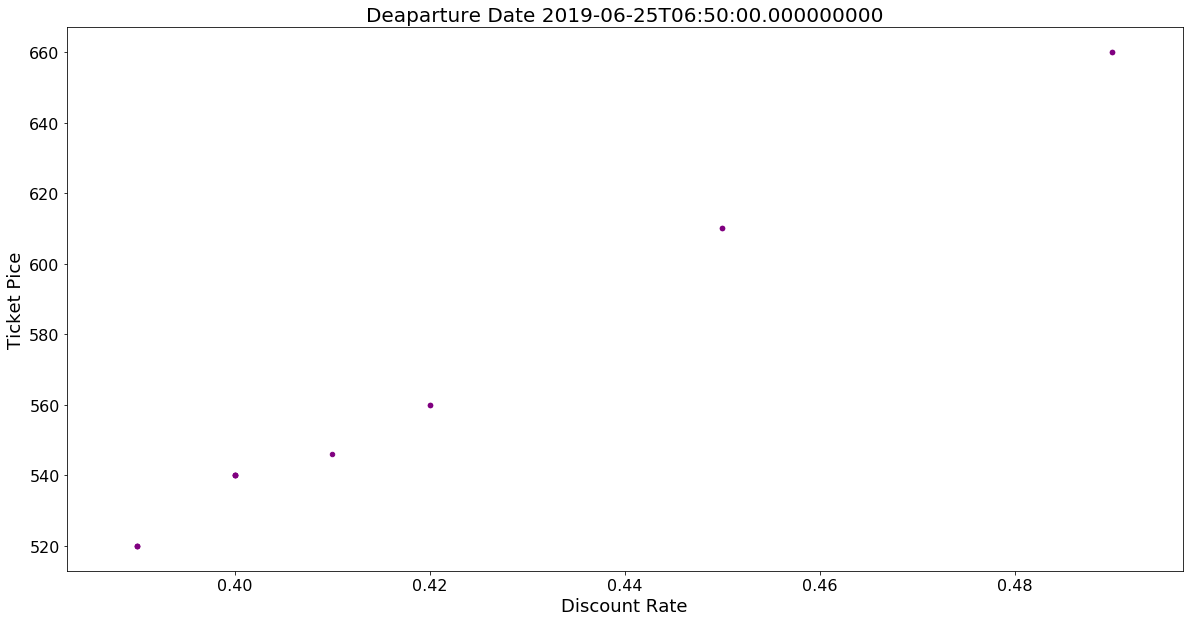

In [221]:
for dd in df2_list_departureDate:
    plt.figure(figsize=(20,10))
    plt.scatter(df2[df2["departureDate"]==dd]["rate"],
                df2[df2["departureDate"]==dd]["price"],
               s=20, color = "purple")
    plt.xlabel("Discount Rate", fontsize=18)
    plt.ylabel("Ticket Pice", fontsize=18)
    plt.title("Deaparture Date {}".format(dd), fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

In [222]:
for dd in df2_list_departureDate:
    print(dd)
    print(df2[df2['departureDate'] == dd].loc[:,["price","rate"]].corr())

2019-01-05T06:35:00.000000000
       price  rate
price    1.0   1.0
rate     1.0   1.0
2019-01-06T06:35:00.000000000
       price  rate
price    NaN   NaN
rate     NaN   NaN
2019-01-07T06:35:00.000000000
         price     rate
price  1.00000  0.99843
rate   0.99843  1.00000
2019-01-08T06:35:00.000000000
          price      rate
price  1.000000  0.996973
rate   0.996973  1.000000
2019-01-09T06:35:00.000000000
          price      rate
price  1.000000  0.998767
rate   0.998767  1.000000
2019-01-10T06:35:00.000000000
         price     rate
price  1.00000  0.99862
rate   0.99862  1.00000
2019-01-15T06:35:00.000000000
          price      rate
price  1.000000  0.999157
rate   0.999157  1.000000
2019-01-19T06:35:00.000000000
          price      rate
price  1.000000  0.998953
rate   0.998953  1.000000
2019-01-20T06:35:00.000000000
          price      rate
price  1.000000  0.999131
rate   0.999131  1.000000
2019-01-22T06:35:00.000000000
          price      rate
price  1.000000  0.998925


       price  rate
price    NaN   NaN
rate     NaN   NaN
2019-01-17T06:35:00.000000000
          price      rate
price  1.000000  0.998338
rate   0.998338  1.000000
2019-02-03T06:35:00.000000000
       price  rate
price    NaN   NaN
rate     NaN   NaN
2019-02-20T06:35:00.000000000
          price      rate
price  1.000000  0.987132
rate   0.987132  1.000000
2019-02-24T06:35:00.000000000
          price      rate
price  1.000000  0.987132
rate   0.987132  1.000000
2019-03-01T06:35:00.000000000
          price      rate
price  1.000000  0.987736
rate   0.987736  1.000000
2019-03-09T06:35:00.000000000
          price      rate
price  1.000000  0.996819
rate   0.996819  1.000000
2019-05-25T06:50:00.000000000
          price      rate
price  1.000000  0.986696
rate   0.986696  1.000000
2019-06-11T06:50:00.000000000
         price     rate
price  1.00000  0.99824
rate   0.99824  1.00000
2019-06-30T06:50:00.000000000
       price  rate
price    NaN   NaN
rate     NaN   NaN
2019-07-08T06:50:00

In [223]:
# As can be seen for the graph series at most of them we have near perfect lines, sometimes for same discount rate
# we have a bit different level of prices, which can be explained by precision flaw of discount rate. As we can see from
# correlation matrices the price/dicount_rate is between 0.98 and 1.
# We can conclude that the values in price column in data frame are discounted prices.

### Q 1.3
#### What are the original prices for each cabin class and each flight (a flight is identified by its flight number)? Tabulate flight number, departure time in hh:mm, cabin class and original price for each flight. You may use your own reasonable assumptions to find out departure time and the original prices.

In [224]:
# Create departure time column
df['departureTime'] = df["departureDate"].dt.strftime('%H:%M')

In [225]:
# Create data frame with original prices only (100% of price for ticket)
df_original_price = df[df["rate"] == 1]

In [226]:
# Tabulate flight number, departure time in hh:mm, cabin class and original price for each flight.
df_original_price.groupby(["flightNumber","departureTime","cabinClass","price"]).mean()["rate"]

flightNumber  departureTime  cabinClass  price
CA1501        08:30          C           5660     1.0
                                         5810     1.0
                             F           5680     1.0
                                         6270     1.0
                                         6410     1.0
                                                 ... 
MU7032        10:00          F           6230     1.0
                             Y           1490     1.0
MU7106        14:05          C           5360     1.0
                             F           5660     1.0
                             Y           1490     1.0
Name: rate, Length: 317, dtype: float64

In [227]:
# Same as above but in different output format.
pd.pivot_table(df_original_price,index=["flightNumber","departureTime","cabinClass","price"],values=["rate"])

rate
flightNumber departureTime cabinClass price      
CA1501       08:30         C          5660    1.0
                                      5810    1.0
                           F          5680    1.0
                                      6270    1.0
                                      6410    1.0
...                                           ...
MU7032       10:00         F          6230    1.0
                           Y          1490    1.0
MU7106       14:05         C          5360    1.0
                           F          5660    1.0
                           Y          1490    1.0

[317 rows x 1 columns]

In [228]:
# Based on grouping above prices are vary slitely so we can aggregate price by mean having less rows.
df_original_price.groupby(["flightNumber","departureTime","cabinClass"]).mean()["price"]

flightNumber  departureTime  cabinClass
CA1501        08:30          C             5682.299652
                             F             5693.055556
                             Y             1490.000000
CA1515        15:30          C             5681.522956
                             F             5771.491803
                                              ...     
MU7032        10:00          F             6230.000000
                             Y             1490.000000
MU7106        14:05          C             5360.000000
                             F             5660.000000
                             Y             1490.000000
Name: price, Length: 231, dtype: float64

In [229]:
# Same as above in different output format.
pd.pivot_table(df_original_price,index=["flightNumber","departureTime","cabinClass"],values=["price"])

price
flightNumber departureTime cabinClass             
CA1501       08:30         C           5682.299652
                           F           5693.055556
                           Y           1490.000000
CA1515       15:30         C           5681.522956
                           F           5771.491803
...                                            ...
MU7032       10:00         F           6230.000000
                           Y           1490.000000
MU7106       14:05         C           5360.000000
                           F           5660.000000
                           Y           1490.000000

[231 rows x 1 columns]

### Q2 Linear Regression

### Q 2.4
#### Are the original air ticket prices related to the departure time of the flights for each airline ? Airlines are identified by the first two letters of the flight numbers.


In [230]:
# Create Airlines column in original prices data frame
df_original_price["Airline"] = df_original_price["flightNumber"].apply(lambda x: str(x)[0:2])
# Get list of airlines
list_airlines = df_original_price["Airline"].unique()

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


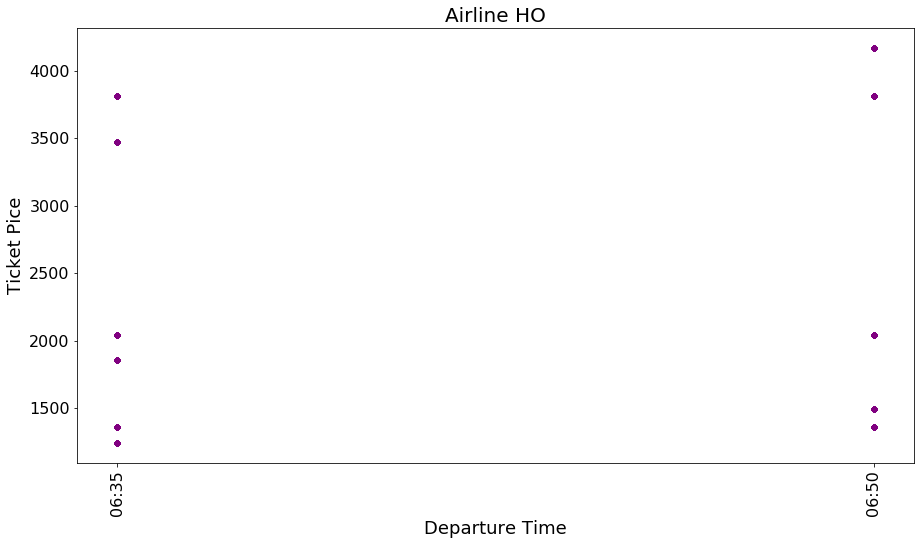

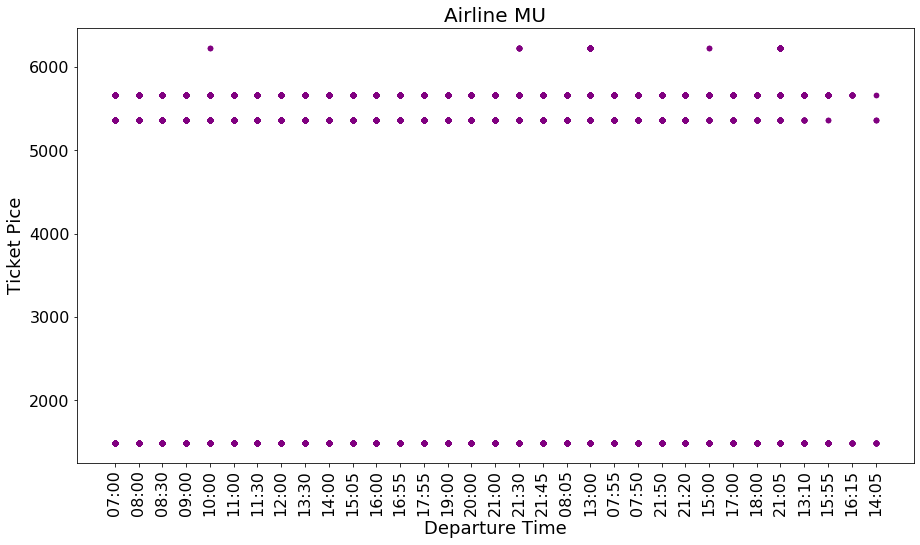

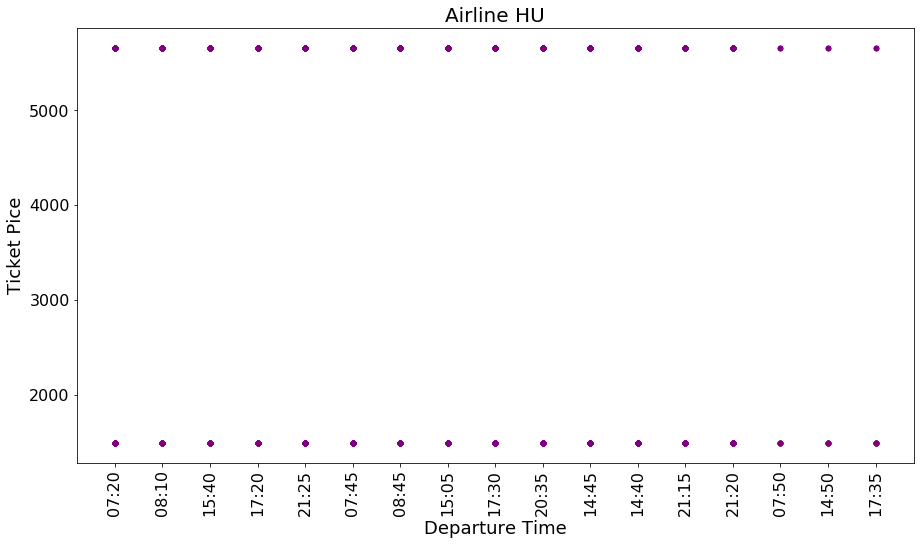

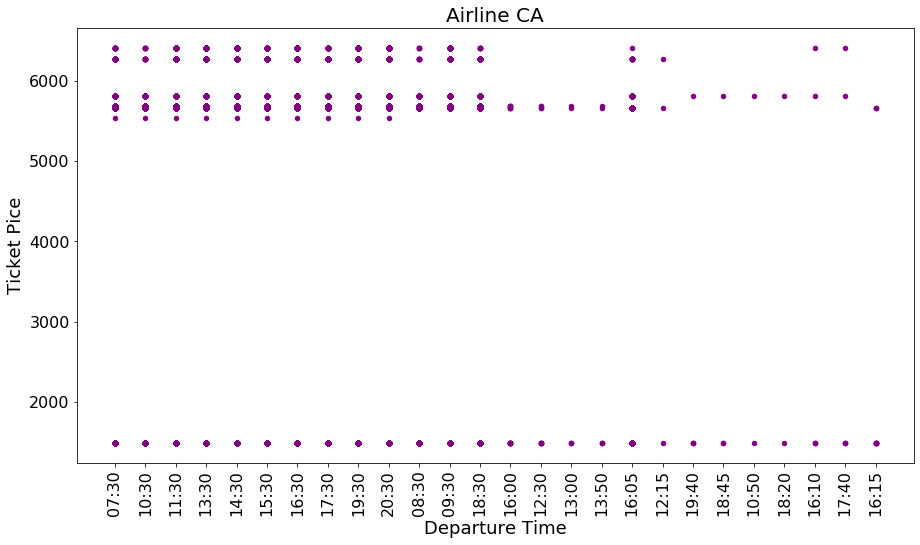

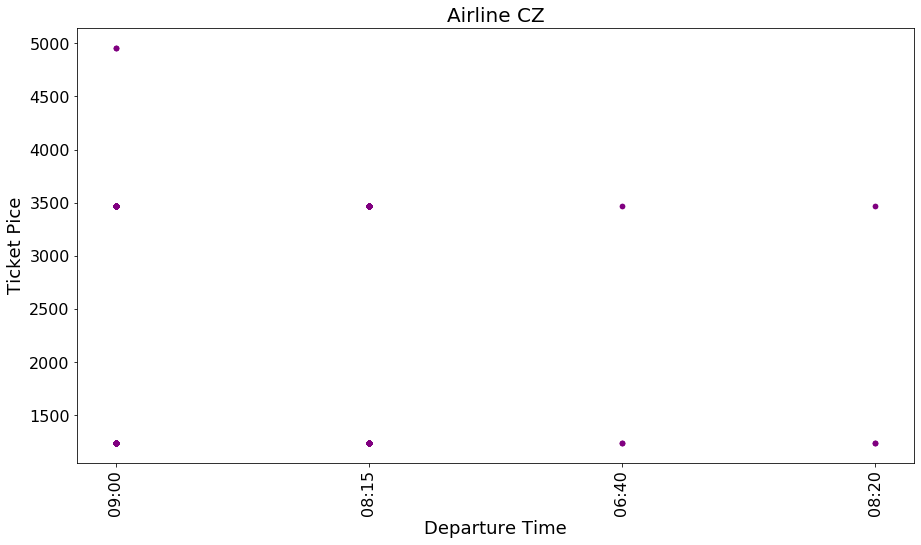

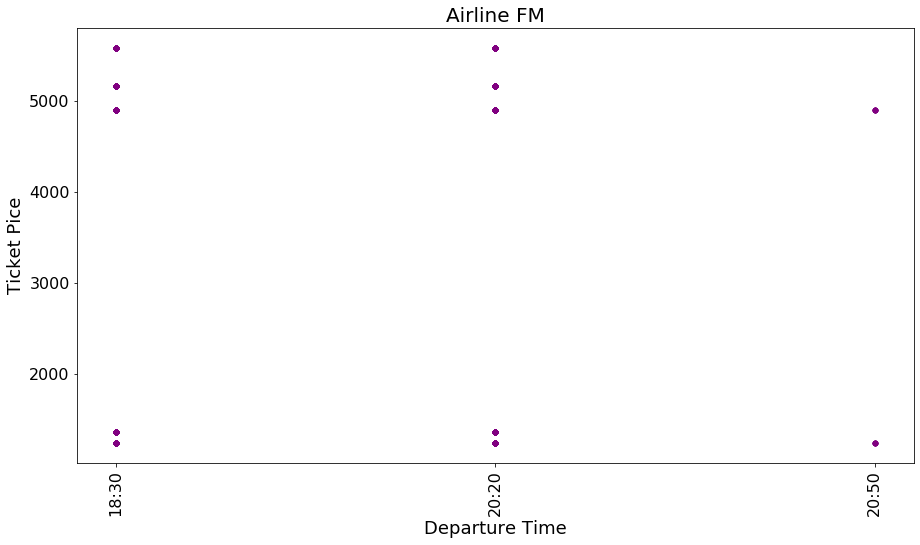

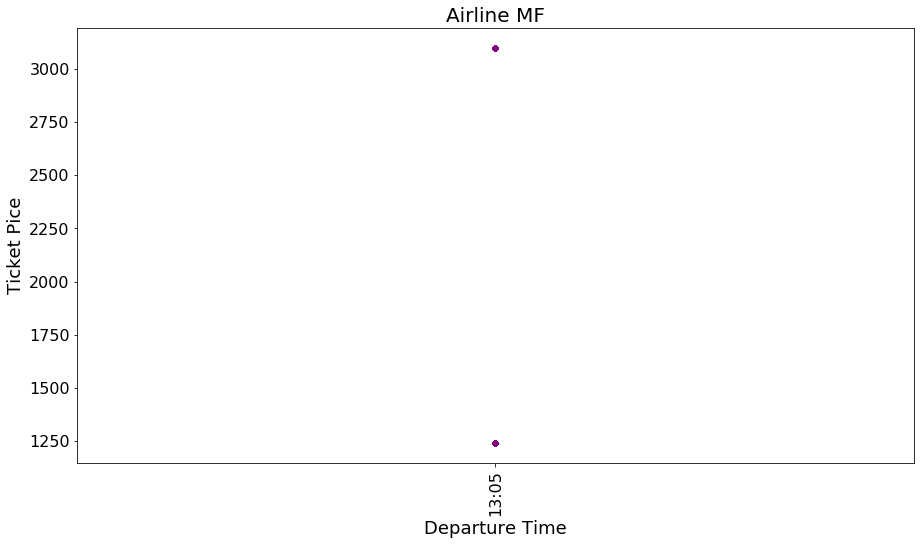

In [231]:
for airline in list_airlines:
    plt.figure(figsize=(15,8))
    plt.scatter(df_original_price[df_original_price["Airline"] == "{}".format(airline)]["departureTime"],
                df_original_price[df_original_price["Airline"] == "{}".format(airline)]["price"],
               s=20, color = "purple")
    plt.xlabel("Departure Time", fontsize=18)
    plt.ylabel("Ticket Pice", fontsize=18)
    plt.title("Airline {}".format(airline), fontsize=20)
    plt.xticks(fontsize=16,rotation = 90)
    plt.yticks(fontsize=16)
    plt.show()

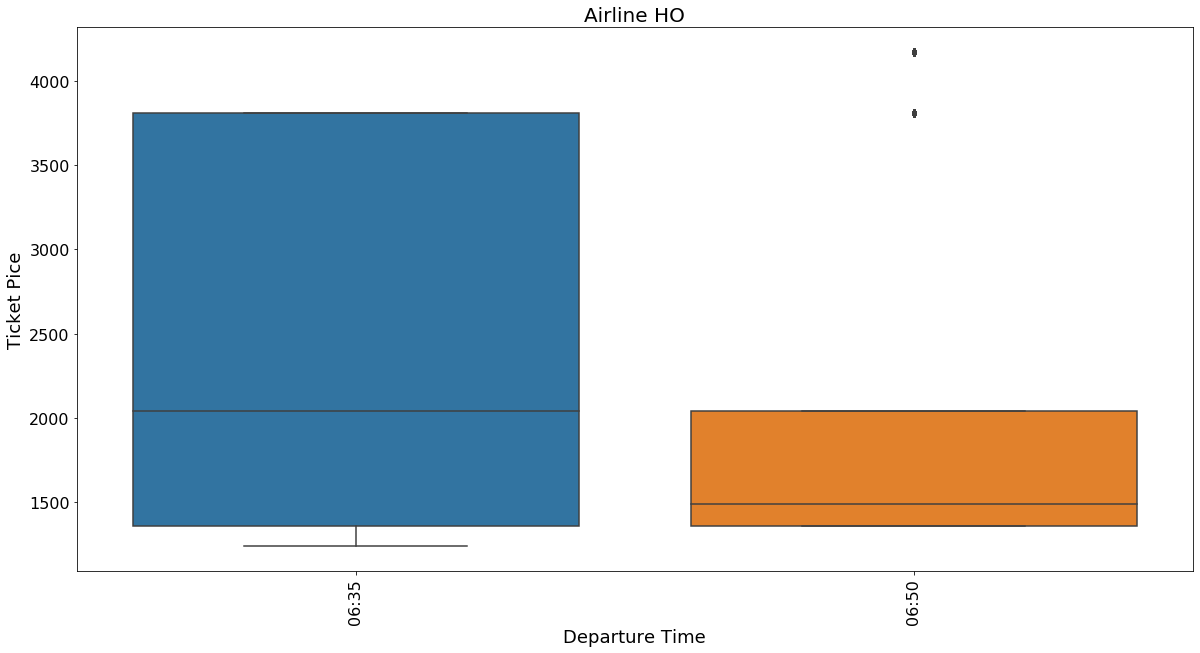

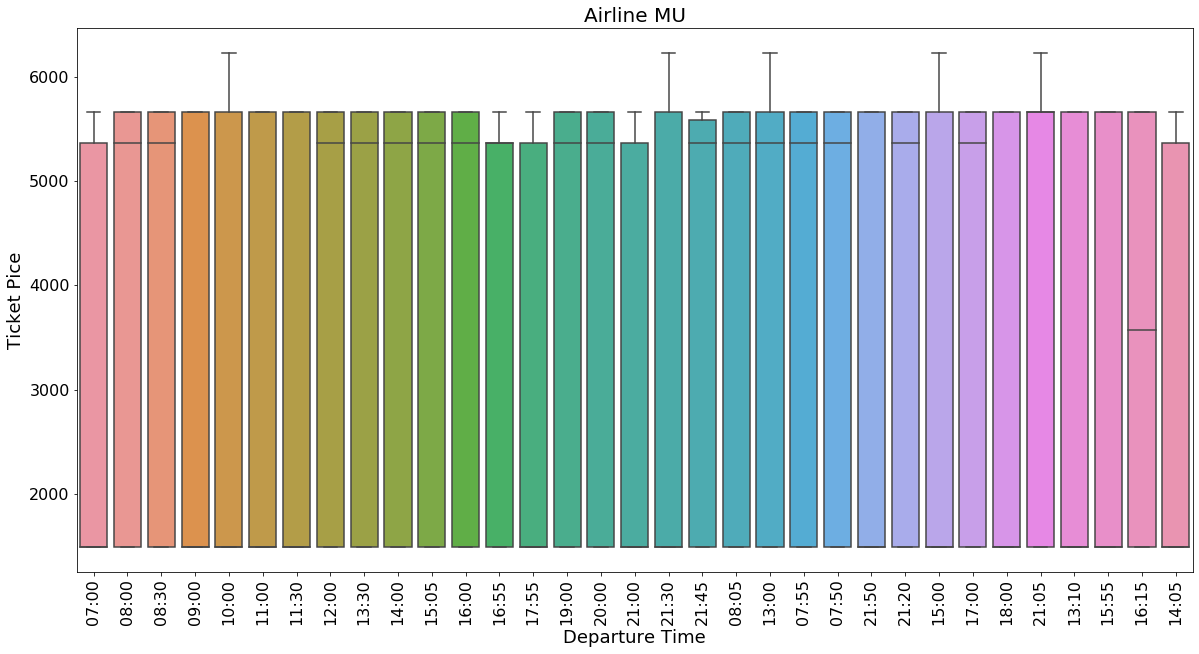

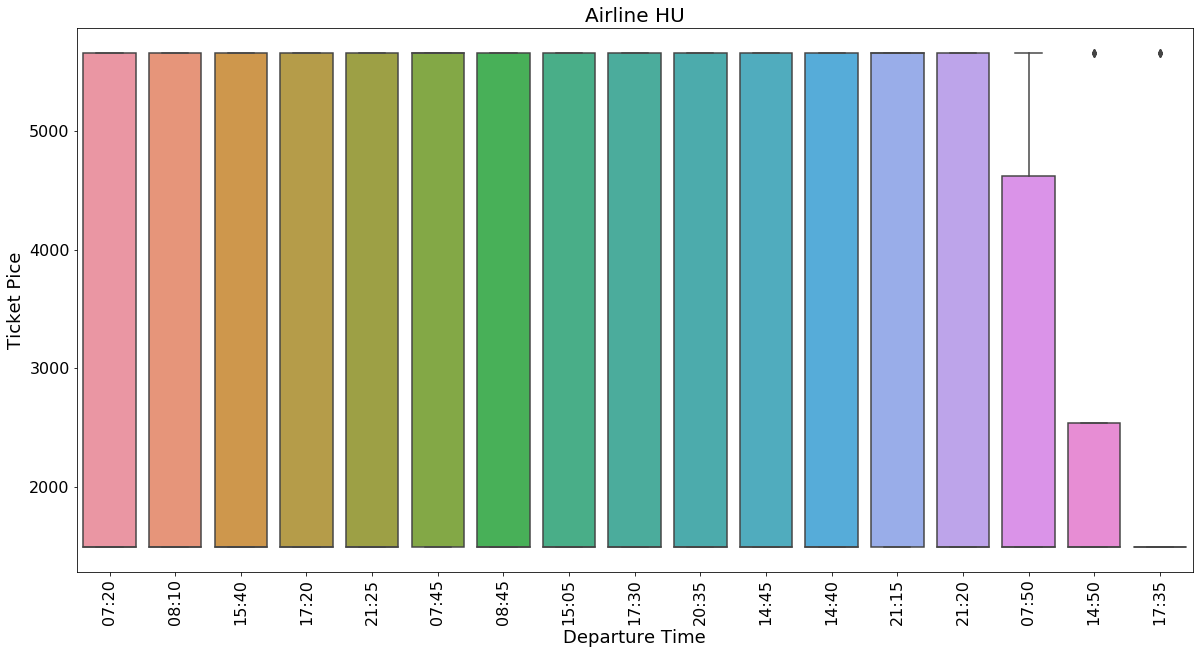

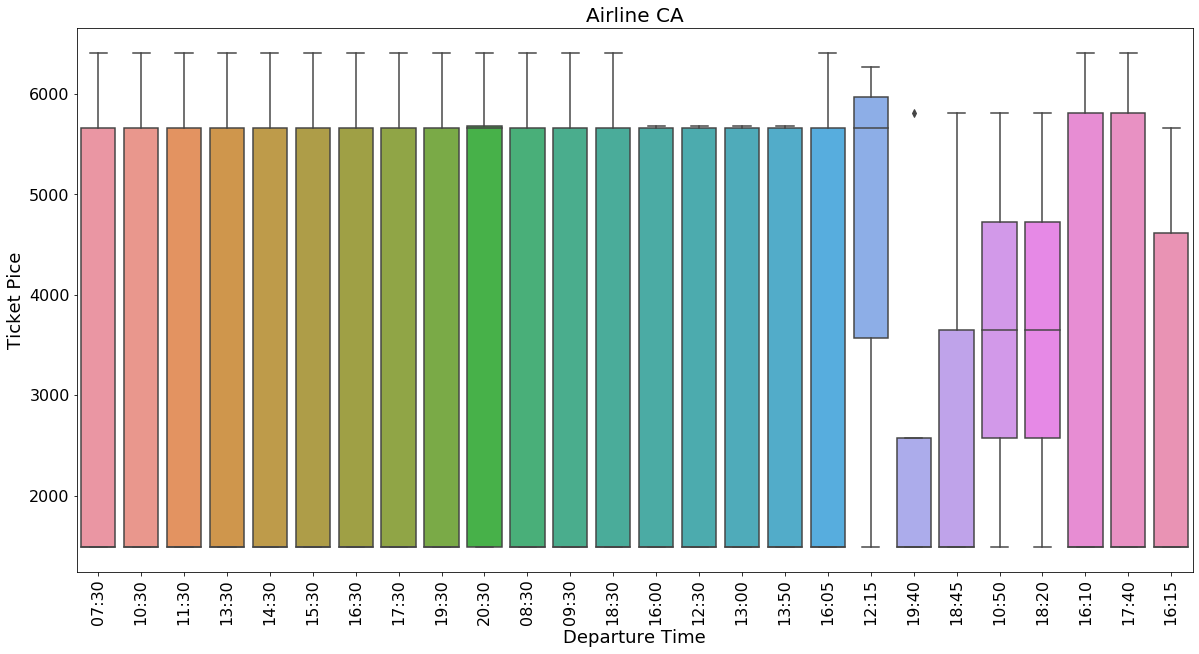

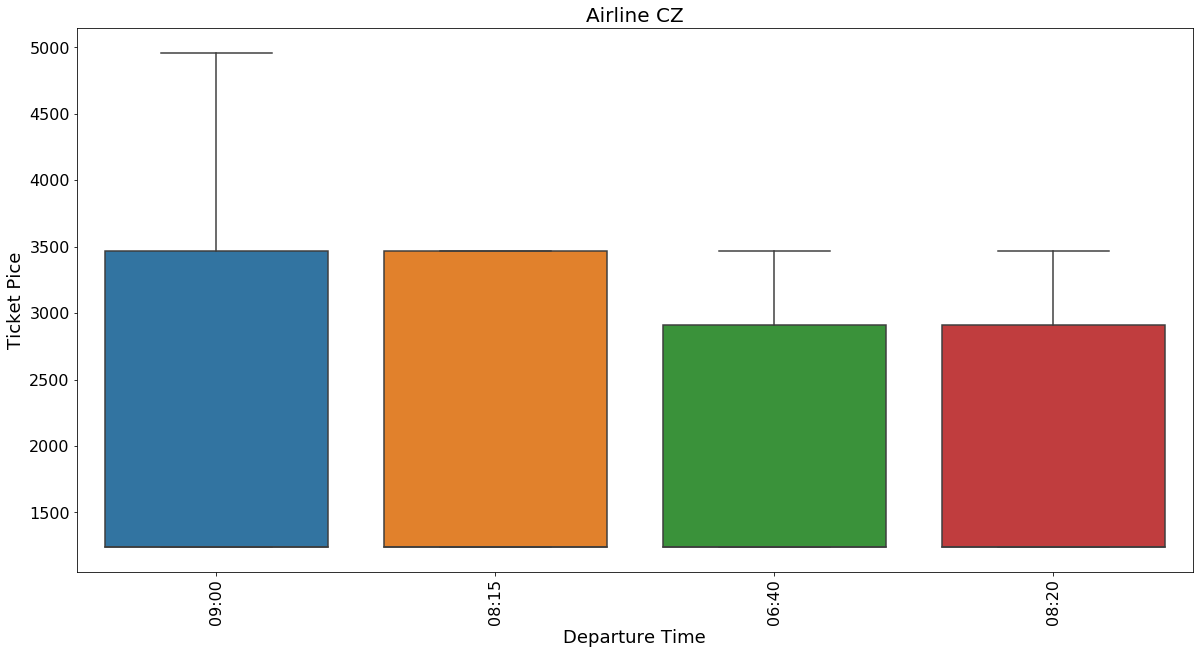

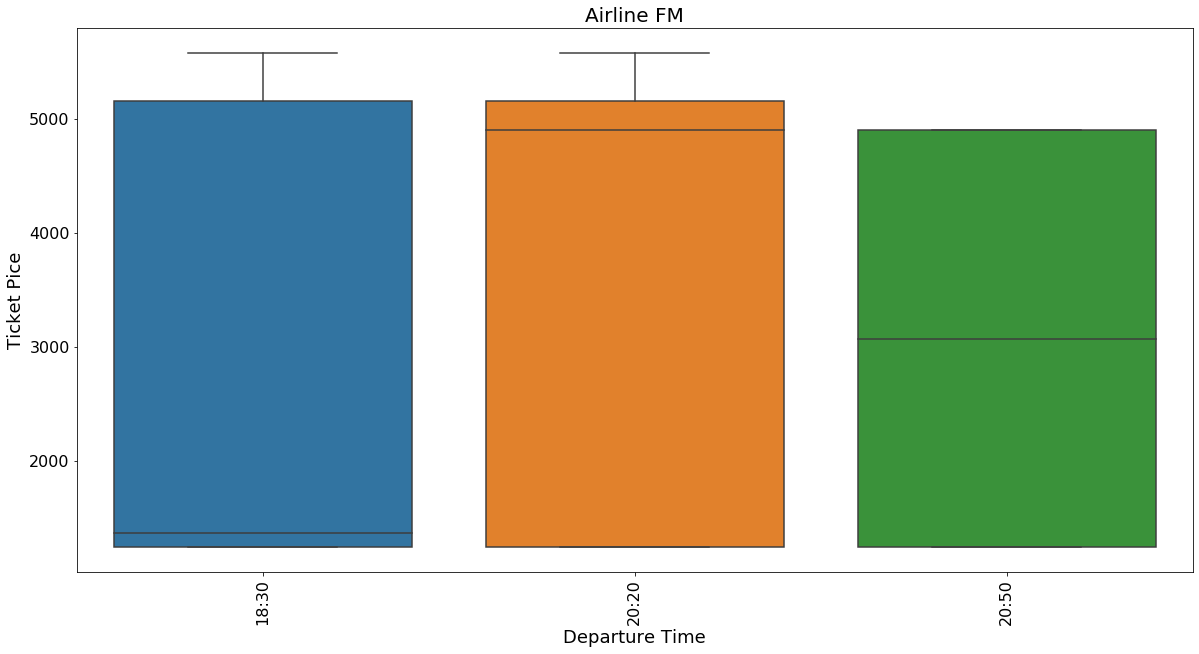

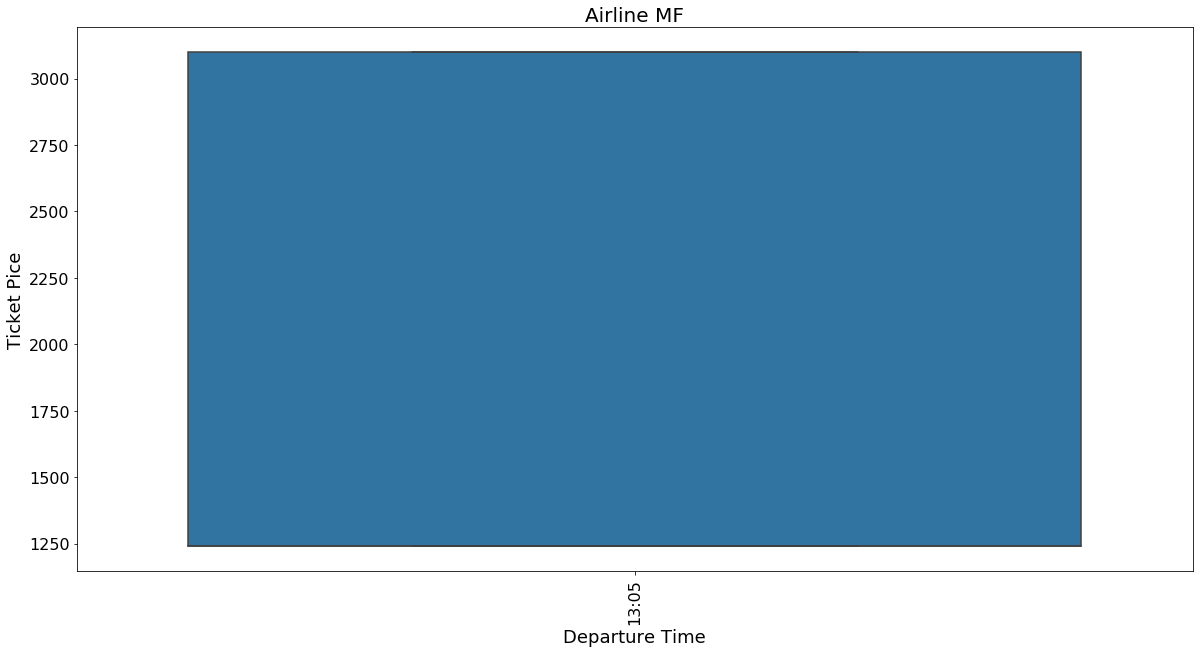

In [232]:
for airline in list_airlines:
    plt.figure(figsize=(20,10))
    sns.boxplot( x = df_original_price[df_original_price["Airline"] == "{}".format(airline)]["departureTime"],
                y = df_original_price[df_original_price["Airline"] == "{}".format(airline)]["price"])
    plt.xlabel("Departure Time", fontsize=18)
    plt.ylabel("Ticket Pice", fontsize=18)
    plt.title("Airline {}".format(airline), fontsize=20)
    plt.xticks(fontsize=16,rotation = 90)
    plt.yticks(fontsize=16)
    plt.show()
    

In [233]:
# Even though prie for tickest vary for different departure time, we can see clearly that the prices are set
# on certain levels, sometimes deapeture time has all same levels of prices as another departure time, sometimes dont.
# There is no clear eveidence that late departure time increses or decreases prices.
# That might imply that there is another variable or variables that affect these prices levels.

In [234]:
list_to_check = []
for airline in list_airlines:
    list_dt = df_original_price[df_original_price["Airline"] == "{}".format(airline)]["departureTime"].unique()
    df_airline = df_original_price[df_original_price["Airline"] == "{}".format(airline)]
    for dt in list_dt:
        list_to_check.append(df_airline[df_airline["departureTime"] == dt]["price"])
    print("Kruskal Test for Airline {}".format(airline), scipy.stats.kruskal(*list_to_check))

Kruskal Test for Airline HO KruskalResult(statistic=14.807214321238261, pvalue=0.00011907908715252499)
Kruskal Test for Airline MU KruskalResult(statistic=2043.7613419690438, pvalue=0.0)
Kruskal Test for Airline HU KruskalResult(statistic=2123.0997200428587, pvalue=0.0)
Kruskal Test for Airline CA KruskalResult(statistic=3208.6090677248153, pvalue=0.0)
Kruskal Test for Airline CZ KruskalResult(statistic=5021.326819781308, pvalue=0.0)
Kruskal Test for Airline FM KruskalResult(statistic=7503.826545684072, pvalue=0.0)
Kruskal Test for Airline MF KruskalResult(statistic=8166.630792752914, pvalue=0.0)


In [235]:
# The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal.
# It is a non-parametric version of ANOVA. The p_value is extreamly small so we reject null hypothesis.
# We can not conclude that within one airline there is same median for ticket prices in all departure time groups.

### Q 2.5
#### Are the discount rates related to how long in advance tickets are purchased? 

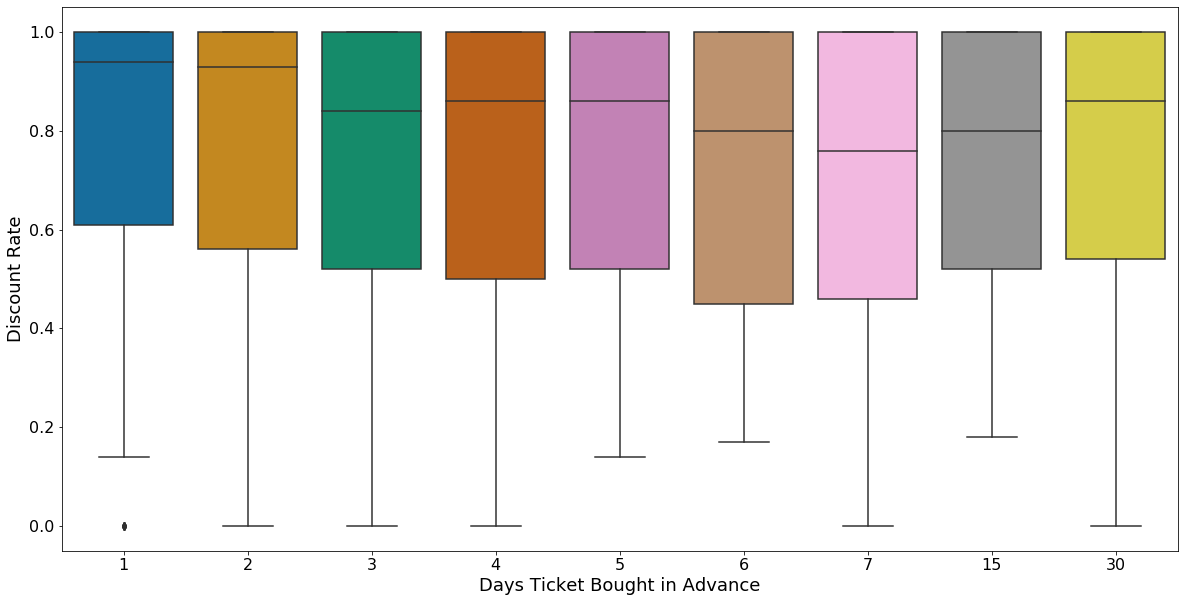

In [236]:
plt.figure(figsize=(20,10))
sns.boxplot(x = df["dateDifference"],y = df["rate"], palette="colorblind")
plt.xlabel("Days Ticket Bought in Advance", fontsize=18)
plt.ylabel("Discount Rate", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [237]:
# Counter intuitively if we look at median level of boxplots the best median discount rate(the one which gives chipest price
# for ticket) is if customet book in advance for 7 days. The median if customer book in advance for 30 days is same as book
# in advance for 4 days. At least without any suprises the 1 and 2 days to book in advance has highest, 
# hence worst median discount rate close to 1.

In [238]:
x = df["dateDifference"]
y = df["rate"]

In [239]:
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [240]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 0)
linreg = LinearRegression().fit(x_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(x_test, y_test)))

linear model coeff (w): [[-0.00063697]]
linear model intercept (b): [0.76903321]
R-squared score (training): 0.000
R-squared score (test): 0.000


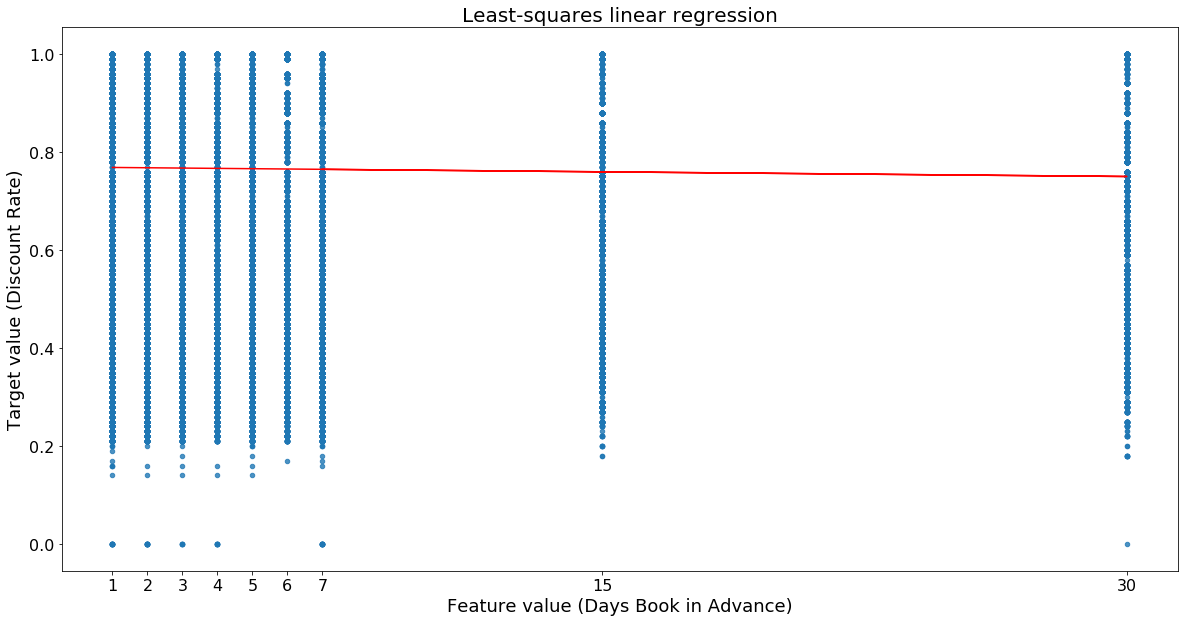

In [241]:
plt.figure(figsize=(20,10))
plt.scatter(x, y, marker= 'o', s=20, alpha=0.8)
plt.plot(x, linreg.coef_ * x + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression', fontsize = 20)
plt.xlabel('Feature value (Days Book in Advance)', fontsize = 18)
plt.ylabel('Target value (Discount Rate)', fontsize = 18)
plt.xticks([1,2,3,4,5,6,7,15,30], fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [242]:
# Make polynomial regressions
X_train_reshaped = np.array(x_train).reshape(x_train.size,1)
X_test_reshaped = np.array(x_test).reshape(x_test.size,1)
r2_train,r2_test = [],[]

for i in range(0,10):
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train_reshaped)
    X_test_poly = poly.fit_transform(X_test_reshaped)
    linreg = LinearRegression().fit(X_train_poly,y_train)
    r2_train.append(linreg.score(X_train_poly,y_train))
    r2_test.append(linreg.score(X_test_poly,y_test))


print(np.asarray(r2_train),"\n",np.asarray(r2_test))

[0.         0.0003614  0.00451366 0.00648534 0.00654478 0.00672073
 0.00674644 0.00715858 0.0071751  0.0071751 ] 
 [-3.11971064e-06  3.74691676e-04  3.80195036e-03  5.65504517e-03
  5.76284912e-03  5.93626476e-03  6.02726758e-03  6.22214845e-03
  6.26203682e-03  6.26213610e-03]


In [243]:
# We have treated discreate feature dateDifferences as continious and tried to build regression model to
# explain dicount rate. We get R squre 0 for simple linear and polynomial regressions, so there is no explanability power
# in feature. Next lets try to treat feature as categorical variable.


In [244]:
x = pd.get_dummies(df["dateDifference"])
y = df["rate"]

In [245]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 0)
linreg = LinearRegression().fit(x_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(x_test, y_test)))

linear model coeff (w): [-1.25779477e+09 -1.25779477e+09 -1.25779477e+09 -1.25779477e+09
 -1.25779477e+09 -1.25779477e+09 -1.25779477e+09 -1.25779477e+09
 -1.25779477e+09]
linear model intercept (b): 1257794774.3189883
R-squared score (training): 0.007
R-squared score (test): 0.006


In [246]:
# After tranforming dateDifference into dummies we still have R square close to 0. 
# So we can not say that discount rate related to how long in advance tickest are purchased.

### Q 2.6
####  Choose your own attributes to build two Lasso or ridge regression models, one for predicting rate and the other for predicting price. Are the performances of the two regression models significantly different? Why is it so ? Hint: When choosing attributes, you always need to think about use cases of the machine learning models.

In [247]:
# Lets make some new features based on our data

# Convert datetime columns into minutes on the specific date
df["departureDateMM"] = df["departureDate"].dt.hour*60 +df["departureDate"].dt.minute
df["arrivalDateMM"] = df["arrivalDate"].dt.hour*60 +df["arrivalDate"].dt.minute
df["createDateMM"] = df["createDate"].dt.hour*60 +df["createDate"].dt.minute

# Make Airline column
df["Airline"] = df["flightNumber"].apply(lambda x: str(x)[0:2])

# Make transit airport binary
def airport_binary(x):
    if x == "LYA":
        x = 1
        return x
    else:
        x = 0
        return x
df["traAirport binary"] = df["traAirport"].apply(airport_binary)

# make flight duration hours
df["Hours in flight"] = (df["arrivalDate"] - df["departureDate"]).dt.days*24 + (df["arrivalDate"] - df["departureDate"]).dt.seconds/3600

# make date differences between departure and createDate in hours
df["dateDifference hours"] = (df["departureDate"] - df["createDate"]).dt.days*24 + (df["departureDate"] - df["createDate"]).dt.seconds/3600

# weekday of departure and date of ticket purchase
df["departureWeekday"] = df["departureDate"].dt.weekday
df["createDateWeekday"] = df["createDate"].dt.weekday
# Full prie for tickets
df["Full Price"] = (df["price"]/(df["rate"]*100))*100

In [248]:
df2 = df.copy()

In [249]:
df_datesmm = df2.loc[:,["createDateMM"]]
x = pd.concat([pd.get_dummies(df2.loc[:,["cabinClass","craftTypeCode","Airline"]]), df_datesmm], axis=1)
y = df2["price"]

In [250]:

X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)


print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
#print('ridge regression linear model coeff:\n{}'
#     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 2930.669077372634
R-squared score (training): 0.712
R-squared score (test): 0.710
Number of non-zero features: 55


In [251]:
# Lets try scale features
scaler = MinMaxScaler()


X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)


print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
#print('ridge regression linear model coeff:\n{}'
#     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 2931.9549408470357
R-squared score (training): 0.712
R-squared score (test): 0.710
Number of non-zero features: 55


In [252]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 55, r-squared training: 0.71, r-squared test: 0.71

Alpha = 1.00
num abs(coeff) > 1.0: 55, r-squared training: 0.71, r-squared test: 0.71

Alpha = 10.00
num abs(coeff) > 1.0: 55, r-squared training: 0.71, r-squared test: 0.71

Alpha = 20.00
num abs(coeff) > 1.0: 55, r-squared training: 0.71, r-squared test: 0.71

Alpha = 50.00
num abs(coeff) > 1.0: 55, r-squared training: 0.71, r-squared test: 0.71

Alpha = 100.00
num abs(coeff) > 1.0: 55, r-squared training: 0.71, r-squared test: 0.71

Alpha = 1000.00
num abs(coeff) > 1.0: 53, r-squared training: 0.71, r-squared test: 0.71



In [253]:
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)


print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
#print('lasso regression linear model coeff:\n{}'
#     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(x), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: 3742.6519817650924
Non-zero features: 14
R-squared score (training): 0.711
R-squared score (test): 0.709

Features with non-zero weight (sorted by absolute magnitude):
	cabinClass_Y, -2759.482
	cabinClass_F, 668.477
	Airline_HO, -473.025
	Airline_CA, 388.714
	Airline_CZ, -231.373
	Airline_MU, 111.674
	craftTypeCode_321, -110.296
	Airline_MF, -91.059
	craftTypeCode_773, 86.248
	craftTypeCode_33L, 57.138
	Airline_HU, 53.735
	craftTypeCode_325, -52.073
	craftTypeCode_32A, -27.269
	createDateMM, 3.292


In [254]:
df3 = df.copy()

In [255]:
df_datesmm = df3.loc[:,["createDateMM"]]
x = pd.concat([pd.get_dummies(df3.loc[:,["cabinClass","flightNumber","craftTypeCode","departureWeekday"]]), df_datesmm], axis=1)
y = df2["rate"]

In [256]:
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)


print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
#print('ridge regression linear model coeff:\n{}'
#     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 0.7684556982549094
R-squared score (training): 0.093
R-squared score (test): 0.094
Number of non-zero features: 100


In [257]:
scaler = MinMaxScaler()


X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)


print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
#print('ridge regression linear model coeff:\n{}'
#     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 0.769085547337791
R-squared score (training): 0.093
R-squared score (test): 0.094
Number of non-zero features: 100


In [258]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 98, r-squared training: 0.09, r-squared test: 0.09

Alpha = 1.00
num abs(coeff) > 1.0: 0, r-squared training: 0.09, r-squared test: 0.09

Alpha = 10.00
num abs(coeff) > 1.0: 0, r-squared training: 0.09, r-squared test: 0.09

Alpha = 20.00
num abs(coeff) > 1.0: 0, r-squared training: 0.09, r-squared test: 0.09

Alpha = 50.00
num abs(coeff) > 1.0: 0, r-squared training: 0.09, r-squared test: 0.09

Alpha = 100.00
num abs(coeff) > 1.0: 0, r-squared training: 0.09, r-squared test: 0.09

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.09, r-squared test: 0.09



In [259]:
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = LassoCV( max_iter = 10000).fit(X_train_scaled, y_train)


print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
#print('lasso regression linear model coeff:\n{}'
#     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(x), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: 0.7864487241531604
Non-zero features: 91
R-squared score (training): 0.093
R-squared score (test): 0.094

Features with non-zero weight (sorted by absolute magnitude):
	craftTypeCode_73B, 0.198
	flightNumber_MU5138, -0.168
	flightNumber_HO1252, -0.146
	flightNumber_MU7106, -0.139
	flightNumber_HU7605, -0.137
	flightNumber_MU5102, -0.132
	flightNumber_MU5160, -0.112
	craftTypeCode_73T, -0.111
	flightNumber_FM9108, 0.109
	flightNumber_HU7607, -0.105
	craftTypeCode_73H, -0.105
	flightNumber_MU5158, -0.103
	flightNumber_MF8178, 0.081
	flightNumber_CA1521, 0.079
	craftTypeCode_73N, -0.079
	flightNumber_MU5156, -0.076
	flightNumber_CA1531, 0.075
	flightNumber_MU5693, -0.073
	flightNumber_MU5128, -0.073
	flightNumber_CA1885, 0.072
	flightNumber_CA1517, 0.069
	craftTypeCode_32M, 0.068
	flightNumber_CA1557, 0.068
	flightNumber_CA1515, 0.066
	flightNumber_CA1855, 0.060
	craftTypeCode_32A, -0.058
	craftTypeCode_319, -0.057
	cabinClass_C, -0.056
	craftTypeC

In [260]:
# We build Lasso and Ridge for both predicting price of tickets and discount rate. Because of data leakage
# considerations, there was not use price,rate and priceclass for any model, for example if we simply add
# priceclass to predict rate we will get R2 from 9% to 86%! There were also attemt to use scaling and hyperparameters
# selection, but that didnt give any feasiable results. The models give us relativetely same
# R2 according to value we want to predict, but there is significant difference between models wich predict Price and
# models which predict discount rate. 

### Q3 Logistic Regression

### Q3.7
#### Choose your own attributes to build a binary classifier on if there is any discount on the purchase price: class 0 for no discount, class 1 for price being discounted. Identify 2 to 5 important factors that determine if there is discount .

In [261]:
df4 = df.copy()

In [262]:
# Transform rate to binary
df4["rate"][df4["rate"] < 1] = 0
df4.rate.value_counts()

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.0    190529
1.0    109807
Name: rate, dtype: int64

In [263]:
# Swith notation to format required in question
df4["rate"].replace([1,0],[0,1],inplace=True)
df4.rate.value_counts()
# The data we need to predict is not highly disproportional

1.0    190529
0.0    109807
Name: rate, dtype: int64

In [264]:
df_datesmm = df4.loc[:,["arrivalDateMM","createDateMM"]]
x = pd.concat([pd.get_dummies(df4.loc[:,["cabinClass"]]), df_datesmm], axis=1)
y = df4["rate"]

In [265]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

logistic_reg = LogisticRegression(C=100).fit(x_train, y_train)
y_test_pred = logistic_reg.predict(x_test)
y_train_pred = logistic_reg.predict(x_train)

print('Accuracy of Logistic regression classifier on training set: {:.3f}\n'
     .format(metrics.accuracy_score(y_train, y_train_pred)))
print('Accuracy of Logistic regression classifier on test set: {:.3f}\n'
     .format(metrics.accuracy_score(y_test, y_test_pred)))
print('Precision of Logistic regression classifier on test set: {:.3f}\n'
     .format(metrics.precision_score(y_test, y_test_pred)))
print('Recall of Logistic regression classifier on test set: {:.3f}\n'
     .format(metrics.recall_score(y_test, y_test_pred)))
print('F1_score of Logistic regression classifier on test set: {:.3f}\n'
     .format(metrics.f1_score(y_test, y_test_pred)))

print("Confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))

Accuracy of Logistic regression classifier on training set: 0.641

Accuracy of Logistic regression classifier on test set: 0.637

Precision of Logistic regression classifier on test set: 0.652

Recall of Logistic regression classifier on test set: 0.916

F1_score of Logistic regression classifier on test set: 0.762

Confusion matrix
 [[ 4287 23257]
 [ 4006 43534]]


In [266]:
# The feature which helps classify the most cases is a cabin class, adding on  "arrivalDateMM" and "createDateMM"
# gives slight improvement in accuracy score on test data. We got quite high recall score of 0.916 which implies low
# number of False Negatives.

### Q 3.8
#### Let us now create three classes for all records with rate < 1: class 1 for 0.75 < rate < 1, class 2 for 0.5 < rate ≤ 0.75 and class 3 for rate ≤ 0.5 Choose your own attributes to build an ovrmulti-class logistic regression classifier for this purpose. Plot the 5 ROC curves in one plot, 3 for each class, 1 for micro-average and another for macro-average, and report the respective AUC under each of the ROC curves. 

In [267]:
df5 = df.copy()

In [268]:
# Make df with rate < 1 according to question requirements
print(df5.shape)
df5 = df5[df5["rate"] < 1]
print(df5.shape)

(300336, 25)
(190529, 25)


In [269]:
# Prepare a function to cast on rate column to make clases
def make_clases(x):
    if (x < 1 and x > 0.75):
        x = 1
        return x
    if (x <= 0.75 and x > 0.5):
        x = 2
        return x
    else:
        x = 3
        return x

In [270]:
# Make a column with clases
df5["class"] = df5["rate"].apply(make_clases)

In [271]:
df_datesmm = df5.loc[:,["traAirport binary","arrivalDateMM","createDateMM"]]
x = pd.concat([pd.get_dummies(df5.loc[:,["cabinClass","Airline","departureWeekday","createDateWeekday"]]), df_datesmm], axis=1)
y = df5["class"]

In [272]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

logistic_reg = LogisticRegression(C=1,multi_class="ovr", max_iter = 1000).fit(x_train, y_train)
y_test_pred = logistic_reg.predict(x_test)
y_train_pred = logistic_reg.predict(x_train)

ovr_predict_test = logistic_reg.predict(x_test)
print('Accuracy of Logistic regression classifier on training set: {:.3f}\n'
     .format(metrics.accuracy_score(y_train, y_train_pred)))
print('Accuracy of Logistic regression classifier on test set: {:.3f}\n'
     .format(metrics.accuracy_score(y_test, y_test_pred)))

print("Confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))
print('\nThe classification report of OVR:\n {}'
      .format(metrics.classification_report(y_test, ovr_predict_test)))

Accuracy of Logistic regression classifier on training set: 0.557

Accuracy of Logistic regression classifier on test set: 0.553

Confusion matrix
 [[13466   934  1386]
 [ 6304  3670  4648]
 [ 6662  1359  9204]]

The classification report of OVR:
               precision    recall  f1-score   support

           1       0.51      0.85      0.64     15786
           2       0.62      0.25      0.36     14622
           3       0.60      0.53      0.57     17225

    accuracy                           0.55     47633
   macro avg       0.58      0.55      0.52     47633
weighted avg       0.58      0.55      0.53     47633



C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


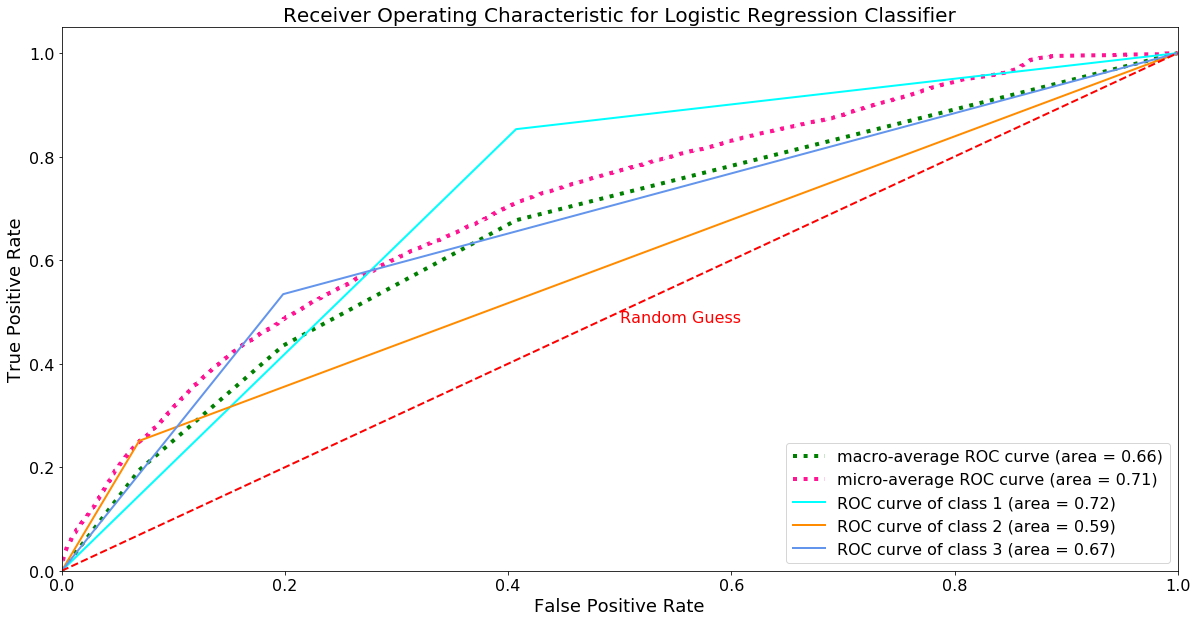

In [273]:
n_classes=3


pred1=logistic_reg.predict(x_test)
t1=sum(x==0 for x in pred1-y_test)/len(pred1)


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

y_score = logistic_reg.fit(x_train, y_train).decision_function(x_test)
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(np.array(pd.get_dummies(y_test)).ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(20,10))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format((i+1), roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red',fontsize = 16)
plt.xlabel('False Positive Rate',fontsize = 18)
plt.ylabel('True Positive Rate',fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Receiver Operating Characteristic for Logistic Regression Classifier',fontsize = 20)
plt.legend(loc="lower right",fontsize = 16)
plt.show()

### Q 3.9
####  Imagine we now stack the binary classifier and the multi-class classifier together, we first predict if there is any discount on the price, and then predict which category the discount belongs to. The final prediction is thus labelled with 0 – no discount, 1 – discount rate between 0.75 and 1 exclusive both, 2 – discount rate between 0.5 exclusive and 0.75, and 3 – discount rate is less than or equal to 0.5. Build the confusion matrix for these four classes (code required, 2 marks). Tabulate precision, recall and F1-score: en.wikipedia.org/wiki/F1_score with macro averaging and weighted averaging: scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html (code required, 2 mark). Does the performance improve by replace ovr multi-class logistic regression to multinomial multi-class logistic regression (code required, 1 mark)?

In [274]:
df6 = df.copy()

In [275]:
# Prepare a function to cast on rate column to make clases
def make_clases_2(x):
    if x == 1:
        x = 0
        return x
    elif (x < 1 and x > 0.75):
        x = 1
        return x
    elif (x <= 0.75 and x > 0.5):
        x = 2
        return x
    else:
        x = 3
        return x

In [276]:
df6["classes"] = df6["rate"].apply(make_clases_2)

In [277]:
df_datesmm = df6.loc[:,["traAirport binary"]]
x = pd.concat([pd.get_dummies(df6.loc[:,["cabinClass","Airline","departureWeekday"]]), df_datesmm], axis=1)
y = df6["classes"]

In [278]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

logistic_reg = LogisticRegression(C=1,multi_class="multinomial", max_iter = 1000).fit(x_train, y_train)
y_test_pred = logistic_reg.predict(x_test)
y_train_pred = logistic_reg.predict(x_train)

ovr_predict_test = logistic_reg.predict(x_test)
print('Accuracy of Logistic regression classifier on training set: {:.3f}\n'
     .format(metrics.accuracy_score(y_train, y_train_pred)))
print('Accuracy of Logistic regression classifier on test set: {:.3f}\n'
     .format(metrics.accuracy_score(y_test, y_test_pred)))

print("Confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))


Accuracy of Logistic regression classifier on training set: 0.421

Accuracy of Logistic regression classifier on test set: 0.420

Confusion matrix
 [[18054  6648   350  2492]
 [ 5442  9651   244   319]
 [ 7094  5720   571  1324]
 [ 7784  5885   256  3250]]


In [279]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

logistic_reg = LogisticRegression(C=1,multi_class="ovr", max_iter = 1000).fit(x_train, y_train)
y_test_pred = logistic_reg.predict(x_test)
y_train_pred = logistic_reg.predict(x_train)

ovr_predict_test = logistic_reg.predict(x_test)
print('Accuracy of Logistic regression classifier on training set: {:.3f}\n'
     .format(metrics.accuracy_score(y_train, y_train_pred)))
print('Accuracy of Logistic regression classifier on test set: {:.3f}\n'
     .format(metrics.accuracy_score(y_test, y_test_pred)))

print("Confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))
print('\nThe classification report of OVR:\n {}'
      .format(metrics.classification_report(y_test, ovr_predict_test)))

Accuracy of Logistic regression classifier on training set: 0.421

Accuracy of Logistic regression classifier on test set: 0.421

Confusion matrix
 [[18524  6648   387  1985]
 [ 5433  9651   254   318]
 [ 7045  5720   654  1290]
 [ 8231  5885   307  2752]]

The classification report of OVR:
               precision    recall  f1-score   support

           0       0.47      0.67      0.55     27544
           1       0.35      0.62      0.44     15656
           2       0.41      0.04      0.08     14709
           3       0.43      0.16      0.23     17175

    accuracy                           0.42     75084
   macro avg       0.41      0.37      0.33     75084
weighted avg       0.42      0.42      0.37     75084



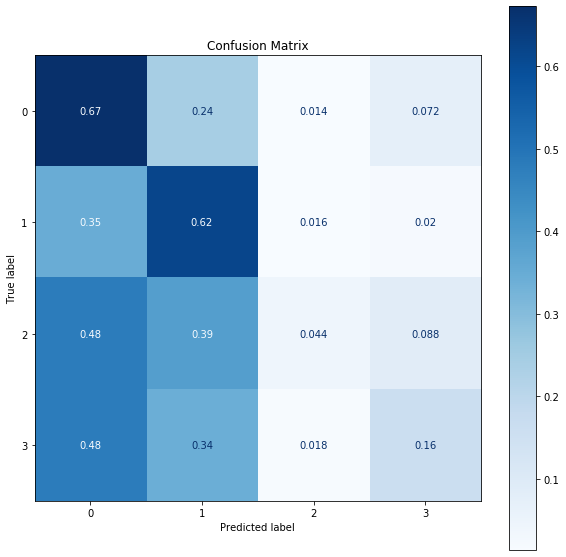

In [280]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(logistic_reg, x_test, y_test,normalize="true", cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show() 

In [281]:
# The ovr multi-class logistic regression preforms slightly better than multinomial multi-class logistic regression